This focuses on

1. Variable Identification
2. Univarient Analysis
3. Bi-varient Analysis for Hemoglobin levels and anemia status
4. Multi-varient Analysis for Hemoglobin levels and anemia status

In [194]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import describe, skew, kurtosis
%matplotlib inline

In [195]:
children_recode = pd.read_csv('../csv/children_recode.csv', delimiter="\t")

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/330253113.py:1: DtypeWarning: Columns (44,130,240) have mixed types. Specify dtype option on import or set low_memory=False.
  children_recode = pd.read_csv('../../csv/children_recode.csv', delimiter="\t")


# 1. Variable Identification

## 1.1. Identifying the Dependent Variable and Types of Variables

In [196]:
data = copy.deepcopy(children_recode)

In [197]:
data.head()

Unnamed: 0 CASEID   Case Identification  HIDXA    Index to birth history  \
0           0                     1   1  4                              1.0   
1           1                     1   1  6                              1.0   
2           2                     1   5  2                              1.0   
3           3                     1   8  3                              1.0   
4           4                     1  11  2                              1.0   

  V000     Country code and phase  V001     Cluster number  \
0                             NG8                      1.0   
1                             NG8                      1.0   
2                             NG8                      1.0   
3                             NG8                      1.0   
4                             NG8                      1.0   

   V002     Household number  V003     Respondent's line number  \
0                        1.0                                4.0   
1                        1.0                                6.0   
2                        5.0                                2.0   
3                        8.0                                3.0   
4                       11.0                                2.0   

   V004     Ultimate area unit  \
0                          1.0   
1                          1.0   
2                          1.0   
3                          1.0   
4                          1.0   

   V005     Women's individual sample weight (6 decimals)  \
0                                          1060257.0        
1                                          1060257.0        
2                                          1060257.0        
3                                          1060257.0        
4                                          1060257.0        

   V006     Month of interview  ...  \
0                         10.0  ...   
1                         10.0  ...   
2                         10.0  ...   
3                         10.0  ...   
4                         10.0  ...   

   S512A    Agreedisagree with: important children take full dose of medicine they are prescribed for malaria  \
0                                              Agree                                                            
1                                              Agree                                                            
2                                              Agree                                                            
3                                              Agree                                                            
4                                              Agree                                                            

   SLGA     Local government area  SREGION  Region  SBONNY   Bonny State  \
0                           371.0    North Central                    No   
1                           371.0    North Central                    No   
2                           371.0    North Central                    No   
3                           371.0    North Central                    No   
4                           371.0    North Central                    No   

   S104A    Had informal education  S104B    Type of informal education  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   
2                              NaN                                  NaN   
3                              NaN                                  NaN   
4                              NaN                                  NaN   

   S211     Number of births 2016-2021 IDX95    Index to Birth History  \
0                                  1.0                             1.0   
1                                  1.0                             1.0   
2                                  1.0                             1.0   
3                                  1.0                        

In [198]:
datatypes = pd.DataFrame(data.dtypes, columns=['Data Type'])
datatypes

Data Type
Unnamed: 0                                    int64
CASEID   Case Identification                 object
HIDXA    Index to birth history             float64
V000     Country code and phase              object
V001     Cluster number                     float64
...                                             ...
S104B    Type of informal education          object
S211     Number of births 2016-2021         float64
IDX95    Index to Birth History             float64
S411A    Referred to higher level of care    object
S415A    Fever went away after took ACT      object

[360 rows x 1 columns]

In [199]:
num_cols = data._get_numeric_data().columns
cat_cols = list(set(data.columns) - set(num_cols))
print('Numerical Columns: ', len(num_cols))
print('Categorical Columns: ', len(cat_cols))

Numerical Columns:  166
Categorical Columns:  194


Cluster exising in the data
    1. Socio economic cluster
    2. Demographic cluster
    3. Maternal and Child Health Cluster
    4. Malaria Prevention and Treatment Cluster
    5. Housing and Living Conditions Cluster
    6. Communication and Media Exposure Cluster
    7. Internet and Technology Cluster
    8. Education and Literacy Cluster
    9. Healthcare Utilization Cluster
    10. Water and Sanitation Cluster
    11. Wealth and Socio-economic Status Cluster

## 1.2. Identifying the Dependent Variable partaining to demographic information

In [200]:
region_features = ['V024     Region', 'V101     Region', 'SREGION  Region']
residence_features = ['V025     Type of place of residence', 'V102     Type of place of residence',
                      'V140     De jure type of place of residence']
age_features = ['V151     Sex of household head', 'V152     Age of household head']
house_hold_characteristics_features = ['V119     Household has: electricity', 'V120     Household has: radio',
                                       'V121     Household has: television', 'V122     Household has: refrigerator',
                                       'V123     Household has: bicycle', 'V124     Household has: motorcyclescooter',
                                       'V125     Household has: cartruck',
                                       'V153     Household has: telephone (land-line)']
wealth_index_features = ['V190     Wealth index combined', 'V191     Wealth index factor score combined (5 decimals)']
residence_type_features = ['V025     Type of place of residence', 'V102     Type of place of residence',
                           'V140     De jure type of place of residence']
house_hold_members_features = ['V136     Number of household members (listed)',
                               'V137     Number of children 5 and under in household (de jure)',
                               'V138     Number of eligible women in household (de facto)']
respondent_features = ["V012     Respondent's current age", "V009     Respondent's month of birth",
                       "V010     Respondent's year of birth"]
demographic_features = ['V106     Highest educational level', 'V113     Source of drinking water', 'V130     Religion',
                        'V131     Ethnicity', 'V149     Educational attainment',
                        'V150     Relationship to household head', 'V155     Literacy',
                        'V169A    Owns a mobile telephone', 'V171A    Use of internet',
                        'V218     Number of living children', 'V213     Currently pregnant',
                        'V027     Number of visits', 'V201     Total children ever born', 'V202     Sons at home',
                        'V203     Daughters at home', 'V204     Sons elsewhere', 'V205     Daughters elsewhere',
                        'V206     Sons who have died', 'V207     Daughters who have died',
                        'V208     Births in last five years', 'V209     Births in past year',
                        'V210     Births in month of interview', 'V214     Duration of current pregnancy in months',
                        'V219     Living children + current pregnancy', 'V222     Last birth to interview (months)',
                        'V223     Completeness of current pregnancy information',
                        'ML101    Type of mosquito bed net(s) slept under last night',
                        'S211     Number of births 2016-2021', ]

total_features = region_features + residence_features + age_features + house_hold_characteristics_features + wealth_index_features + residence_type_features + house_hold_members_features + respondent_features + demographic_features

#removing duplicates
total_features = sorted(set(total_features))

print('Total Features: ', len(total_features))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
print('Null Features: ', len(null_features))
demographic_data = data[total_features]


Total Features:  52
Null Features:  0


## 1.3. Identifying the Dependent Variable partaining to socio economic information

In [201]:
socio_economic = ['V106     Highest educational level', 'V107     Highest year of education',
                  'V113     Source of drinking water', 'V115     Time to get to water source',
                  'V116     Type of toilet facility', 'V119     Household has: electricity',
                  'V120     Household has: radio', 'V121     Household has: television',
                  'V122     Household has: refrigerator', 'V123     Household has: bicycle',
                  'V124     Household has: motorcyclescooter', 'V125     Household has: cartruck',
                  'V127     Main floor material', 'V128     Main wall material', 'V129     Main roof material',
                  'V190     Wealth index combined', 'V191     Wealth index factor score combined (5 decimals)',
                  'V190A    Wealth index for urbanrural',
                  'V191A    Wealth index factor score for urbanrural (5 decimals)', 'V202     Sons at home',
                  'V203     Daughters at home', 'V205     Daughters elsewhere',
                  'V206     Sons who have died', 'V207     Daughters who have died',
                  'V222     Last birth to interview (months)'
                  ]
#removing duplicates
total_features = sorted(set(socio_economic))

print('Total Features: ', len(total_features))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
print('Null Features: ', len(null_features))
socio_economic_data = data[total_features]


Total Features:  25
Null Features:  0


## 1.4. Identifying the Dependent Variable partaining to Maternal and Child Health information

In [202]:
maternal_child = ["V417     Entries in pregnancy and postnatal care roster", 'V418A    Entries in child health roster',
                  'V224     Entries in birth history', "M13      Timing of 1st antenatal check (months)",
                  "M57A     Antenatal care: respondent's home", "M57B     Antenatal care: other home",
                  'M57C     NA - Antenatal care: CS home', 'M57D     NA - Antenatal care: CS home',
                  'M57E     Antenatal care: government hospital', 'M57F     Antenatal care: government health center',
                  'M57G     Antenatal care: government health post', 'M57H     Antenatal care: other public sector',
                  'M57I     NA - Antenatal care: CS public health', 'M57J     NA - Antenatal care: CS public health',
                  'M57K     NA - Antenatal care: CS public health', 'M57L     NA - Antenatal care: CS public health',
                  'M57M     Antenatal care: private hospital', 'M57N     Antenatal care: private clinic',
                  'M57O     Antenatal care: other private medical sector',
                  'M57P     NA - Antenatal care: CS private medical',
                  'M57Q     NA - Antenatal care: CS private medical',
                  'M57R     NA - Antenatal care: CS private medical', 'M57NA    Antenatal care: NGO hospital',
                  'M57NB    Antenatal care: NGO clinic', 'M57NC    Antenatal care: other NGO medical sector',
                  'M57NE    NA - Antenatal care: NGO medical', 'M57ND    NA - Antenatal care: NGO medical'
                  ]
#removing duplicates
total_features = sorted(set(maternal_child))

print('Total Features: ', len(maternal_child))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
        #dropping the null features
        total_features.remove(i)
print('Null Features: ', len(null_features))
maternal_child_data = data[total_features]


Total Features:  27
Null Features:  6


## 1.5. Identifying the Dependent Variable partaining to Health related information

In [203]:
health_related_cluster = [
    'ML101    Type of mosquito bed net(s) slept under last night',
    'ML0      Type of mosquito bed net(s) child slept under last night', 'M2A      Prenatal: doctor',
    'M2B      Prenatal: nursemidwife', 'M2C      Prenatal: auxiliary midwife',
    'M2D      Prenatal: government health community extension health worker',
    'M2E      NA - Prenatal: CS health professional', 'M2F      NA - Prenatal: CS health professional',
    'M2G      Prenatal: traditional birth attendant', 'M2H      Prenatal: Community health workerfield worker',
    'M2I      NA - Prenatal: CS other person', 'M2J      NA - Prenatal: CS other person', 'M2K      Prenatal: other',
    'M2L      NA - Prenatal: CS other', 'M2M      NA - Prenatal: CS other', 'M2N      Prenatal: no one',
    'M13      Timing of 1st antenatal check (months)',
    'M14      Number of antenatal visits during pregnancy', 'M49A     During pregnancy took: SPfansidar for malaria',
    'M49B     NA - During pregnancy took: chloroquine for malaria',
    'M49C     NA - During pregnancy took: CS drug for malaria',
    'M49D     NA - During pregnancy took: CS drug for malaria',
    'M49E     NA - During pregnancy took: CS drug for malaria',
    'M49F     NA - During pregnancy took: CS drug for malaria',
    'M49G     NA - During pregnancy took: CS drug for malaria',
    'M49X     NA - During pregnancy took: other drug for malaria'
    , "M49Z     NA - During pregnancy took: don't know", 'M49Y     NA - During pregnancy took: no drug for malaria',
    'H22      Had fever in last two weeks', 'H31      NA - Had cough in last two weeks',
    'HW53     Hemoglobin level (gdl - 1 decimal)',
    'HW55     Result of measurement - hemoglobin',
    'HW56     Hemoglobin level adjusted for altitude (gdl - 1 decimal)', 'HW57     Anemia level'
    , 'HW58     NA - Agrees to referral - anemia'
]
#removing duplicates
total_features = sorted(set(health_related_cluster))

print('Total Features: ', len(health_related_cluster))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
        #dropping the null features
        total_features.remove(i)
print('Null Features: ', len(null_features))
health_related_cluster_data = data[total_features]


Total Features:  35
Null Features:  10


## 1.6. Identifying the Dependent Variable partaining to Communication information

In [204]:
communictation_cluster = [
    'ML501    Last six months heardseen malaria messages', "ML501A   Malaria messages were heardseen: radio",
    "ML501B   Malaria messages were heardseen: television", "ML501C   Malaria messages were heardseen: posterbillboard",
    "ML501D   Malaria messages were heardseen: newspapermagazine",
    "ML501E   Malaria messages were heardseen: leafletbrochure",
    "ML501F   Malaria messages were heardseen: healthcare provider",
    "ML501G   Malaria messages were heardseen: community health worker",
    "ML501H   Malaria messages were heardseen: social media",
    "ML501I   Malaria messages were heardseen: town announcer",
    "ML501J   Malaria messages were heardseen: inter-personal communication agentcommunity volunteer",
    "ML501K   Malaria messages were heardseen: familyfriends", "ML501X   Malaria messages were heardseen: other",
    "ML501Z   Malaria messages were heardseen: don't remember", 'V157     Frequency of reading newspaper or magazine',
    'V158     Frequency of listening to radio',
    'V159     Frequency of watching television'
]
#removing duplicates
total_features = sorted(set(communictation_cluster))

print('Total Features: ', len(communictation_cluster))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
print('Null Features: ', len(null_features))
communictation_cluster_data = data[total_features]


Total Features:  17
Null Features:  0


## 1.7. Identifying the Dependent Variable partaining to Internet information

In [205]:
internet_technology_cluster = [
    'V171A    Use of internet'
    , 'V171B    Frequency of using internet last month'
    , 'V169A    Owns a mobile telephone'
    , "V169C    Is respondent's mobile phone a smart phone"
]
#removing duplicates
total_features = sorted(set(internet_technology_cluster))

print('Total Features: ', len(internet_technology_cluster))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
print('Null Features: ', len(null_features))
internet_technology_cluster_data = data[total_features]


Total Features:  4
Null Features:  0


## 1.8. Identifying the Dependent Variable partaining to Sanitation information

In [206]:
sanitation_cluster = [
    'V116     Type of toilet facility'
    , 'V127     Main floor material'
    , 'V128     Main wall material'
    , 'V129     Main roof material'
]
#removing duplicates
total_features = sorted(set(sanitation_cluster))

print('Total Features: ', len(sanitation_cluster))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
print('Null Features: ', len(null_features))
sanitation_cluster_data = data[total_features]


Total Features:  4
Null Features:  0


## 1.9. Identifying the Dependent Variable partaining to Education information

In [207]:
education_literacy_cluster = [
    'V155     Literacy'
    , 'V156     NA - Ever participated in a literacy program outside of primary'
    , 'V106     Highest educational level'
    , 'V107     Highest year of education']
#removing duplicates
total_features = sorted(set(education_literacy_cluster))

print('Total Features: ', len(education_literacy_cluster))
#checking for features will all null values
null_features = []
for i in total_features:
    if data[i].isnull().sum() == data.shape[0]:
        null_features.append(i)
        #dropping the null features
        total_features.remove(i)
print('Null Features: ', len(null_features))
education_literacy_cluster_data = data[total_features]


Total Features:  4
Null Features:  1


# 2.1. Univariate Analysis

1. We explore the demographic variables and their distributions
2. Measure of central tendency and dispersion (mean, median, mode, standard deviation, variance, range)
3. Graphical representations (histogram, boxplot, barplot, pie chart, line chart)
4. Outlier detection
5. Measure of shape (skewness, kurtosis)

For categorical variables, we will use frequency table to understand distribution of each category. We will use bar plot or pie chart to represent the frequency distribution.

In [208]:
data_cluster = [
    demographic_data,
    socio_economic_data,
    maternal_child_data,
    health_related_cluster_data,
    communictation_cluster_data,
    internet_technology_cluster_data,
    sanitation_cluster_data,
    education_literacy_cluster_data
]

In [209]:
#transforming categorical data
for cluster in data_cluster:
    for col in cluster:
        if cluster[col].dtype == "object" and col != 'V107     Highest year of education':
            cluster[col] = LabelEncoder().fit_transform(cluster[col])

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/3640168161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster[col] = LabelEncoder().fit_transform(cluster[col])
/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/3640168161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster[col] = LabelEncoder().fit_transform(cluster[col])
/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/3640168161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

In [210]:
def calculate_central_tendency_and_dispersion(data):
    """
    Calculates the central tendency and dispersion of a given dataset.

    Parameters:
        data (list or numpy array): The dataset for which to calculate central tendency and dispersion.

    Returns:
        dict: A dictionary containing the following statistics:
              - Mean
              - Median
              - Mode (if exists)
              - Variance
              - Standard Deviation
    """
    # Convert the data to a numpy array for easy calculations
    data = np.array(data)

    # Calculate central tendency
    mean = np.mean(data)
    median = np.median(data)

    # Calculate mode
    mode_result = stats.mode(data)
    mode = mode_result.mode[0] if len(mode_result.mode) > 0 else None

    # Calculate dispersion
    variance = np.var(data, ddof=0)  # Set ddof=0 for population variance, ddof=1 for sample variance
    std_deviation = np.std(data, ddof=0)  # Set ddof=0 for population std deviation, ddof=1 for sample std deviation
    kurtosis_value = kurtosis(data, axis=0, bias=True)
    screw_value = skew(data, axis=0, bias=True)
    # Create a dictionary to store the results
    statistics = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Variance': variance,
        'Standard Deviation': std_deviation,
        'Kurtosis': kurtosis_value,
        'Screw': screw_value
    }

    print('Data set description')
    print(describe(data, axis=0))

    return statistics

In [211]:
def feature_uni_varaite_analysis(name,_data):
    try:
        print('Feature Name: ', name)
        print('Number of Unique Values: ', _data[name].nunique())
        print('Unique Values: ', _data[name].unique())
        print('Value Counts: ', _data[name].value_counts())
        _data[name].value_counts().plot(kind='bar')
        plt.show()
        print('Central Tendency and Dispersion: ', calculate_central_tendency_and_dispersion(_data[name]))
        print('Plotting the count plot')
        sns.countplot(data=_data, x=name)
        plt.show()
    except:
        print('Error in feature: ', name)
        pass


## 2.1.1. Univariate Analysis of Demographic Variables

Feature Name:  ML101    Type of mosquito bed net(s) slept under last night
Number of Unique Values:  3
Unique Values:  [0 1 2]
Value Counts:  0    5987
1    4841
2     160
Name: ML101    Type of mosquito bed net(s) slept under last night, dtype: int64


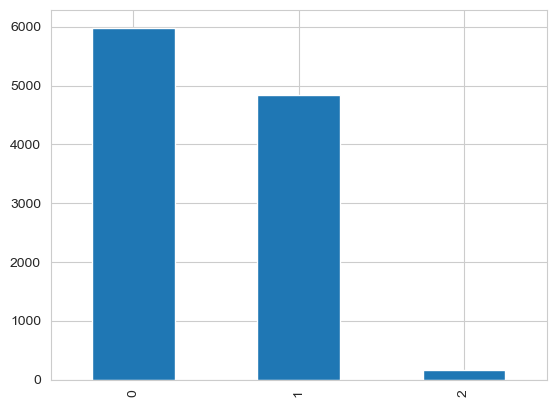

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.46969421186749183, variance=0.27822955971164787, skewness=0.41862758948062967, kurtosis=-1.1754034967829863)
Central Tendency and Dispersion:  {'Mean': 0.46969421186749183, 'Median': 0.0, 'Mode': 0, 'Variance': 0.27820423849216186, 'Standard Deviation': 0.5274506976885724, 'Kurtosis': -1.1754034967829863, 'Screw': 0.41862758948062967}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


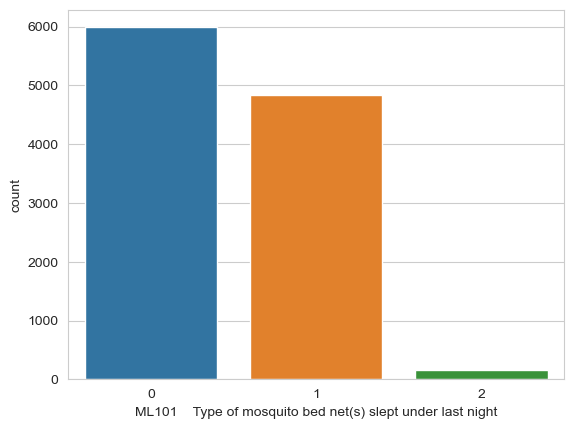

Feature Name:  S211     Number of births 2016-2021
Number of Unique Values:  5
Unique Values:  [1. 2. 3. 4. 5.]
Value Counts:  2.0    5352
1.0    3559
3.0    1869
4.0     200
5.0       8
Name: S211     Number of births 2016-2021, dtype: int64


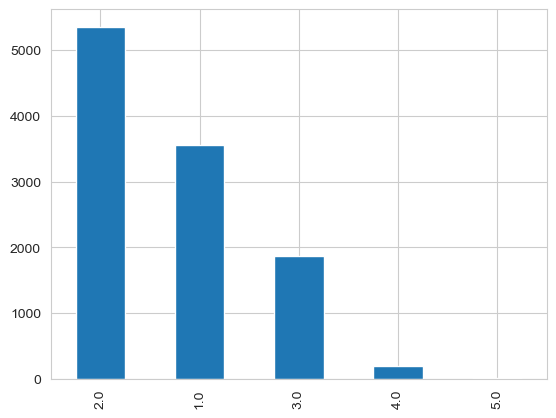

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 5.0), mean=1.8847834000728068, variance=0.5601288599701624, skewness=0.49286852593791974, kurtosis=-0.14806099824660368)
Central Tendency and Dispersion:  {'Mean': 1.8847834000728068, 'Median': 2.0, 'Mode': 2.0, 'Variance': 0.5600778835540747, 'Standard Deviation': 0.7483835136840433, 'Kurtosis': -0.14806099824660368, 'Screw': 0.49286852593791974}
Plotting the count plot


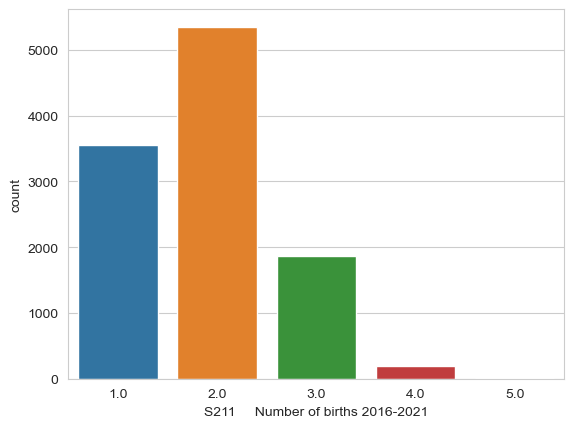

Feature Name:  SREGION  Region
Number of Unique Values:  6
Unique Values:  [0 1 2 3 4 5]
Value Counts:  2    3215
0    2063
1    2054
4    1424
3    1168
5    1064
Name: SREGION  Region, dtype: int64


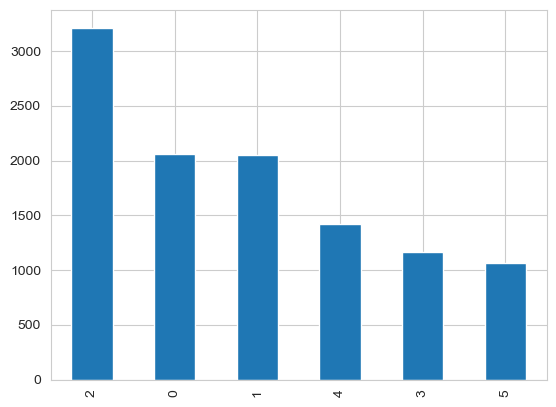

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 5), mean=2.093556607207863, variance=2.4255778472549663, skewness=0.3672290225974285, kurtosis=-0.8634918648473766)
Central Tendency and Dispersion:  {'Mean': 2.093556607207863, 'Median': 2.0, 'Mode': 2, 'Variance': 2.42535709936206, 'Standard Deviation': 1.5573558037141224, 'Kurtosis': -0.8634918648473766, 'Screw': 0.3672290225974285}
Plotting the count plot


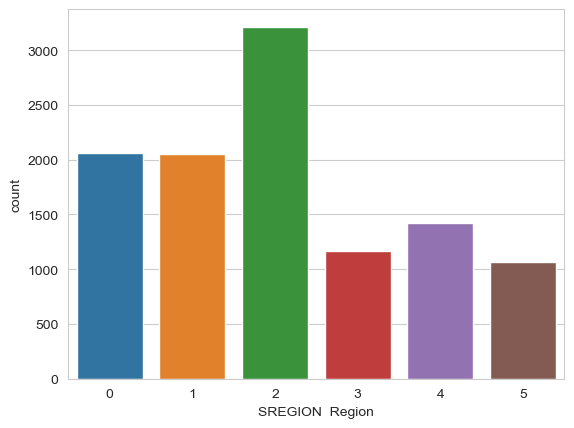

Feature Name:  V009     Respondent's month of birth
Number of Unique Values:  12
Unique Values:  [10.  8. 11.  2.  7.  6.  9. 12.  4.  5.  3.  1.]
Value Counts:  3.0     1269
1.0     1266
4.0     1223
5.0     1173
6.0     1108
2.0      958
8.0      827
7.0      780
9.0      752
10.0     675
12.0     511
11.0     446
Name: V009     Respondent's month of birth, dtype: int64


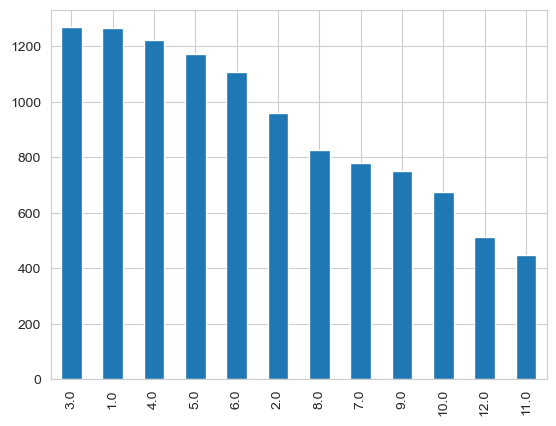

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 12.0), mean=5.553876956680014, variance=10.32848865401342, skewness=0.34302898941562915, kurtosis=-0.9213941233213947)
Central Tendency and Dispersion:  {'Mean': 5.553876956680014, 'Median': 5.0, 'Mode': 3.0, 'Variance': 10.32754867506784, 'Standard Deviation': 3.2136503660273688, 'Kurtosis': -0.9213941233213947, 'Screw': 0.34302898941562915}
Plotting the count plot


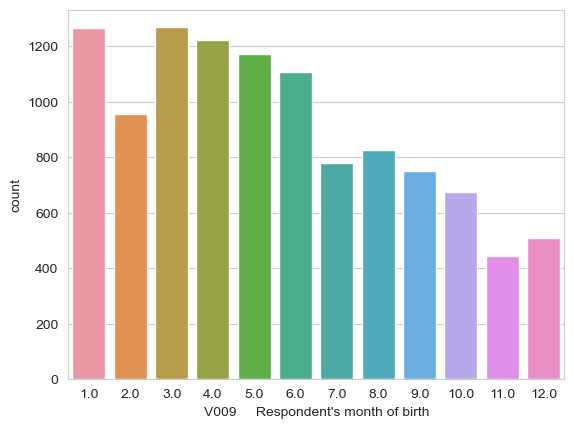

Feature Name:  V010     Respondent's year of birth
Number of Unique Values:  35
Unique Values:  [1994. 1984. 1997. 1979. 1983. 1999. 2001. 1996. 1988. 1993. 1998. 1990.
 2003. 1991. 1986. 1978. 1976. 1992. 1989. 1987. 1985. 2000. 2002. 1995.
 1975. 1973. 1982. 1981. 2004. 1980. 1974. 1977. 2005. 1972. 2006.]
Value Counts:  1991.0    1347
1996.0    1247
2001.0     827
1986.0     825
1993.0     567
1995.0     461
1981.0     455
1989.0     453
1994.0     406
1999.0     391
1992.0     324
1990.0     319
1997.0     293
1998.0     278
1988.0     268
1985.0     268
2000.0     261
1984.0     252
1987.0     248
1983.0     238
2003.0     180
1982.0     172
1976.0     144
2002.0     135
1980.0     121
1979.0     115
2004.0      98
1978.0      72
1977.0      53
2005.0      37
1974.0      36
1975.0      34
2006.0      31
1973.0      21
1972.0      11
Name: V010     Respondent's year of birth, dtype: int64


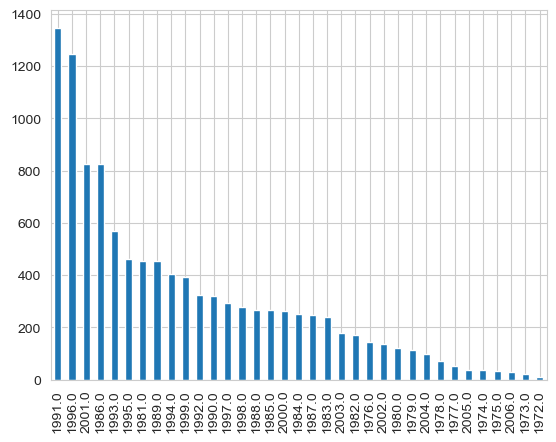

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1972.0, 2006.0), mean=1991.663997087732, variance=46.224399494667054, skewness=-0.33757939478640275, kurtosis=-0.4675738165297618)
Central Tendency and Dispersion:  {'Mean': 1991.663997087732, 'Median': 1992.0, 'Mode': 1991.0, 'Variance': 46.220192687286755, 'Standard Deviation': 6.7985434239465405, 'Kurtosis': -0.4675738165297618, 'Screw': -0.33757939478640275}
Plotting the count plot


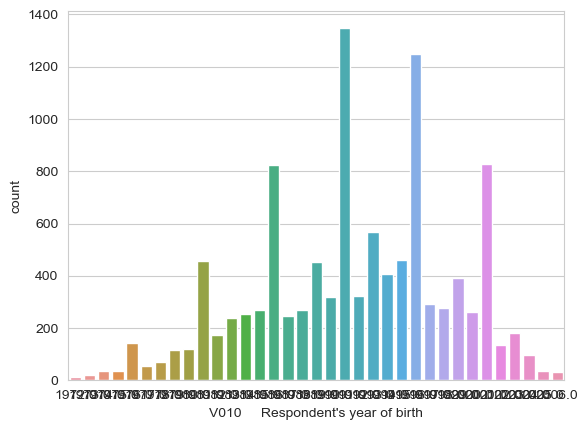

Feature Name:  V012     Respondent's current age
Number of Unique Values:  35
Unique Values:  [27. 37. 23. 42. 38. 22. 19. 24. 33. 28. 20. 31. 30. 18. 29. 35. 43. 45.
 32. 34. 36. 21. 25. 26. 46. 47. 39. 40. 16. 41. 44. 17. 49. 48. 15.]
Value Counts:  30.0    1391
25.0    1322
35.0     856
20.0     851
28.0     559
40.0     482
32.0     475
27.0     418
26.0     394
22.0     388
29.0     317
24.0     296
23.0     285
31.0     262
37.0     261
33.0     255
38.0     239
34.0     238
36.0     236
21.0     233
18.0     191
39.0     164
45.0     145
19.0     140
42.0     124
17.0      97
41.0      87
43.0      61
44.0      52
47.0      39
16.0      39
15.0      33
46.0      30
48.0      18
49.0      10
Name: V012     Respondent's current age, dtype: int64


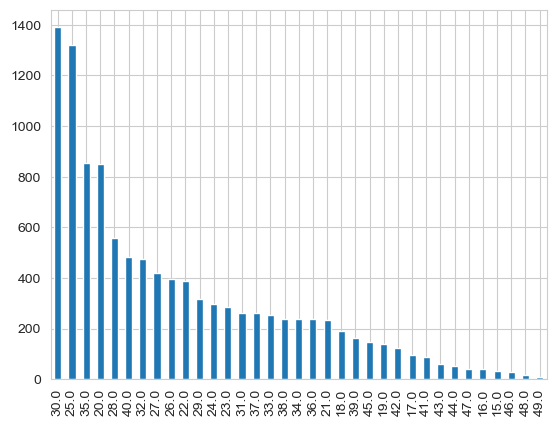

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(15.0, 49.0), mean=29.268929741536223, variance=46.123629071972374, skewness=0.33761589510699724, kurtosis=-0.4687639833580204)
Central Tendency and Dispersion:  {'Mean': 29.268929741536223, 'Median': 29.0, 'Mode': 30.0, 'Variance': 46.11943143554427, 'Standard Deviation': 6.791128877848238, 'Kurtosis': -0.4687639833580204, 'Screw': 0.33761589510699724}
Plotting the count plot


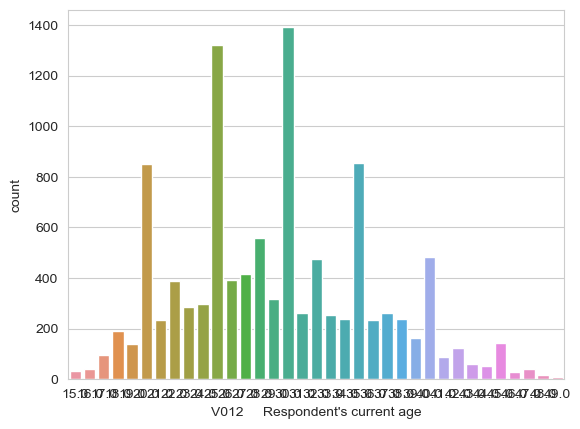

Feature Name:  V024     Region
Number of Unique Values:  37
Unique Values:  [ 6 14 22 23 25 26 31  1  4  7 15 34 35 17 18 19 20 21 33 36  0  3 10 13
 16  2  5  8  9 11 32 12 24 27 28 29 30]
Value Counts:  19    571
20    499
4     480
21    477
18    455
33    425
17    409
26    391
36    379
34    372
35    370
25    366
31    347
32    337
7     318
9     307
10    307
6     299
14    275
1     275
0     251
5     239
15    239
8     215
3     212
30    209
13    200
16    198
23    195
22    190
24    190
28    185
27    174
2     173
29    162
11    153
12    144
Name: V024     Region, dtype: int64


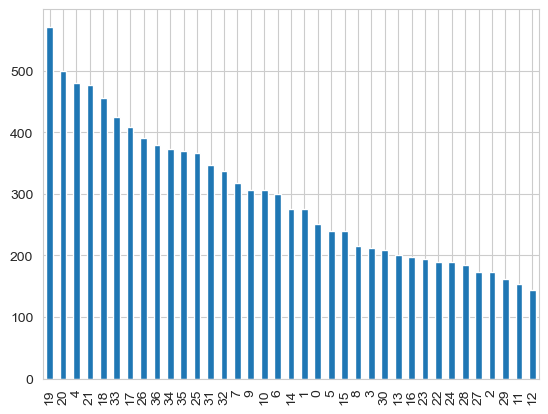

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 36), mean=18.81534401164907, variance=113.3228663875158, skewness=-0.06191063936917319, kurtosis=-1.1323745564176482)
Central Tendency and Dispersion:  {'Mean': 18.81534401164907, 'Median': 19.0, 'Mode': 19, 'Variance': 113.31255305784819, 'Standard Deviation': 10.644836920209167, 'Kurtosis': -1.1323745564176482, 'Screw': -0.06191063936917319}
Plotting the count plot


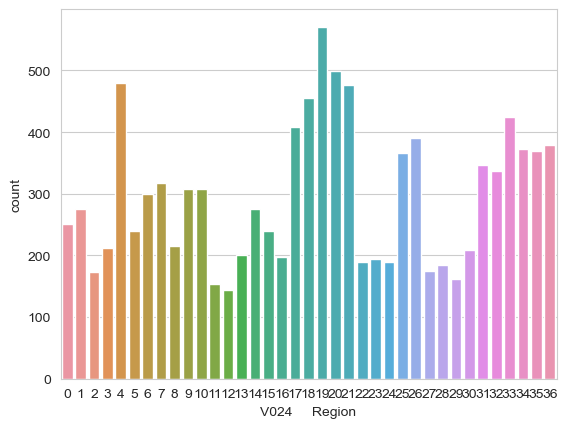

Feature Name:  V025     Type of place of residence
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  0    7722
1    3266
Name: V025     Type of place of residence, dtype: int64


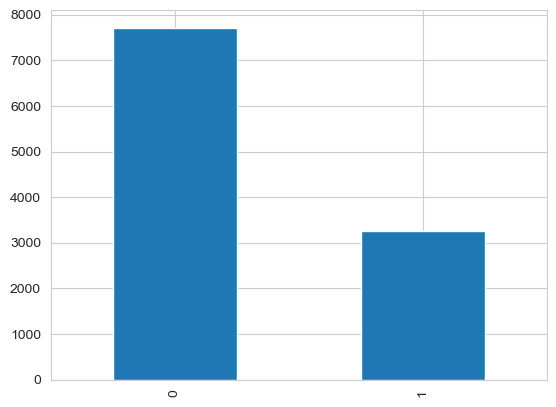

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.297233345467783, variance=0.2089046958862493, skewness=0.8873034973625468, kurtosis=-1.2126925035681924)
Central Tendency and Dispersion:  {'Mean': 0.297233345467783, 'Median': 0.0, 'Mode': 0, 'Variance': 0.2088856838098126, 'Standard Deviation': 0.4570401336970448, 'Kurtosis': -1.2126925035681924, 'Screw': 0.8873034973625468}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


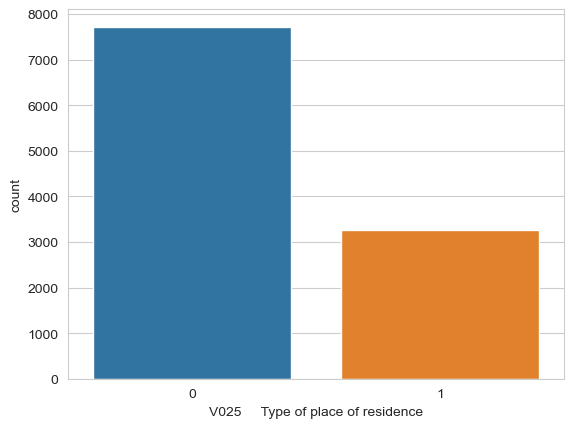

Feature Name:  V027     Number of visits
Number of Unique Values:  5
Unique Values:  [1. 2. 3. 4. 5.]
Value Counts:  1.0    9183
2.0    1398
3.0     283
4.0      87
5.0      37
Name: V027     Number of visits, dtype: int64


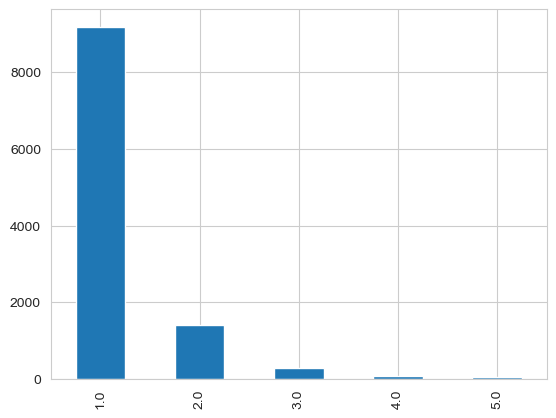

Data set description
DescribeResult(nobs=10988, minmax=(1.0, 5.0), mean=1.2159628685839097, variance=0.308775836247418, skewness=3.2202477496106723, kurtosis=12.49297967722508)
Central Tendency and Dispersion:  {'Mean': 1.2159628685839097, 'Median': 1.0, 'Mode': 1.0, 'Variance': 0.30874773506101033, 'Standard Deviation': 0.5556507311801275, 'Kurtosis': 12.49297967722508, 'Screw': 3.2202477496106723}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


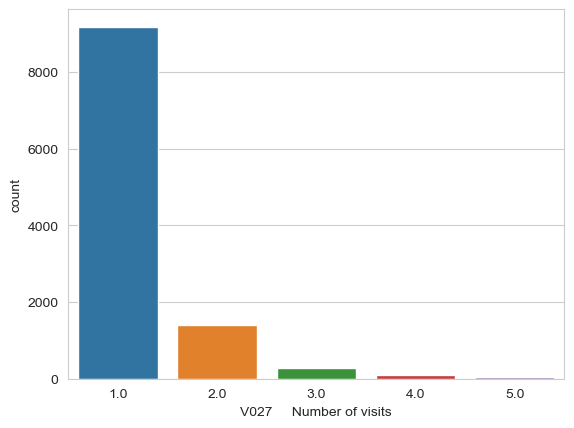

Feature Name:  V101     Region
Number of Unique Values:  37
Unique Values:  [ 6 14 22 23 25 26 31  1  4  7 15 34 35 17 18 19 20 21 33 36  0  3 10 13
 16  2  5  8  9 11 32 12 24 27 28 29 30]
Value Counts:  19    571
20    499
4     480
21    477
18    455
33    425
17    409
26    391
36    379
34    372
35    370
25    366
31    347
32    337
7     318
9     307
10    307
6     299
14    275
1     275
0     251
5     239
15    239
8     215
3     212
30    209
13    200
16    198
23    195
22    190
24    190
28    185
27    174
2     173
29    162
11    153
12    144
Name: V101     Region, dtype: int64


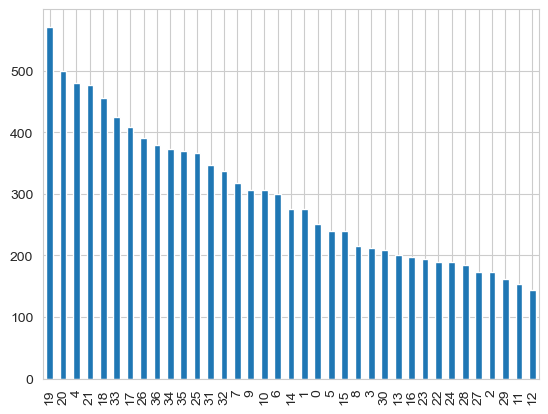

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 36), mean=18.81534401164907, variance=113.3228663875158, skewness=-0.06191063936917319, kurtosis=-1.1323745564176482)
Central Tendency and Dispersion:  {'Mean': 18.81534401164907, 'Median': 19.0, 'Mode': 19, 'Variance': 113.31255305784819, 'Standard Deviation': 10.644836920209167, 'Kurtosis': -1.1323745564176482, 'Screw': -0.06191063936917319}
Plotting the count plot


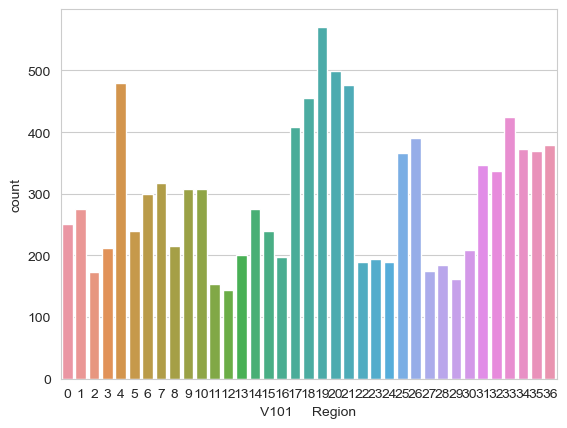

Feature Name:  V102     Type of place of residence
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  0    7722
1    3266
Name: V102     Type of place of residence, dtype: int64


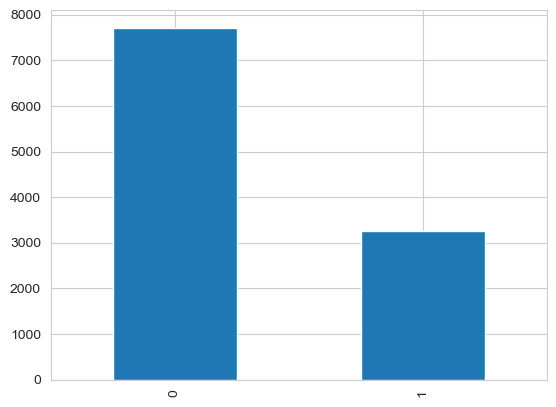

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.297233345467783, variance=0.2089046958862493, skewness=0.8873034973625468, kurtosis=-1.2126925035681924)
Central Tendency and Dispersion:  {'Mean': 0.297233345467783, 'Median': 0.0, 'Mode': 0, 'Variance': 0.2088856838098126, 'Standard Deviation': 0.4570401336970448, 'Kurtosis': -1.2126925035681924, 'Screw': 0.8873034973625468}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


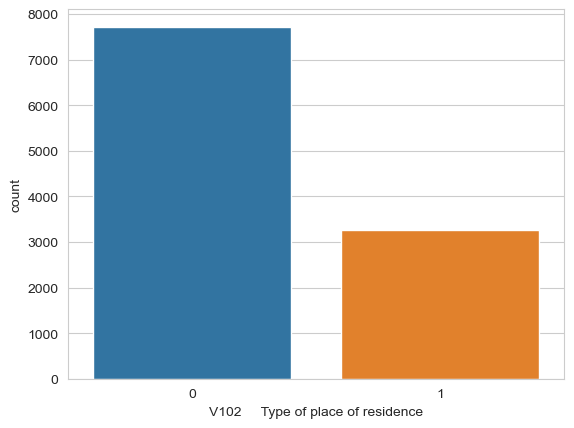

Feature Name:  V106     Highest educational level
Number of Unique Values:  4
Unique Values:  [3 2 0 1]
Value Counts:  1    4717
3    3479
2    1633
0    1159
Name: V106     Highest educational level, dtype: int64


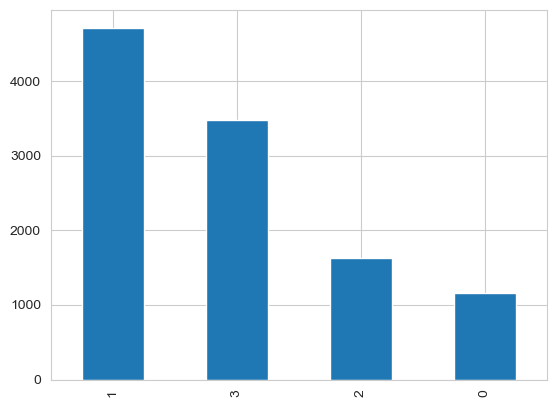

Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=1.6763742264288315, variance=1.0631825565833188, skewness=0.09991955110974005, kurtosis=-1.3220595635978505)
Central Tendency and Dispersion:  {'Mean': 1.6763742264288315, 'Median': 1.0, 'Mode': 1, 'Variance': 1.0630857980688864, 'Standard Deviation': 1.0310605210504795, 'Kurtosis': -1.3220595635978505, 'Screw': 0.09991955110974005}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


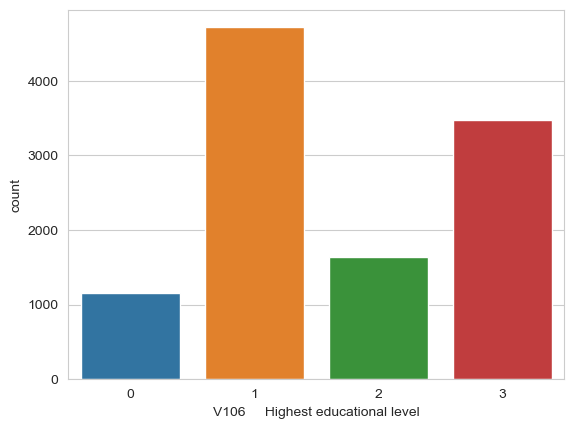

Feature Name:  V113     Source of drinking water
Number of Unique Values:  17
Unique Values:  [ 8 16 14 12  4 10 11 15  2  0  9  6  5  1 13  7  3]
Value Counts:  14    3583
8     1639
16    1537
9      908
11     876
12     773
4      420
15     362
10     229
6      223
5      137
7       81
2       72
0       69
13      32
3       29
1       18
Name: V113     Source of drinking water, dtype: int64


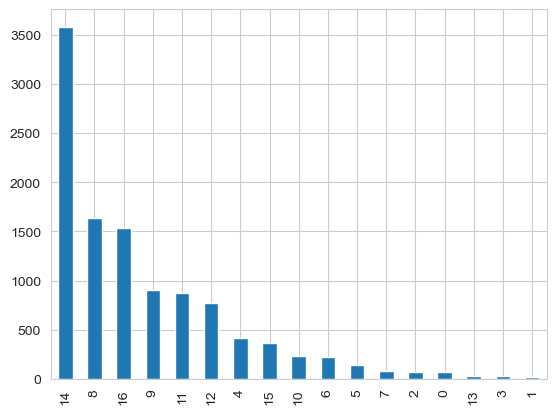

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 16), mean=11.613123407353477, variance=12.930407536603225, skewness=-0.7564416997275797, kurtosis=-0.14423188831720424)
Central Tendency and Dispersion:  {'Mean': 11.613123407353477, 'Median': 13.0, 'Mode': 14, 'Variance': 12.929230761254061, 'Standard Deviation': 3.595723955096395, 'Kurtosis': -0.14423188831720424, 'Screw': -0.7564416997275797}
Plotting the count plot


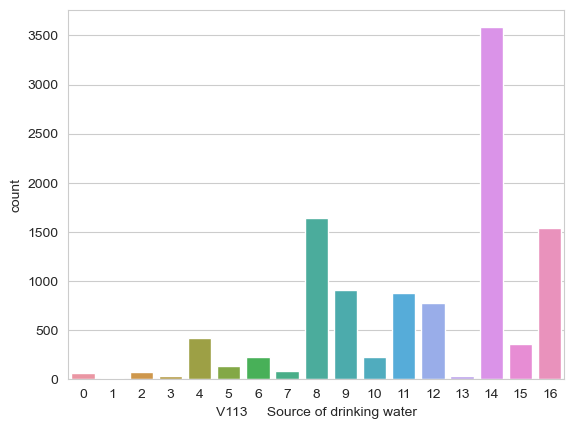

Feature Name:  V119     Household has: electricity
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  0    6491
2    4425
1      72
Name: V119     Household has: electricity, dtype: int64


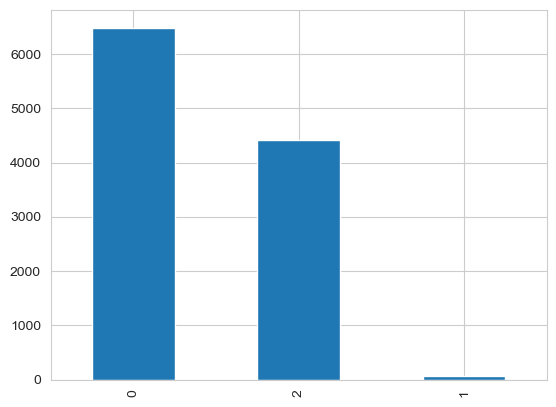

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.8119767018565708, variance=0.9581818390857993, skewness=0.3828686427202787, kurtosis=-1.8463217663648719)
Central Tendency and Dispersion:  {'Mean': 0.8119767018565708, 'Median': 0.0, 'Mode': 0, 'Variance': 0.958094636515806, 'Standard Deviation': 0.9788230874452267, 'Kurtosis': -1.8463217663648719, 'Screw': 0.3828686427202787}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


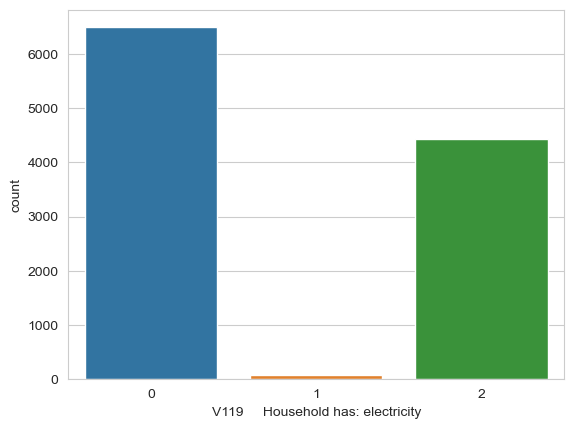

Feature Name:  V120     Household has: radio
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    6545
2    4371
1      72
Name: V120     Household has: radio, dtype: int64


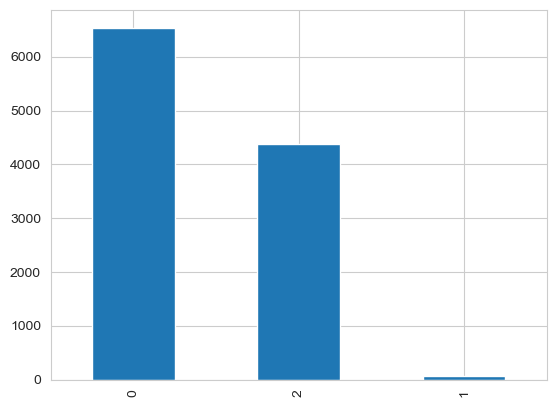

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.802147797597379, variance=0.9543887605330574, skewness=0.40367737409771676, kurtosis=-1.8298984688582767)
Central Tendency and Dispersion:  {'Mean': 0.802147797597379, 'Median': 0.0, 'Mode': 0, 'Variance': 0.954301903164971, 'Standard Deviation': 0.9768837715741678, 'Kurtosis': -1.8298984688582767, 'Screw': 0.40367737409771676}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


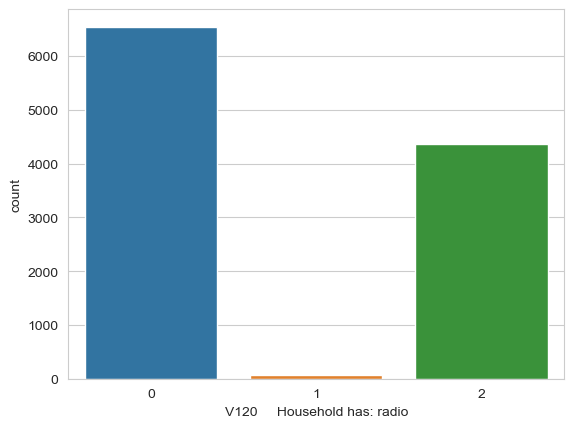

Feature Name:  V121     Household has: television
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    6893
2    4023
1      72
Name: V121     Household has: television, dtype: int64


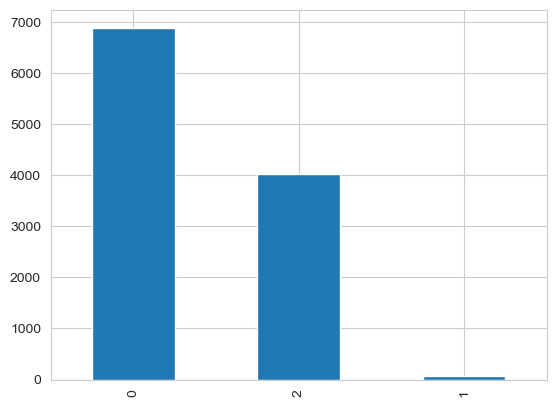

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.7388059701492538, variance=0.9253092868233693, skewness=0.5411640532411538, kurtosis=-1.6995407837359082)
Central Tendency and Dispersion:  {'Mean': 0.7388059701492538, 'Median': 0.0, 'Mode': 0, 'Variance': 0.9252250759308662, 'Standard Deviation': 0.9618862073711558, 'Kurtosis': -1.6995407837359082, 'Screw': 0.5411640532411538}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


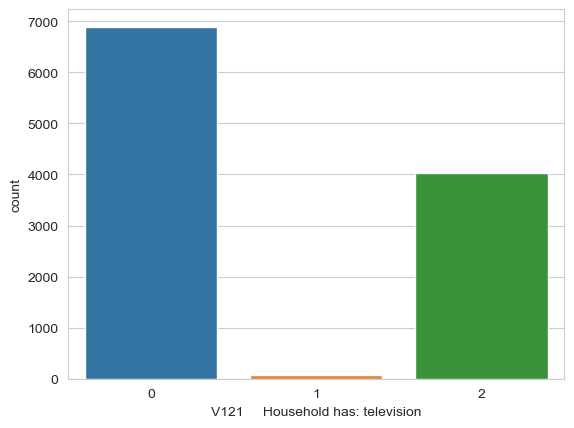

Feature Name:  V122     Household has: refrigerator
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    8734
2    2182
1      72
Name: V122     Household has: refrigerator, dtype: int64


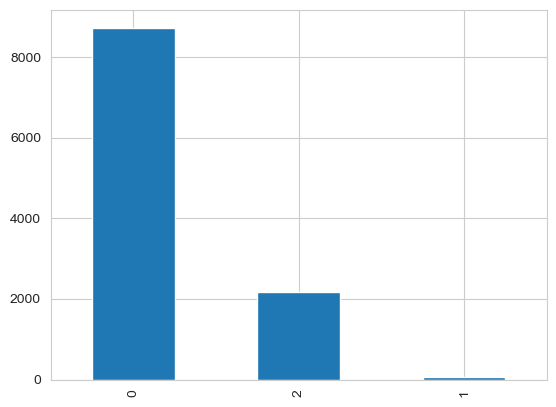

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.40371314160902805, variance=0.63794743822903, skewness=1.4855121019931858, kurtosis=0.22268547250053627)
Central Tendency and Dispersion:  {'Mean': 0.40371314160902805, 'Median': 0.0, 'Mode': 0, 'Variance': 0.6378893796707638, 'Standard Deviation': 0.7986797729195123, 'Kurtosis': 0.22268547250053627, 'Screw': 1.4855121019931858}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


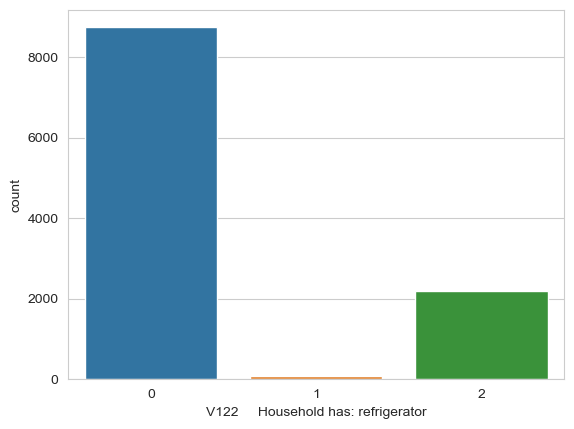

Feature Name:  V123     Household has: bicycle
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    9312
2    1604
1      72
Name: V123     Household has: bicycle, dtype: int64


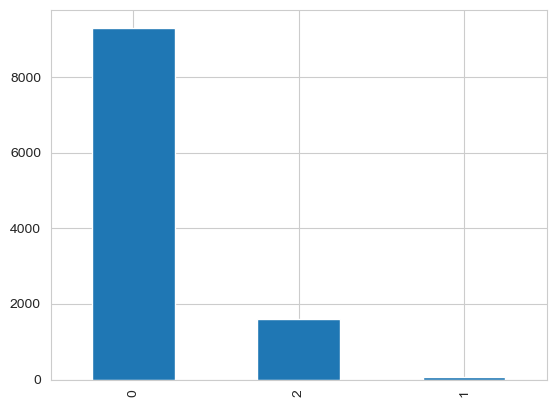

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.29850746268656714, variance=0.5014012489658742, skewness=1.9684878107099253, kurtosis=1.9006746415667983)
Central Tendency and Dispersion:  {'Mean': 0.29850746268656714, 'Median': 0.0, 'Mode': 0, 'Variance': 0.5013556172541008, 'Standard Deviation': 0.7080646984944955, 'Kurtosis': 1.9006746415667983, 'Screw': 1.9684878107099253}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


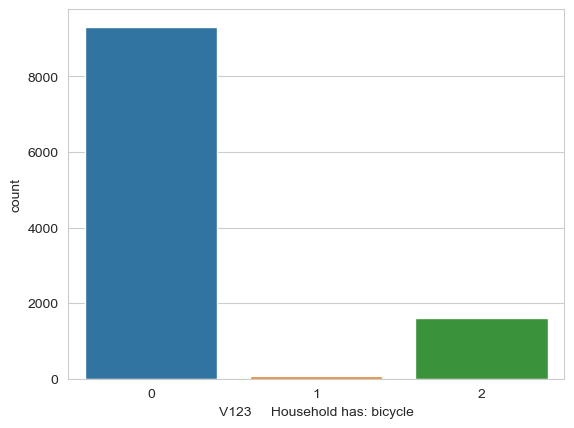

Feature Name:  V124     Household has: motorcyclescooter
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    7083
2    3833
1      72
Name: V124     Household has: motorcyclescooter, dtype: int64


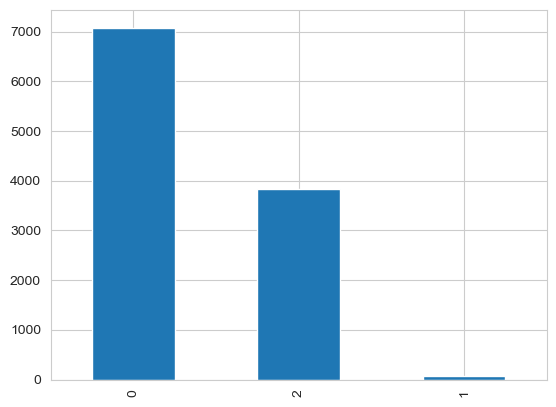

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.7042227884965416, variance=0.9060456960602313, skewness=0.6192499787666337, kurtosis=-1.6086033396551256)
Central Tendency and Dispersion:  {'Mean': 0.7042227884965416, 'Median': 0.0, 'Mode': 0, 'Variance': 0.9059632383157773, 'Standard Deviation': 0.9518210117011376, 'Kurtosis': -1.6086033396551256, 'Screw': 0.6192499787666337}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


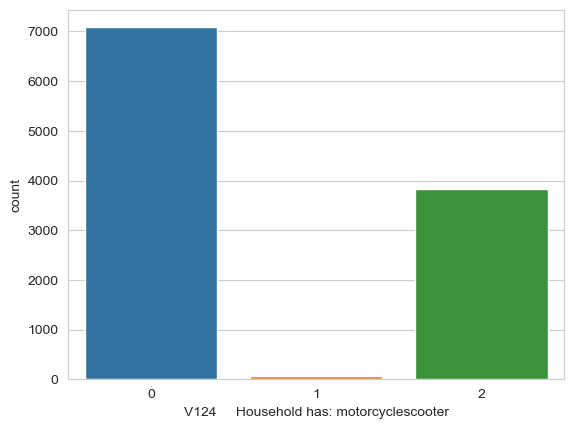

Feature Name:  V125     Household has: cartruck
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    9858
2    1058
1      72
Name: V125     Household has: cartruck, dtype: int64


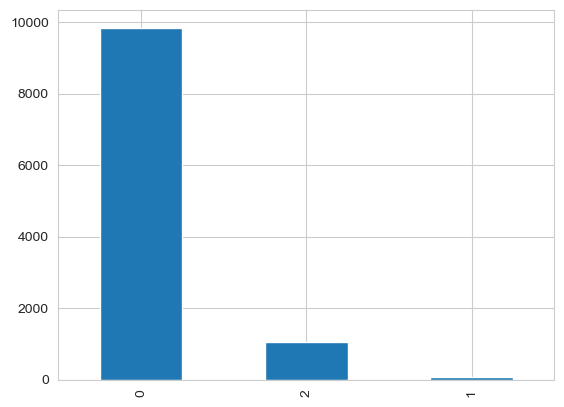

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.19912631962140517, variance=0.3520807875369405, skewness=2.674434588447906, kurtosis=5.204492631394668)
Central Tendency and Dispersion:  {'Mean': 0.19912631962140517, 'Median': 0.0, 'Mode': 0, 'Variance': 0.35204874523738305, 'Standard Deviation': 0.5933369575859766, 'Kurtosis': 5.204492631394668, 'Screw': 2.674434588447906}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


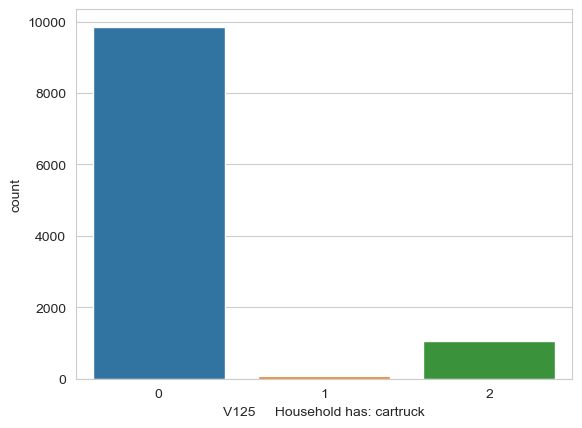

Feature Name:  V130     Religion
Number of Unique Values:  5
Unique Values:  [0 3 1 4 2]
Value Counts:  1    6259
3    3746
0     919
4      62
2       2
Name: V130     Religion, dtype: int64


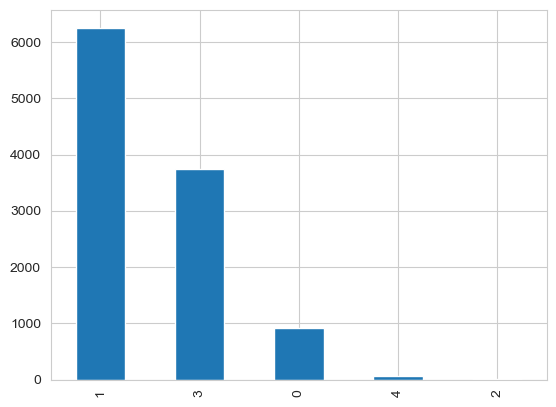

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.6153076082999636, variance=1.1197692964670927, skewness=0.4190312533036222, kurtosis=-1.335387384827813)
Central Tendency and Dispersion:  {'Mean': 1.6153076082999636, 'Median': 1.0, 'Mode': 1, 'Variance': 1.119667388085543, 'Standard Deviation': 1.0581433683984147, 'Kurtosis': -1.335387384827813, 'Screw': 0.4190312533036222}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


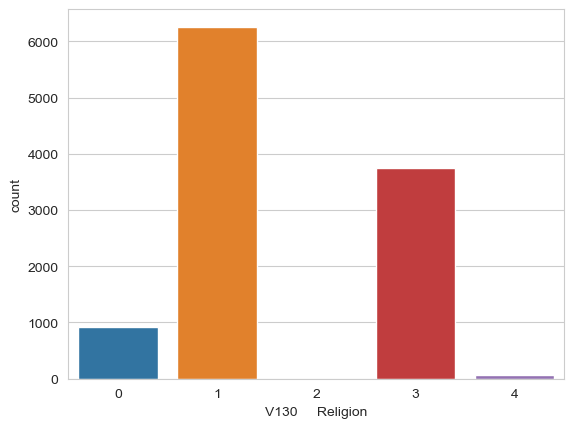

Feature Name:  V131     Ethnicity
Number of Unique Values:  165
Unique Values:  [150 142  80  78  73 152  52  81 161  57  79 104  91  40  32  76  30  62
  34  14 129 134  98  29 137   3 154 123  27 155  43  93  84 110  26 111
  38  17 164 119  69  56 105  45 102   8  15   9 143   5   6 125  70  22
  21 103 145  89 100  61 112 109   1   4  87  92 147 117 128  35 120  74
 124 127 126  63 156 135 162 107 158 115 118 144  64  24   2  23  71 148
  58  31 146 159  36 149  95  94  67 131  99 121  20  60  59  65 108 122
   0  97  55  11 133 106 153  18  51  96 163  19  68  33  25  41  66  42
  12 151 140  50  85  47  16 141 139  82  10  77 132  48 160  37  53  83
  75   7 130  90  88 101  49 136 138  13 114 157 116  44  46 113  54  28
  39  86  72]
Value Counts:  73     2922
142    1795
80     1333
57     1013
161     948
       ... 
47        1
123       1
154       1
77        1
72        1
Name: V131     Ethnicity, Length: 165, dtype: int64


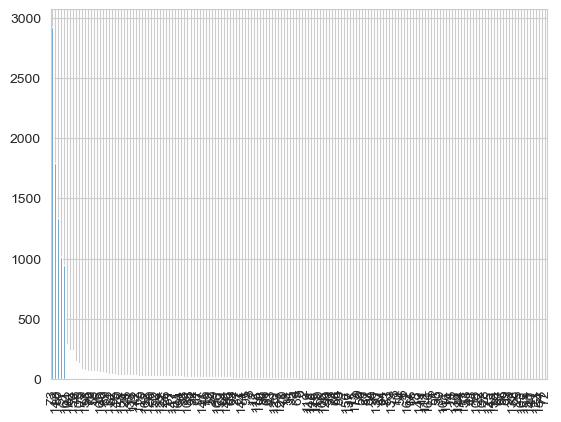

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 164), mean=97.01610848198034, variance=1488.6009055063885, skewness=0.3410367511927902, kurtosis=-1.0440364808102154)
Central Tendency and Dispersion:  {'Mean': 97.01610848198034, 'Median': 80.0, 'Mode': 73, 'Variance': 1488.4654303602738, 'Standard Deviation': 38.580635432303, 'Kurtosis': -1.0440364808102154, 'Screw': 0.3410367511927902}
Plotting the count plot


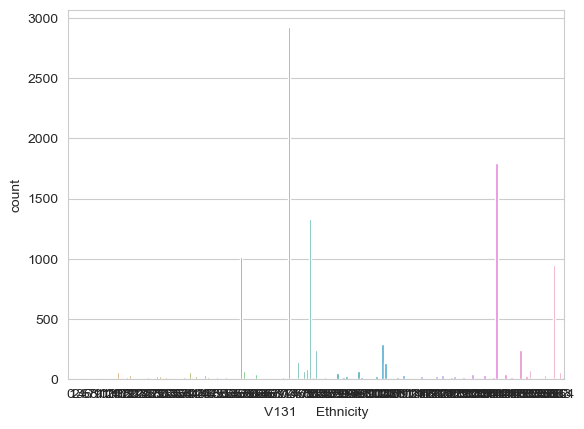

Feature Name:  V136     Number of household members (listed)
Number of Unique Values:  32
Unique Values:  [14.  6.  9.  5.  3.  7.  4.  8. 10. 12. 17.  2. 13. 11. 19. 21.  1. 15.
 16. 20. 22. 28. 18. 36. 43. 24. 27. 23. 46. 31. 30. 32.]
Value Counts:  5.0     1737
6.0     1617
4.0     1548
7.0     1185
8.0      945
3.0      801
9.0      693
10.0     495
11.0     398
13.0     316
12.0     302
14.0     191
15.0     154
16.0     107
2.0       98
19.0      66
17.0      66
18.0      60
22.0      41
23.0      39
20.0      34
24.0      22
21.0      20
46.0      11
27.0      11
32.0       7
43.0       7
28.0       6
1.0        4
36.0       3
31.0       2
30.0       2
Name: V136     Number of household members (listed), dtype: int64


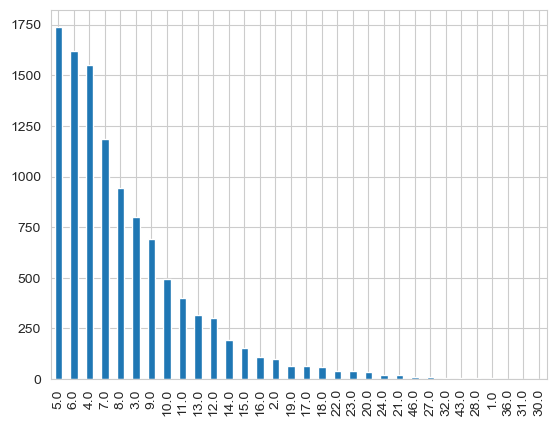

Data set description
DescribeResult(nobs=10988, minmax=(1.0, 46.0), mean=7.4298325445941025, variance=18.00117419603915, skewness=2.5610753795691954, kurtosis=12.83809411790261)
Central Tendency and Dispersion:  {'Mean': 7.4298325445941025, 'Median': 6.0, 'Mode': 5.0, 'Variance': 17.99953593846761, 'Standard Deviation': 4.242585996590712, 'Kurtosis': 12.83809411790261, 'Screw': 2.5610753795691954}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


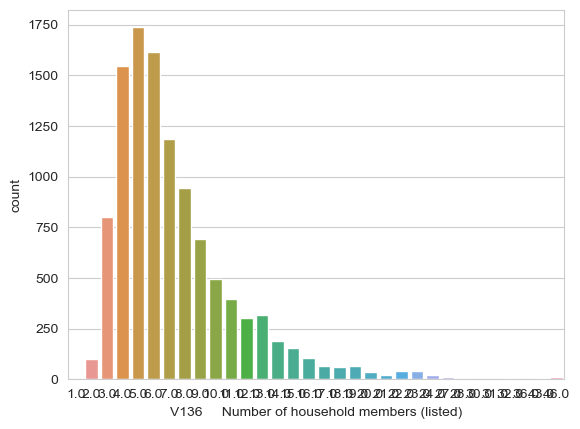

Feature Name:  V137     Number of children 5 and under in household (de jure)
Number of Unique Values:  12
Unique Values:  [ 3.  1.  2.  4.  6.  0.  5.  8. 13.  7. 10. 14.]
Value Counts:  2.0     4213
1.0     2727
3.0     2344
4.0      854
5.0      366
0.0      192
6.0      168
7.0       62
8.0       33
10.0      15
14.0      11
13.0       3
Name: V137     Number of children 5 and under in household (de jure), dtype: int64


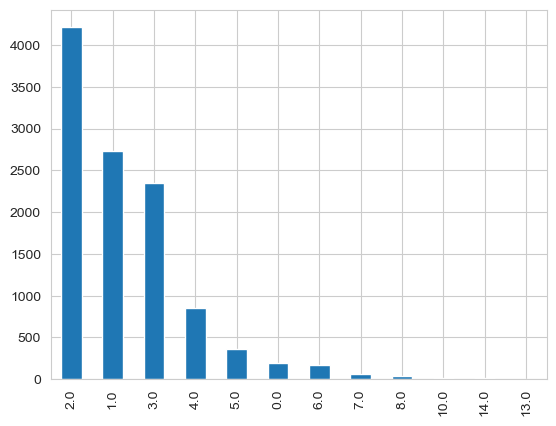

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 14.0), mean=2.318893338187113, variance=1.7989075947021353, skewness=1.9557034702981164, kurtosis=9.127142757580796)
Central Tendency and Dispersion:  {'Mean': 2.318893338187113, 'Median': 2.0, 'Mode': 2.0, 'Variance': 1.7987438790491772, 'Standard Deviation': 1.3411725761620603, 'Kurtosis': 9.127142757580796, 'Screw': 1.9557034702981164}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


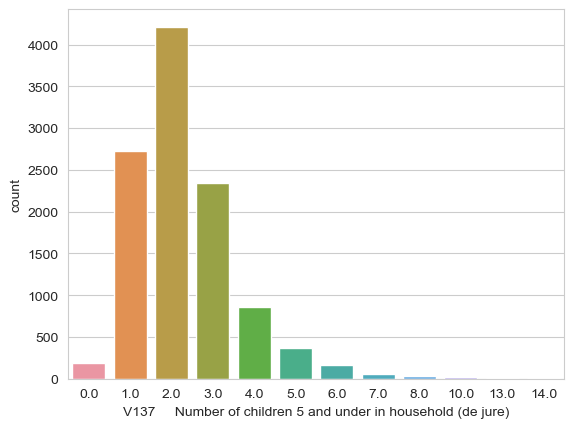

Feature Name:  V138     Number of eligible women in household (de facto)
Number of Unique Values:  9
Unique Values:  [3. 2. 1. 4. 5. 7. 6. 9. 8.]
Value Counts:  1.0    7133
2.0    2470
3.0     869
4.0     332
5.0     107
6.0      46
7.0      24
9.0       6
8.0       1
Name: V138     Number of eligible women in household (de facto), dtype: int64


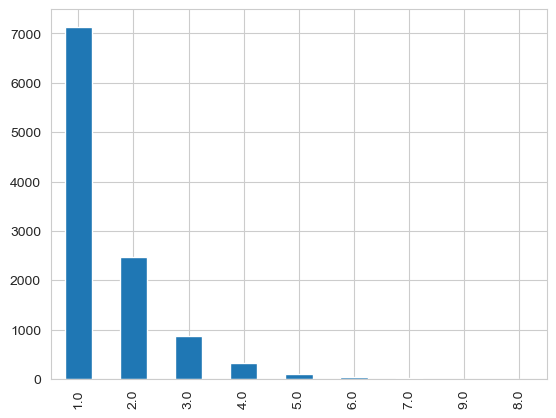

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 9.0), mean=1.5516017473607573, variance=0.8873888968095434, skewness=2.3524613566258856, kurtosis=7.519388743526887)
Central Tendency and Dispersion:  {'Mean': 1.5516017473607573, 'Median': 1.0, 'Mode': 1.0, 'Variance': 0.8873081369900302, 'Standard Deviation': 0.9419703482541424, 'Kurtosis': 7.519388743526887, 'Screw': 2.3524613566258856}
Plotting the count plot


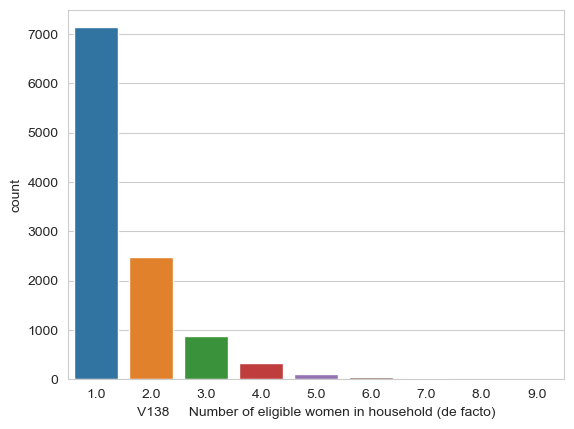

Feature Name:  V140     De jure type of place of residence
Number of Unique Values:  3
Unique Values:  [2 1 0]
Value Counts:  1    7672
2    3244
0      72
Name: V140     De jure type of place of residence, dtype: int64


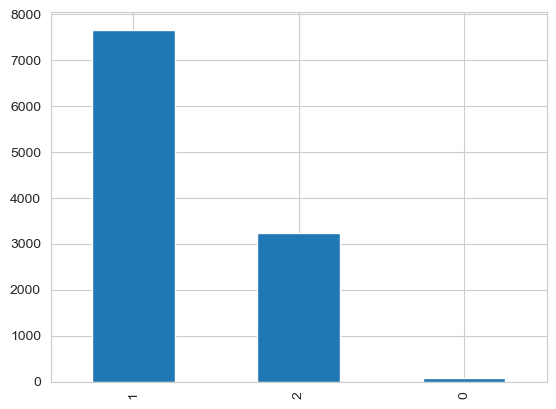

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2886785584273752, variance=0.2184683364583932, skewness=0.7388607511990881, kurtosis=-0.9357873682711673)
Central Tendency and Dispersion:  {'Mean': 1.2886785584273752, 'Median': 1.0, 'Mode': 1, 'Variance': 0.21844845401059027, 'Standard Deviation': 0.46738469595247795, 'Kurtosis': -0.9357873682711673, 'Screw': 0.7388607511990881}
Plotting the count plot


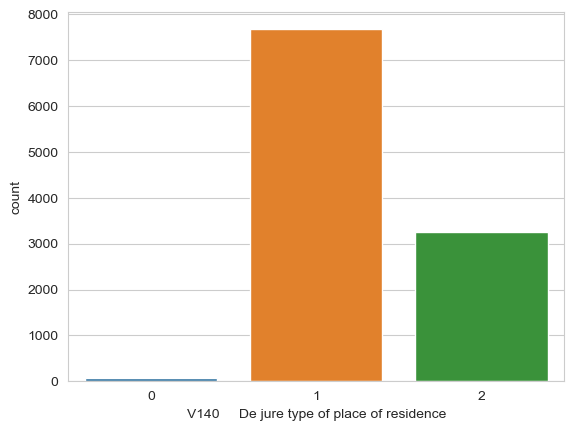

Feature Name:  V149     Educational attainment
Number of Unique Values:  6
Unique Values:  [4 0 2 1 3 5]
Value Counts:  5    4717
1    2183
4    1296
2    1159
0    1027
3     606
Name: V149     Educational attainment, dtype: int64


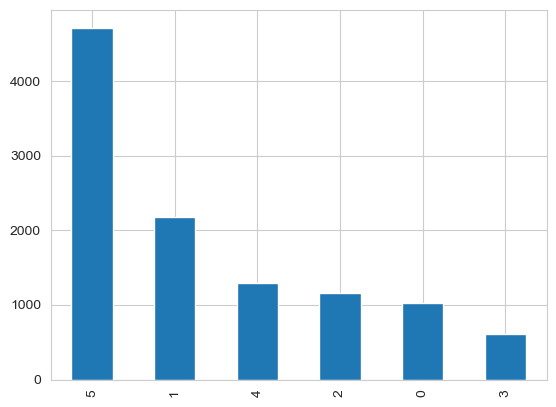

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 5), mean=3.1933017837641064, variance=3.539403568880045, skewness=-0.40940016728564776, kurtosis=-1.4707354952235323)
Central Tendency and Dispersion:  {'Mean': 3.1933017837641064, 'Median': 4.0, 'Mode': 5, 'Variance': 3.5390814535206636, 'Standard Deviation': 1.8812446554131825, 'Kurtosis': -1.4707354952235323, 'Screw': -0.40940016728564776}
Plotting the count plot


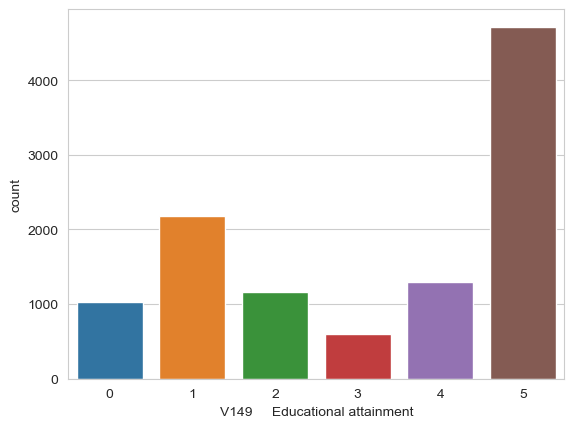

Feature Name:  V150     Relationship to household head
Number of Unique Values:  12
Unique Values:  [ 3  2 11 10  5  9  8  0  4  7  6  1]
Value Counts:  11    9251
5      530
2      499
3      333
9      161
10     105
8       69
4       21
6       11
0        4
7        3
1        1
Name: V150     Relationship to household head, dtype: int64


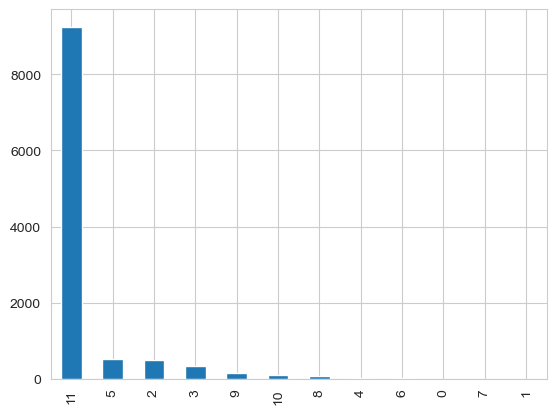

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 11), mean=9.977338915180196, variance=6.610117173921896, skewness=-2.316566155474265, kurtosis=3.7135102982425297)
Central Tendency and Dispersion:  {'Mean': 9.977338915180196, 'Median': 11.0, 'Mode': 11, 'Variance': 6.609515597914076, 'Standard Deviation': 2.570897819423027, 'Kurtosis': 3.7135102982425297, 'Screw': -2.316566155474265}
Plotting the count plot


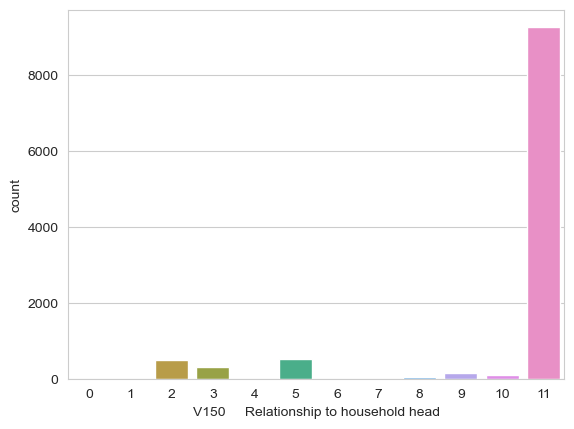

Feature Name:  V151     Sex of household head
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  1    10126
0      862
Name: V151     Sex of household head, dtype: int64


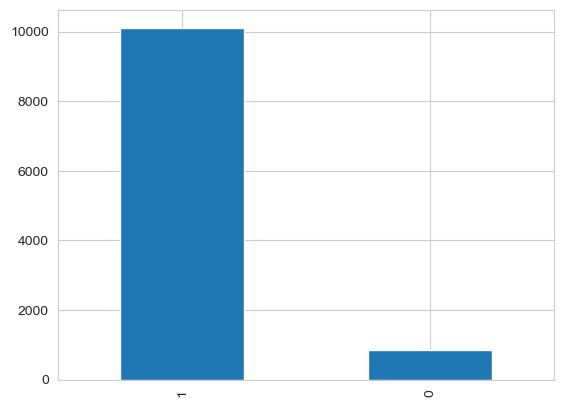

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.9215507826720059, variance=0.07230151767209148, skewness=-3.135638238510087, kurtosis=7.832227162806644)
Central Tendency and Dispersion:  {'Mean': 0.9215507826720059, 'Median': 1.0, 'Mode': 1, 'Variance': 0.07229493762861931, 'Standard Deviation': 0.26887717944931533, 'Kurtosis': 7.832227162806644, 'Screw': -3.135638238510087}
Plotting the count plot


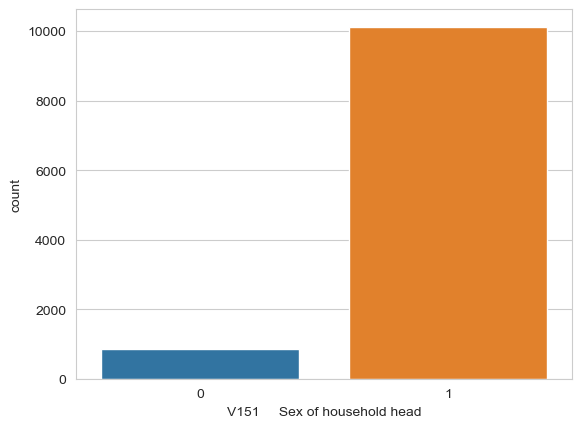

Feature Name:  V152     Age of household head
Number of Unique Values:  75
Unique Values:  [33 23 21 24 25 38  4 17  9 16 14  5 19 27 26 20 36 18 32 29 51 45 15 22
 12 30 40 10 11  8 13  3 35 47 50 28 63 37 43 31  6 48 53  7  2 42 44 57
 34 39 74 56 41 60 58  1 70 62 67 52  0 65 46 64 61 54 59 72 49 73 55 66
 71 68 69]
Value Counts:  23    1246
18     972
13     910
28     766
33     717
      ... 
66       3
71       3
68       3
69       3
0        2
Name: V152     Age of household head, Length: 75, dtype: int64


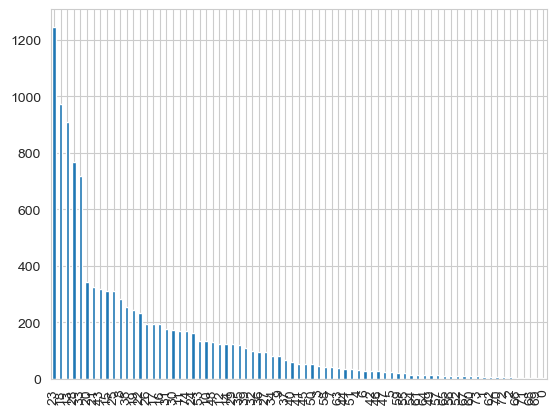

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 74), mean=25.78749544958136, variance=171.70244851868324, skewness=1.3036017412354681, kurtosis=2.2268194686462053)
Central Tendency and Dispersion:  {'Mean': 25.78749544958136, 'Median': 23.0, 'Mode': 23, 'Variance': 171.68682215824288, 'Standard Deviation': 13.102931815370287, 'Kurtosis': 2.2268194686462053, 'Screw': 1.3036017412354681}
Plotting the count plot


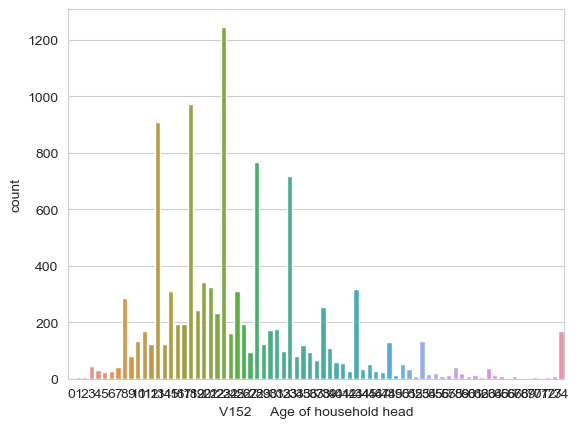

Feature Name:  V153     Household has: telephone (land-line)
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    10795
2      121
1       72
Name: V153     Household has: telephone (land-line), dtype: int64


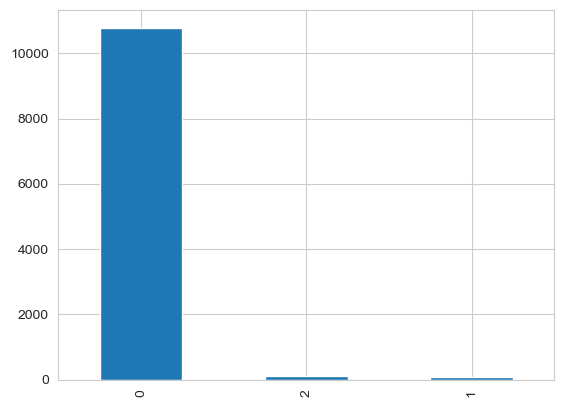

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.028576629049872588, variance=0.04978856270850461, skewness=8.134457461111717, kurtosis=66.46752697614275)
Central Tendency and Dispersion:  {'Mean': 0.028576629049872588, 'Median': 0.0, 'Mode': 0, 'Variance': 0.04978403153242993, 'Standard Deviation': 0.22312335496856875, 'Kurtosis': 66.46752697614275, 'Screw': 8.134457461111717}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


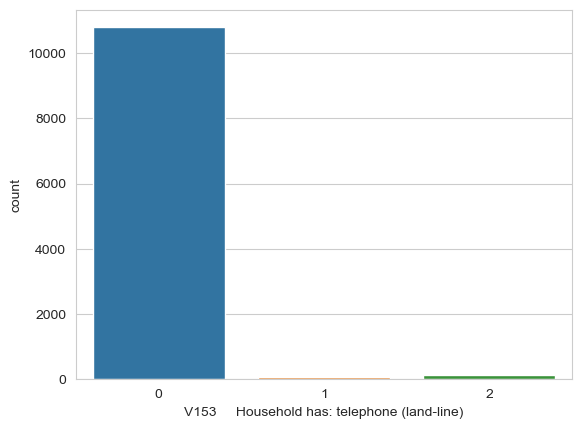

Feature Name:  V155     Literacy
Number of Unique Values:  5
Unique Values:  [0 1 3 4 2]
Value Counts:  3    5568
1    3070
0    2325
4      19
2       6
Name: V155     Literacy, dtype: int64


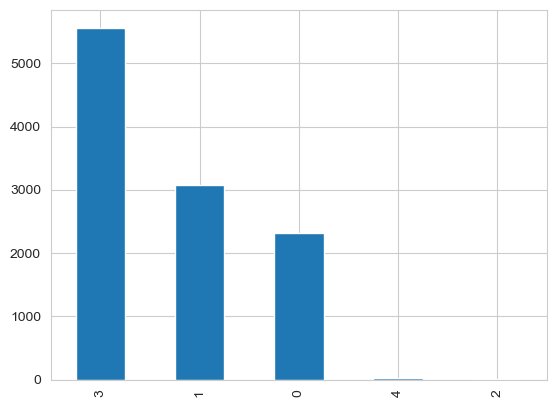

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.8076082999635967, variance=1.6025561068647538, skewness=-0.25615391639079327, kurtosis=-1.6594313209594054)
Central Tendency and Dispersion:  {'Mean': 1.8076082999635967, 'Median': 3.0, 'Mode': 3, 'Variance': 1.6024102608411948, 'Standard Deviation': 1.265863444784308, 'Kurtosis': -1.6594313209594054, 'Screw': -0.25615391639079327}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


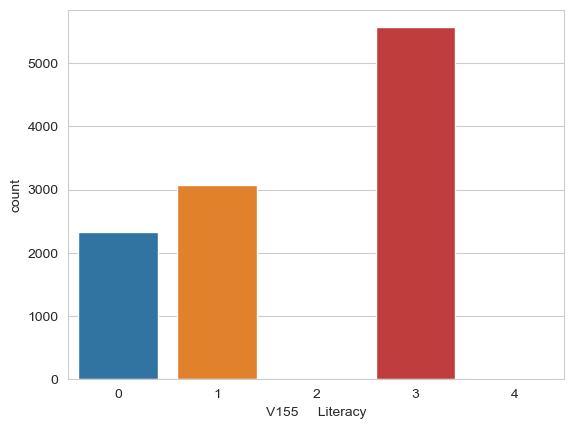

Feature Name:  V169A    Owns a mobile telephone
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  1    6200
0    4788
Name: V169A    Owns a mobile telephone, dtype: int64


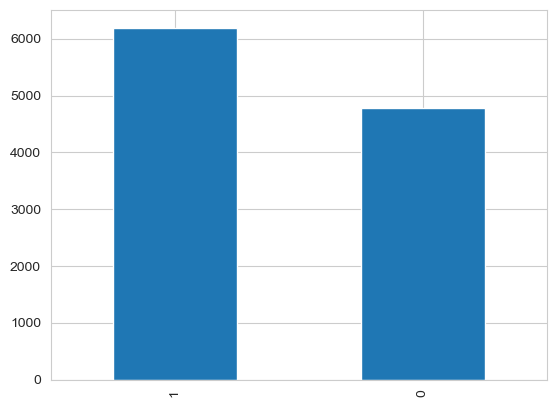

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.5642519111758282, variance=0.24589407032946814, skewness=-0.2591563061146744, kurtosis=-1.932838009000998)
Central Tendency and Dispersion:  {'Mean': 0.5642519111758282, 'Median': 1.0, 'Mode': 1, 'Variance': 0.24587169191025357, 'Standard Deviation': 0.49585450679635207, 'Kurtosis': -1.932838009000998, 'Screw': -0.2591563061146744}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


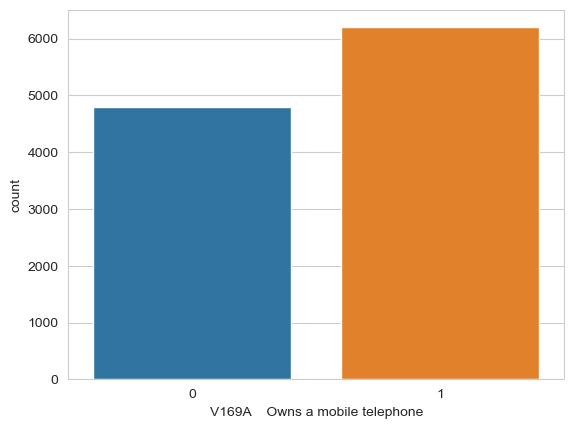

Feature Name:  V171A    Use of internet
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    8893
2    1883
1     212
Name: V171A    Use of internet, dtype: int64


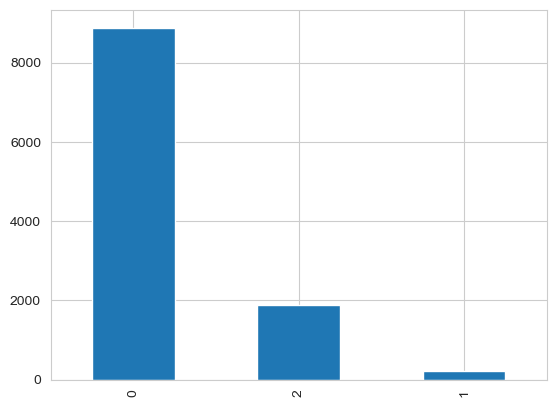

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.362031306880233, variance=0.5737543880249779, skewness=1.656232468650788, kurtosis=0.7997924103174965)
Central Tendency and Dispersion:  {'Mean': 0.362031306880233, 'Median': 0.0, 'Mode': 0, 'Variance': 0.5737021715717538, 'Standard Deviation': 0.7574312982520288, 'Kurtosis': 0.7997924103174965, 'Screw': 1.656232468650788}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


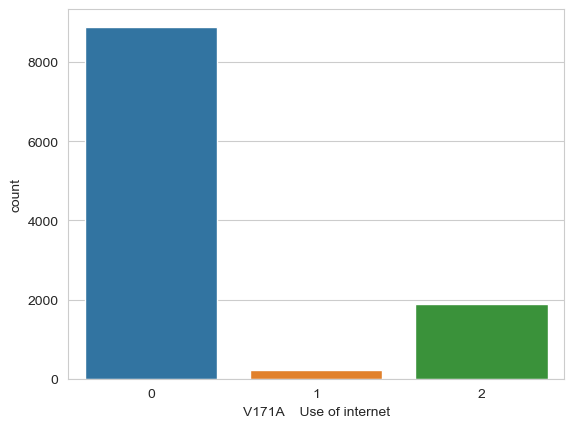

Feature Name:  V190     Wealth index combined
Number of Unique Values:  5
Unique Values:  [3 0 1 4 2]
Value Counts:  0    2265
2    2237
1    2212
3    2187
4    2087
Name: V190     Wealth index combined, dtype: int64


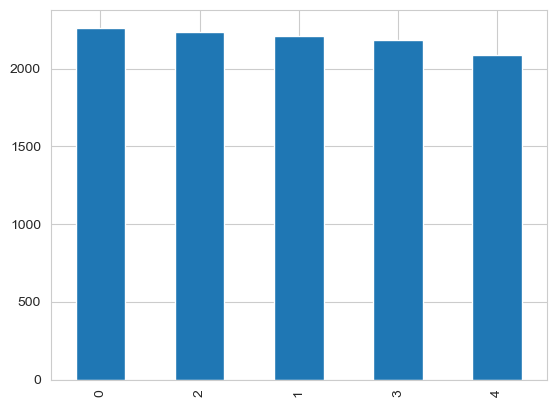

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.9653258099745177, variance=1.983597809556775, skewness=0.02666742193556239, kurtosis=-1.288368408057435)
Central Tendency and Dispersion:  {'Mean': 1.9653258099745177, 'Median': 2.0, 'Mode': 0, 'Variance': 1.9834172855478964, 'Standard Deviation': 1.4083384840115307, 'Kurtosis': -1.288368408057435, 'Screw': 0.02666742193556239}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


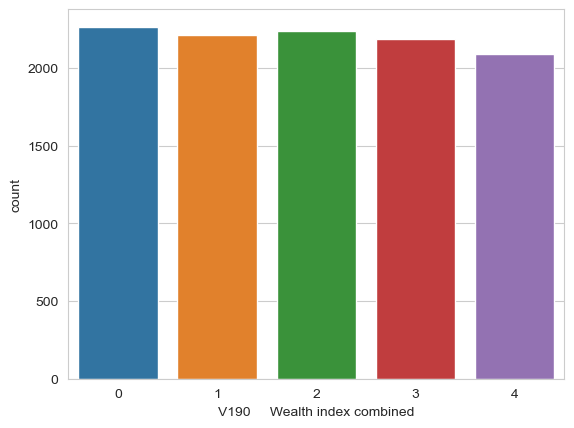

Feature Name:  V191     Wealth index factor score combined (5 decimals)
Number of Unique Values:  6350
Unique Values:  [  13446.   30325.  -29099. ... -104719.  -76330. -131377.]
Value Counts:  -96734.0     12
 65481.0     11
-92615.0     10
 129223.0     8
-64222.0      8
             ..
-137955.0     1
-119805.0     1
-108693.0     1
-109932.0     1
-131377.0     1
Name: V191     Wealth index factor score combined (5 decimals), Length: 6350, dtype: int64


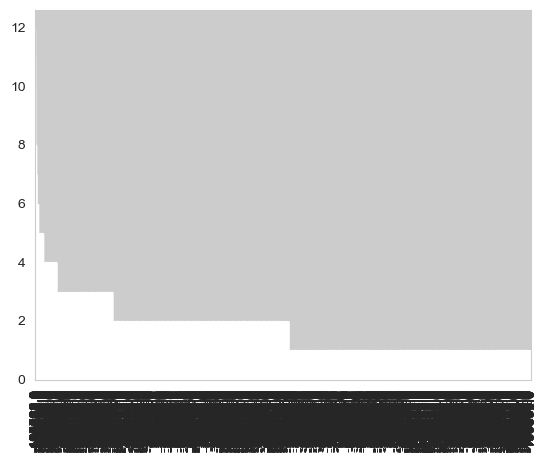

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(-194845.0, 207282.0), mean=-23340.289042591918, variance=9173682143.829618, skewness=0.5323416656094283, kurtosis=-0.8677055168509491)
Central Tendency and Dispersion:  {'Mean': -23340.289042591918, 'Median': -48056.5, 'Mode': -96734.0, 'Variance': 9172847261.945396, 'Standard Deviation': 95774.98244293964, 'Kurtosis': -0.8677055168509491, 'Screw': 0.5323416656094283}
Plotting the count plot


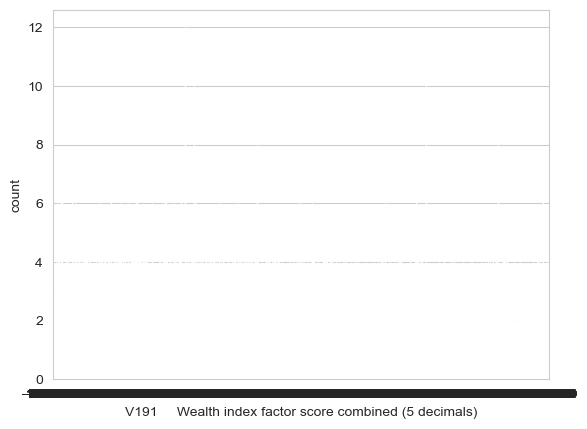

Feature Name:  V201     Total children ever born
Number of Unique Values:  18
Unique Values:  [ 2.  4.  6.  7.  1.  3.  8.  5.  9. 11. 10. 12. 14. 13. 18. 17. 15. 16.]
Value Counts:  2.0     2089
3.0     2071
4.0     1715
5.0     1245
1.0     1211
6.0      887
7.0      560
8.0      434
9.0      310
10.0     211
11.0     127
12.0      51
13.0      44
14.0      21
15.0       7
17.0       3
18.0       1
16.0       1
Name: V201     Total children ever born, dtype: int64


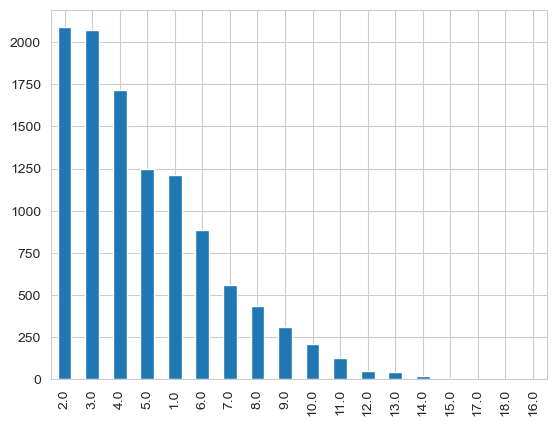

Data set description
DescribeResult(nobs=10988, minmax=(1.0, 18.0), mean=4.128685839097197, variance=6.381363267818018, skewness=1.1299618005769452, kurtosis=1.297433787349342)
Central Tendency and Dispersion:  {'Mean': 4.128685839097197, 'Median': 4.0, 'Mode': 2.0, 'Variance': 6.380782510330957, 'Standard Deviation': 2.526021082717038, 'Kurtosis': 1.297433787349342, 'Screw': 1.1299618005769452}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


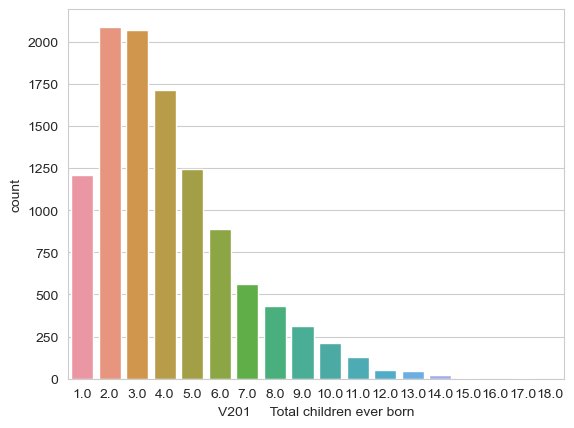

Feature Name:  V202     Sons at home
Number of Unique Values:  12
Unique Values:  [ 1.  0.  2.  4.  3.  5. 11.  6.  7.  8.  9. 12.]
Value Counts:  1.0     3614
2.0     2887
0.0     1867
3.0     1566
4.0      693
5.0      237
6.0       87
7.0       26
8.0        8
11.0       1
9.0        1
12.0       1
Name: V202     Sons at home, dtype: int64


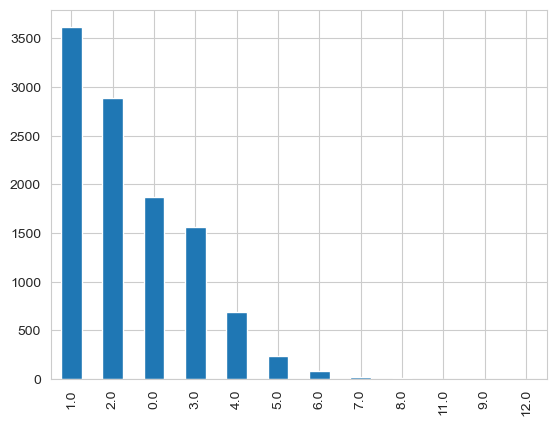

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 12.0), mean=1.714870768110666, variance=1.7493119246828723, skewness=0.9548721596994604, kurtosis=1.5042240295873723)
Central Tendency and Dispersion:  {'Mean': 1.714870768110666, 'Median': 2.0, 'Mode': 1.0, 'Variance': 1.7491527226511392, 'Standard Deviation': 1.3225553760244366, 'Kurtosis': 1.5042240295873723, 'Screw': 0.9548721596994604}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


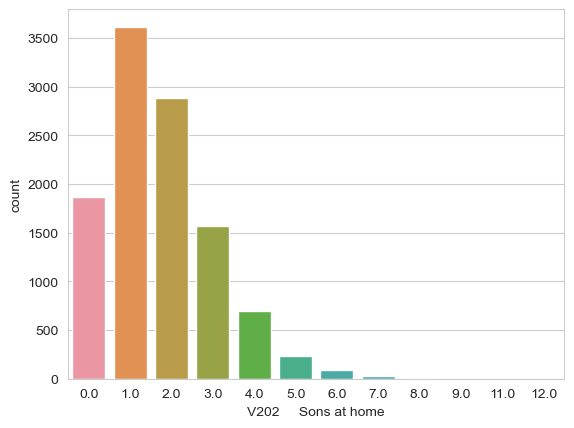

Feature Name:  V203     Daughters at home
Number of Unique Values:  10
Unique Values:  [ 1.  2.  0.  4.  3.  5.  6.  7.  8. 11.]
Value Counts:  1.0     3696
2.0     2720
0.0     2053
3.0     1549
4.0      641
5.0      240
6.0       70
7.0       12
8.0        6
11.0       1
Name: V203     Daughters at home, dtype: int64


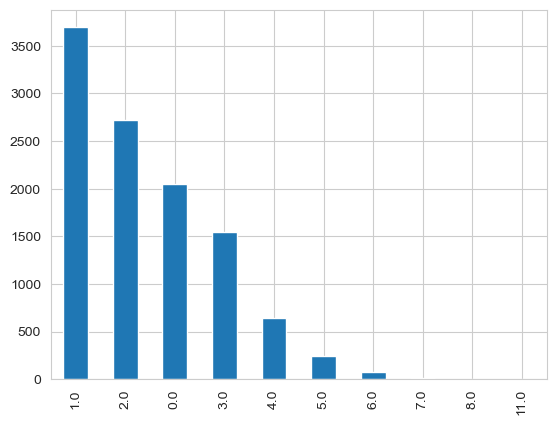

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 11.0), mean=1.64816163087004, variance=1.6872479170786912, skewness=0.8757844888029318, kurtosis=0.9420101388247502)
Central Tendency and Dispersion:  {'Mean': 1.64816163087004, 'Median': 1.0, 'Mode': 1.0, 'Variance': 1.6870943633912976, 'Standard Deviation': 1.298881966689544, 'Kurtosis': 0.9420101388247502, 'Screw': 0.8757844888029318}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


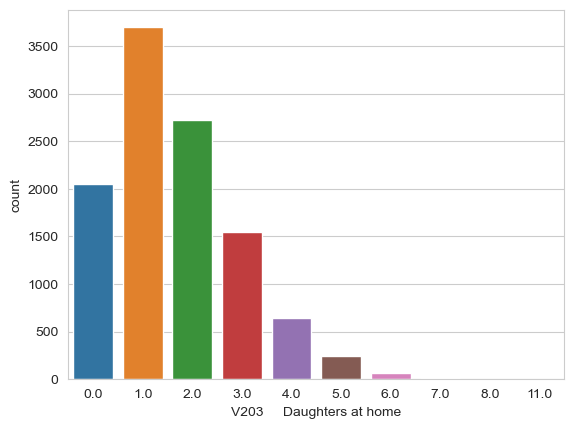

Feature Name:  V204     Sons elsewhere
Number of Unique Values:  7
Unique Values:  [0. 1. 2. 3. 5. 4. 6.]
Value Counts:  0.0    9823
1.0     780
2.0     277
3.0      84
4.0      20
5.0       2
6.0       2
Name: V204     Sons elsewhere, dtype: int64


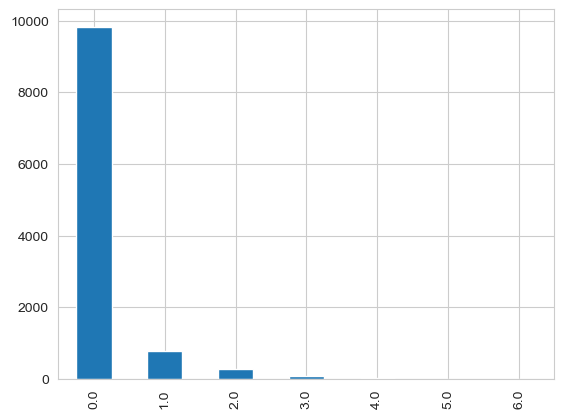

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 6.0), mean=0.15362213323625773, variance=0.25727549277302236, skewness=4.103687405948444, kurtosis=20.318207473171977)
Central Tendency and Dispersion:  {'Mean': 0.15362213323625773, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.2572520785490714, 'Standard Deviation': 0.5072002351626735, 'Kurtosis': 20.318207473171977, 'Screw': 4.103687405948444}
Plotting the count plot


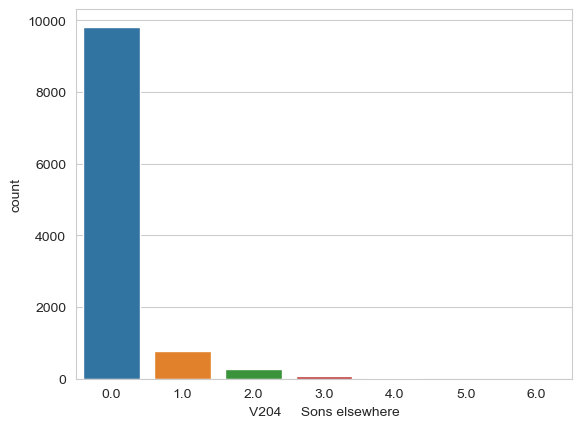

Feature Name:  V205     Daughters elsewhere
Number of Unique Values:  7
Unique Values:  [0. 1. 3. 2. 4. 5. 6.]
Value Counts:  0.0    9723
1.0     843
2.0     289
3.0      95
4.0      28
5.0       9
6.0       1
Name: V205     Daughters elsewhere, dtype: int64


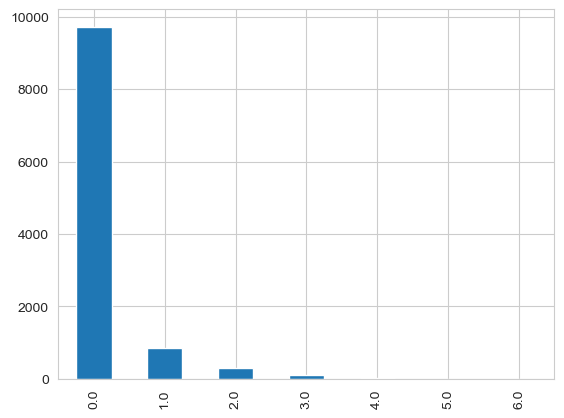

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 6.0), mean=0.1700946487076811, variance=0.29535752266909476, skewness=4.050416174214186, kurtosis=19.766158970381742)
Central Tendency and Dispersion:  {'Mean': 0.1700946487076811, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.29533064266157116, 'Standard Deviation': 0.5434433205602689, 'Kurtosis': 19.766158970381742, 'Screw': 4.050416174214186}
Plotting the count plot


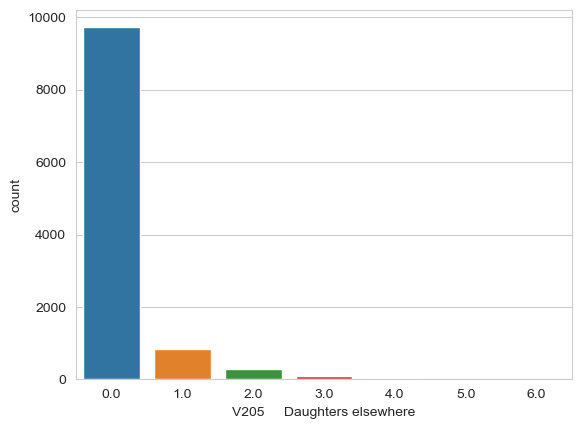

Feature Name:  V206     Sons who have died
Number of Unique Values:  9
Unique Values:  [0. 3. 1. 2. 4. 5. 6. 8. 7.]
Value Counts:  0.0    9141
1.0    1264
2.0     406
3.0     124
4.0      35
5.0       7
6.0       5
8.0       5
7.0       1
Name: V206     Sons who have died, dtype: int64


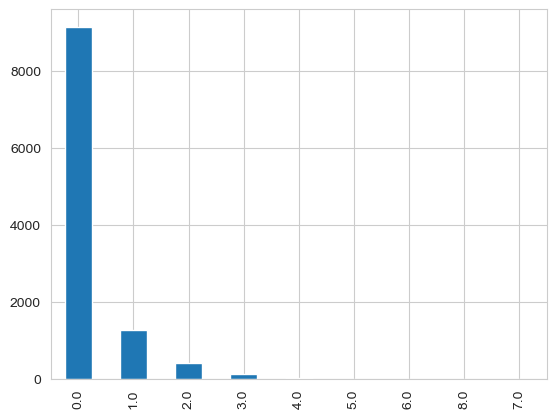

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 8.0), mean=0.24572260647979613, variance=0.4209109822976746, skewness=3.7950968378465055, kurtosis=21.45272575463949)
Central Tendency and Dispersion:  {'Mean': 0.24572260647979613, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.4208726758740945, 'Standard Deviation': 0.648747004520325, 'Kurtosis': 21.45272575463949, 'Screw': 3.7950968378465055}
Plotting the count plot


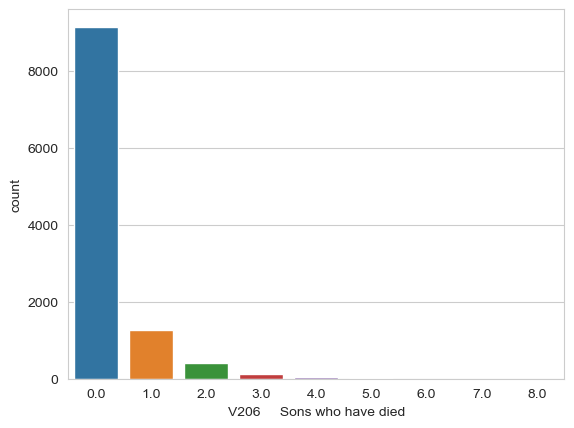

Feature Name:  V207     Daughters who have died
Number of Unique Values:  7
Unique Values:  [0. 2. 1. 3. 4. 5. 6.]
Value Counts:  0.0    9443
1.0    1107
2.0     304
3.0      98
4.0      34
5.0       1
6.0       1
Name: V207     Daughters who have died, dtype: int64


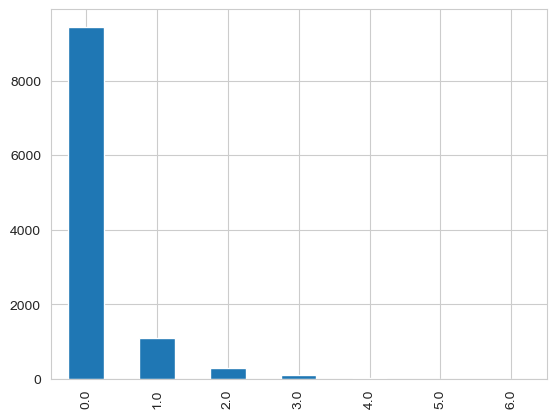

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 6.0), mean=0.19621405169275574, variance=0.3082700013243305, skewness=3.5232894205767993, kurtosis=14.754176222577232)
Central Tendency and Dispersion:  {'Mean': 0.19621405169275574, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.30824194617313605, 'Standard Deviation': 0.5551954126009473, 'Kurtosis': 14.754176222577232, 'Screw': 3.5232894205767993}
Plotting the count plot


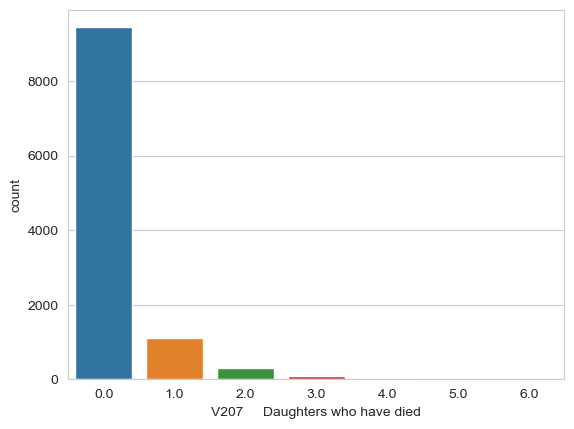

Feature Name:  V208     Births in last five years
Number of Unique Values:  5
Unique Values:  [1. 2. 3. 4. 5.]
Value Counts:  2.0    5338
1.0    4018
3.0    1527
4.0     100
5.0       5
Name: V208     Births in last five years, dtype: int64


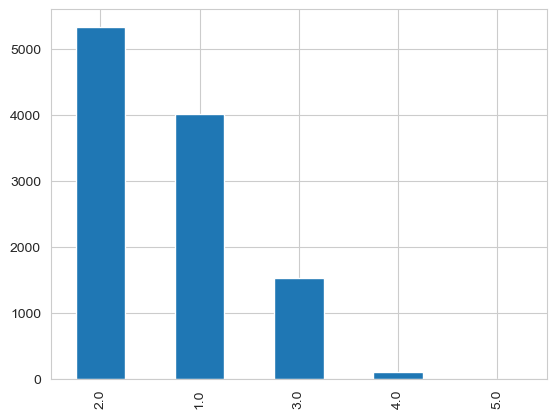

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 5.0), mean=1.792864943574809, variance=0.502280933064191, skewness=0.5039508844987804, kurtosis=-0.2066423360280627)
Central Tendency and Dispersion:  {'Mean': 1.792864943574809, 'Median': 2.0, 'Mode': 2.0, 'Variance': 0.5022352212937992, 'Standard Deviation': 0.7086855588297247, 'Kurtosis': -0.2066423360280627, 'Screw': 0.5039508844987804}
Plotting the count plot


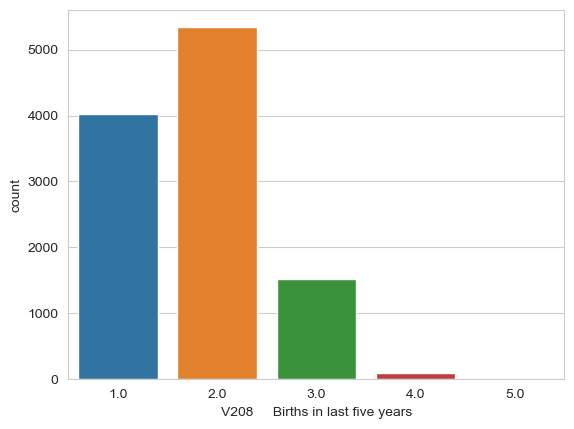

Feature Name:  V209     Births in past year
Number of Unique Values:  4
Unique Values:  [3 0 1 2]
Value Counts:  3    7173
0    3663
1     148
2       4
Name: V209     Births in past year, dtype: int64


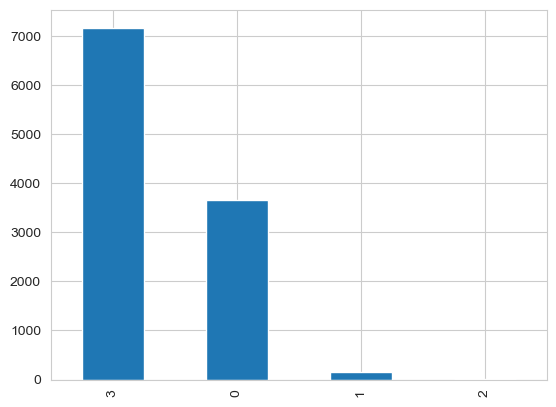

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=1.9726064797961413, variance=1.9991585100954434, skewness=-0.6592742183885326, kurtosis=-1.551787429073977)
Central Tendency and Dispersion:  {'Mean': 1.9726064797961413, 'Median': 3.0, 'Mode': 3, 'Variance': 1.9989765699325295, 'Standard Deviation': 1.4138516789014786, 'Kurtosis': -1.551787429073977, 'Screw': -0.6592742183885326}
Plotting the count plot


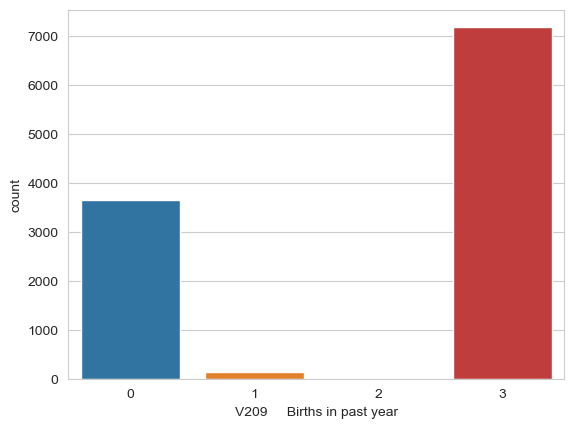

Feature Name:  V210     Births in month of interview
Number of Unique Values:  3
Unique Values:  [0. 1. 2.]
Value Counts:  0.0    10826
1.0      153
2.0        9
Name: V210     Births in month of interview, dtype: int64


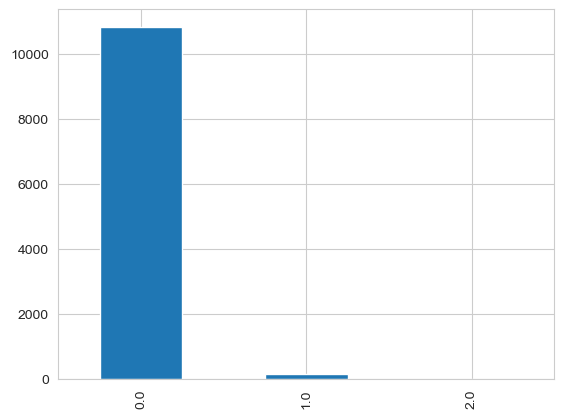

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 2.0), mean=0.015562431743720422, variance=0.016959936668046224, skewness=8.912065076214894, kurtosis=86.64110416653227)
Central Tendency and Dispersion:  {'Mean': 0.015562431743720422, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.016958393171807775, 'Standard Deviation': 0.1302243954557201, 'Kurtosis': 86.64110416653227, 'Screw': 8.912065076214894}
Plotting the count plot


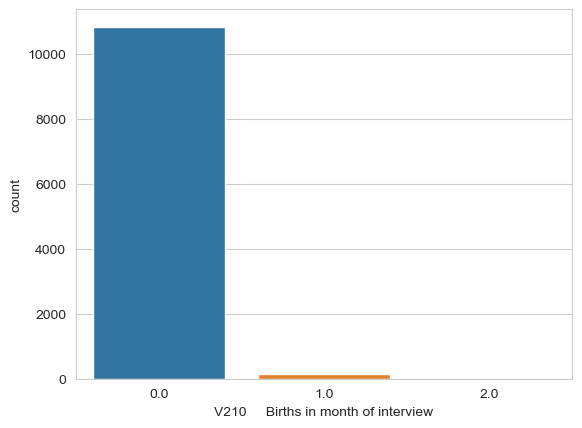

Feature Name:  V213     Currently pregnant
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    9982
1    1006
Name: V213     Currently pregnant, dtype: int64


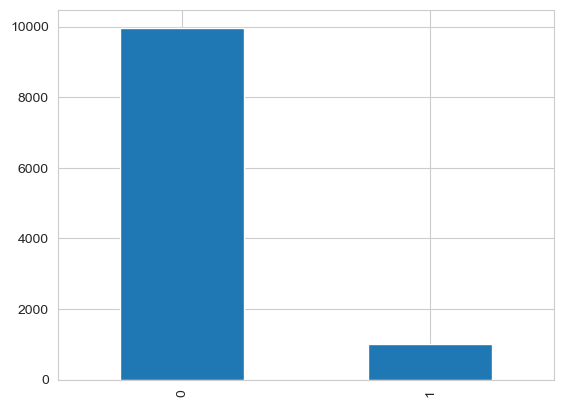

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.09155442300691663, variance=0.08317978069127531, skewness=2.8325336035569424, kurtosis=6.023246615279277)
Central Tendency and Dispersion:  {'Mean': 0.09155442300691663, 'Median': 0.0, 'Mode': 0, 'Variance': 0.08317221063478719, 'Standard Deviation': 0.28839592686927323, 'Kurtosis': 6.023246615279277, 'Screw': 2.8325336035569424}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


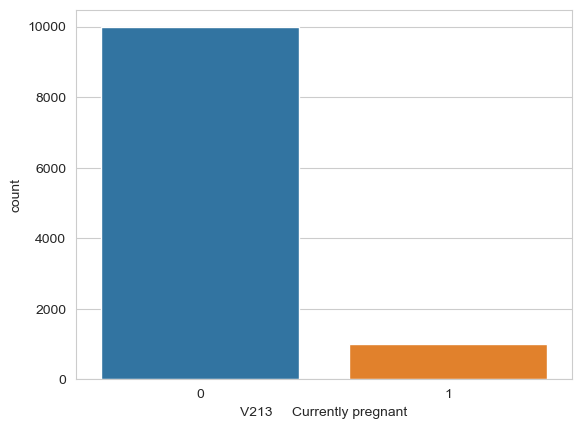

Feature Name:  V214     Duration of current pregnancy in months
Number of Unique Values:  10
Unique Values:  [nan  4.  5.  3.  8.  2.  6.  7.  9.  1.  0.]
Value Counts:  4.0    172
5.0    154
6.0    133
8.0    124
3.0    122
7.0    118
2.0    111
9.0     35
1.0     34
0.0      3
Name: V214     Duration of current pregnancy in months, dtype: int64


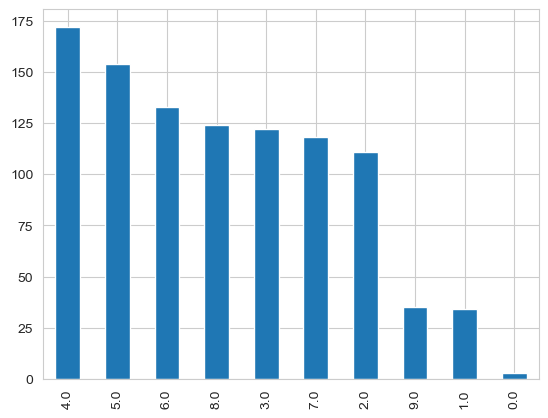

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': nan, 'Median': nan, 'Mode': nan, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


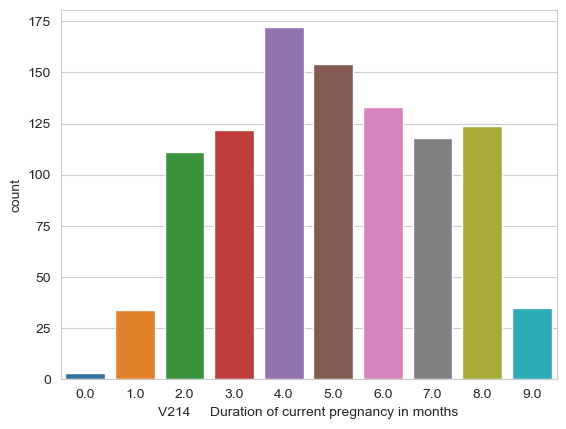

Feature Name:  V218     Number of living children
Number of Unique Values:  17
Unique Values:  [ 2.  4.  1.  6.  3.  8.  5.  7.  9. 10.  0. 14. 11. 12. 16. 13. 15.]
Value Counts:  2.0     2300
3.0     2188
4.0     1830
1.0     1360
5.0     1196
6.0      833
7.0      564
8.0      344
9.0      146
10.0      91
0.0       70
11.0      43
12.0      17
16.0       2
13.0       2
14.0       1
15.0       1
Name: V218     Number of living children, dtype: int64


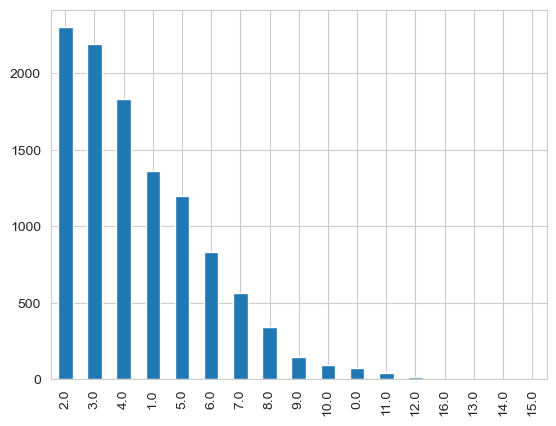

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 16.0), mean=3.686749180924645, variance=4.511676588763323, skewness=0.938795915041183, kurtosis=0.895823648117688)
Central Tendency and Dispersion:  {'Mean': 3.686749180924645, 'Median': 3.0, 'Mode': 2.0, 'Variance': 4.511265988418513, 'Standard Deviation': 2.1239741025771743, 'Kurtosis': 0.895823648117688, 'Screw': 0.938795915041183}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


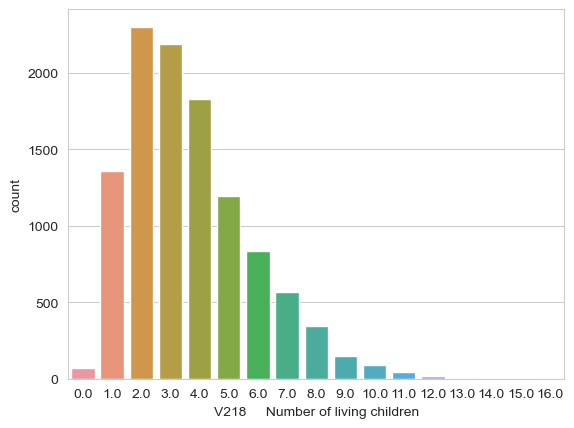

Feature Name:  V219     Living children + current pregnancy
Number of Unique Values:  17
Unique Values:  [ 2.  4.  1.  6.  3.  8.  5.  7.  9. 10.  0. 14. 11. 12. 13. 16. 15.]
Value Counts:  2.0     2260
3.0     2217
4.0     1903
5.0     1258
1.0     1183
6.0      862
7.0      566
8.0      360
9.0      167
10.0      92
0.0       49
11.0      48
12.0      13
13.0       6
16.0       2
14.0       1
15.0       1
Name: V219     Living children + current pregnancy, dtype: int64


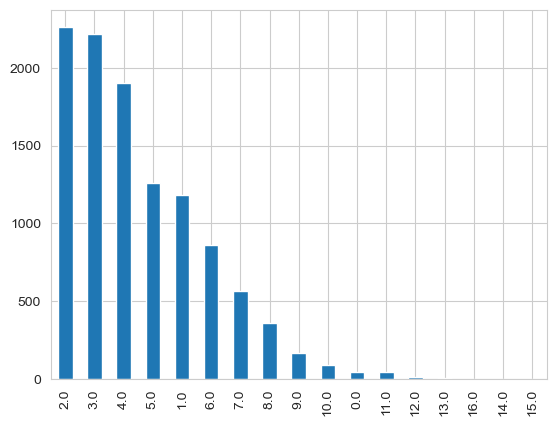

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 16.0), mean=3.778303603931562, variance=4.493851604548766, skewness=0.937189836433465, kurtosis=0.9204095366936182)
Central Tendency and Dispersion:  {'Mean': 3.778303603931562, 'Median': 3.0, 'Mode': 2.0, 'Variance': 4.493442626426765, 'Standard Deviation': 2.119774192320202, 'Kurtosis': 0.9204095366936182, 'Screw': 0.937189836433465}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


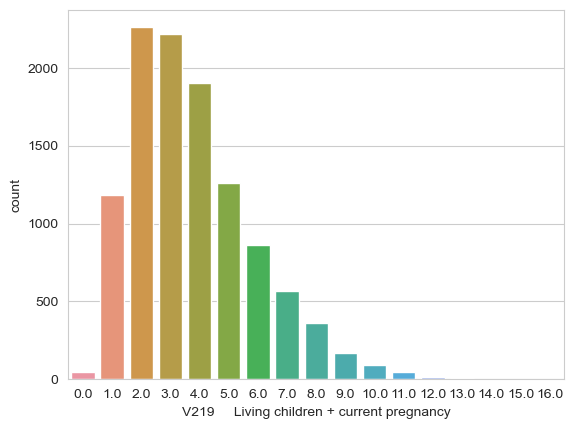

Feature Name:  V222     Last birth to interview (months)
Number of Unique Values:  60
Unique Values:  [44. 18.  5. 43. 19. 28. 49. 23.  2.  6. 10. 16.  4. 13. 40. 11.  8. 50.
 20. 39. 41. 36.  7. 54.  9. 42. 24. 48. 34. 15. 12. 37. 25. 27. 21. 17.
 46. 51. 22. 55. 38. 59. 31.  0. 32. 45. 14.  1. 35. 26. 33. 29. 53.  3.
 52. 30. 56. 47. 58. 57.]
Value Counts:  7.0     363
13.0    359
18.0    345
12.0    340
9.0     333
6.0     324
3.0     323
16.0    320
4.0     304
0.0     302
8.0     298
19.0    293
2.0     292
17.0    291
1.0     280
24.0    267
15.0    261
14.0    259
10.0    256
26.0    254
21.0    242
25.0    239
29.0    230
31.0    226
27.0    225
20.0    224
5.0     213
28.0    205
32.0    195
30.0    190
11.0    187
22.0    161
40.0    155
23.0    145
36.0    131
33.0    130
37.0    117
39.0    115
41.0    111
42.0    106
38.0    103
43.0    102
34.0    102
44.0     94
53.0     89
55.0     78
35.0     78
48.0     78
52.0     75
45.0     69
54.0     60
51.0     58
59.0     55
49

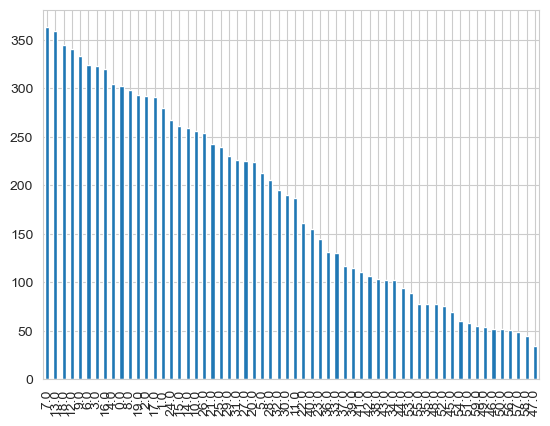

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 59.0), mean=20.738896978522025, variance=217.07963005655594, skewness=0.6526926295693563, kurtosis=-0.36148573602763534)
Central Tendency and Dispersion:  {'Mean': 20.738896978522025, 'Median': 18.0, 'Mode': 7.0, 'Variance': 217.0598739926629, 'Standard Deviation': 14.732951978224285, 'Kurtosis': -0.36148573602763534, 'Screw': 0.6526926295693563}
Plotting the count plot


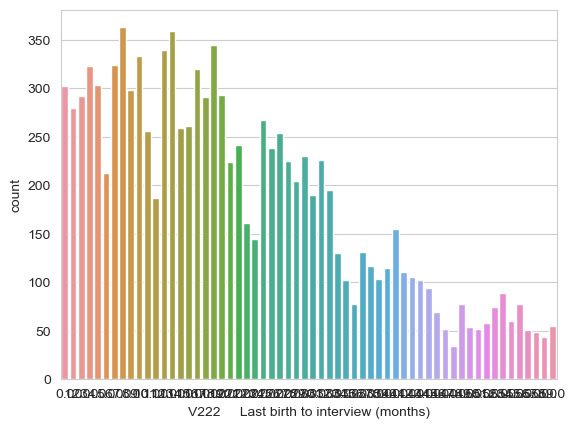

Feature Name:  V223     Completeness of current pregnancy information
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  1    9982
0    1006
Name: V223     Completeness of current pregnancy information, dtype: int64


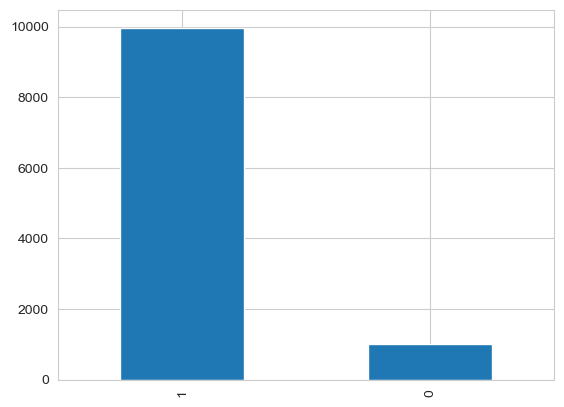

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.9084455769930834, variance=0.08317978069127531, skewness=-2.8325336035569424, kurtosis=6.023246615279277)
Central Tendency and Dispersion:  {'Mean': 0.9084455769930834, 'Median': 1.0, 'Mode': 1, 'Variance': 0.08317221063478719, 'Standard Deviation': 0.28839592686927323, 'Kurtosis': 6.023246615279277, 'Screw': -2.8325336035569424}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


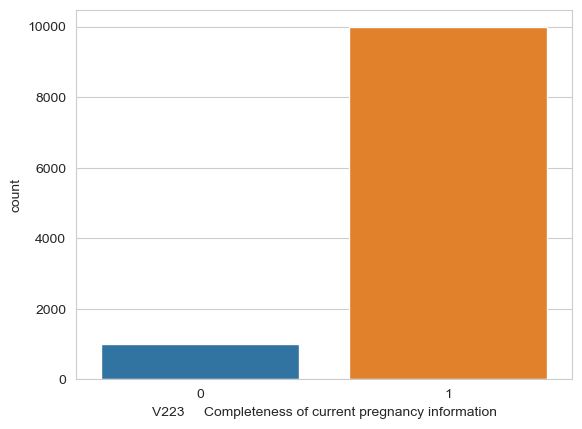

In [212]:
for cols in data_cluster[0].columns:
    feature_uni_varaite_analysis(cols, data_cluster[0])

## 2.1.2. Univariate Analysis of Socio economic Variables

Feature Name:  V106     Highest educational level
Number of Unique Values:  4
Unique Values:  [3 2 0 1]
Value Counts:  1    4717
3    3479
2    1633
0    1159
Name: V106     Highest educational level, dtype: int64


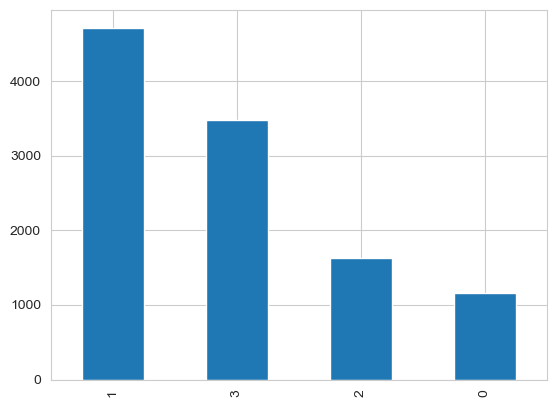

Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=1.6763742264288315, variance=1.0631825565833188, skewness=0.09991955110974005, kurtosis=-1.3220595635978505)
Central Tendency and Dispersion:  {'Mean': 1.6763742264288315, 'Median': 1.0, 'Mode': 1, 'Variance': 1.0630857980688864, 'Standard Deviation': 1.0310605210504795, 'Kurtosis': -1.3220595635978505, 'Screw': 0.09991955110974005}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


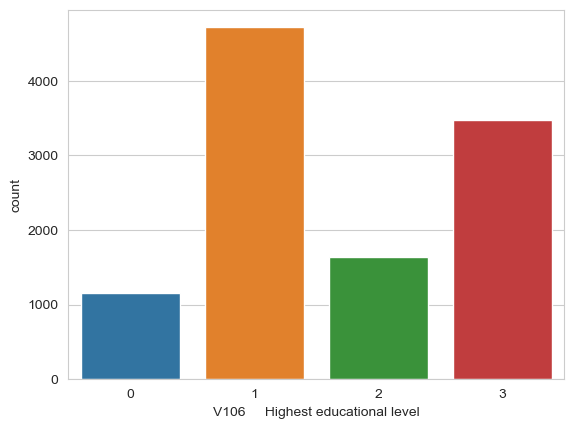

Feature Name:  V107     Highest year of education
Number of Unique Values:  13
Unique Values:  ['3.0' '6.0' '2.0' '1.0' '5.0' '4.0' nan
 'No years completed at level V106' 4.0 5.0 2.0 6.0 3.0 1.0]
Value Counts:  6.0                                 2168
6.0                                 1042
4.0                                  736
3.0                                  681
5.0                                  408
3.0                                  297
2.0                                  295
4.0                                  236
5.0                                  146
2.0                                  131
1.0                                   83
1.0                                   30
No years completed at level V106      18
Name: V107     Highest year of education, dtype: int64


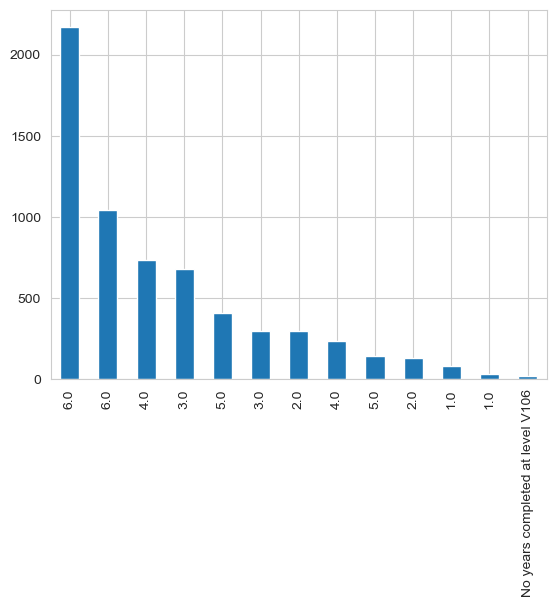

Error in feature:  V107     Highest year of education
Feature Name:  V113     Source of drinking water
Number of Unique Values:  17
Unique Values:  [ 8 16 14 12  4 10 11 15  2  0  9  6  5  1 13  7  3]
Value Counts:  14    3583
8     1639
16    1537
9      908
11     876
12     773
4      420
15     362
10     229
6      223
5      137
7       81
2       72
0       69
13      32
3       29
1       18
Name: V113     Source of drinking water, dtype: int64


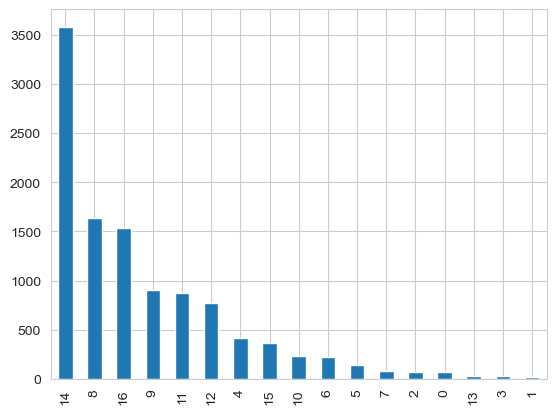

Data set description
DescribeResult(nobs=10988, minmax=(0, 16), mean=11.613123407353477, variance=12.930407536603225, skewness=-0.7564416997275797, kurtosis=-0.14423188831720424)
Central Tendency and Dispersion:  {'Mean': 11.613123407353477, 'Median': 13.0, 'Mode': 14, 'Variance': 12.929230761254061, 'Standard Deviation': 3.595723955096395, 'Kurtosis': -0.14423188831720424, 'Screw': -0.7564416997275797}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


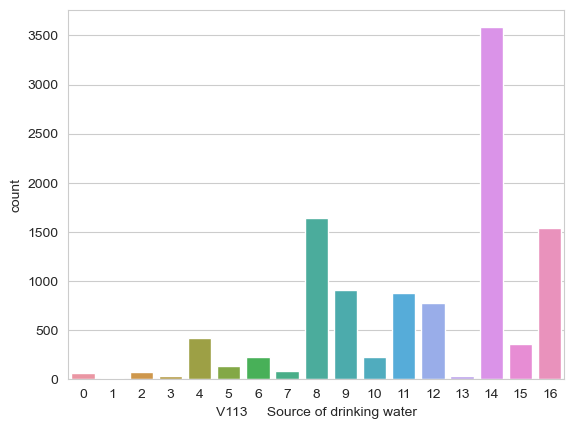

Feature Name:  V115     Time to get to water source
Number of Unique Values:  60
Unique Values:  [16 59 41 27 45  2  0 26 38  8 17 10 12 54 13 35  6 34 48 58 46 51 25 57
 22 19 55 28 18 43  3 53 56 47 36 15  7 40 42 39 50 24 32 49 23  9 29 14
 52  5 20  4 31 11  1 44 37 21 33 30]
Value Counts:  59    4382
2     1571
41    1453
17     703
10     670
27     578
46     139
26     124
35     105
25     101
57     100
0       96
16      88
48      83
56      78
34      74
58      72
51      67
45      53
32      48
7       46
38      43
6       29
1       26
47      22
55      20
54      19
15      17
42      17
28      15
23      14
4       13
13      11
9       11
18      10
8        9
14       9
3        8
49       7
43       7
40       5
12       5
19       5
44       4
53       4
52       4
37       3
22       3
20       2
5        2
24       2
50       2
30       2
39       1
29       1
31       1
11       1
36       1
21       1
33       1
Name: V115     Time to get to water source, 

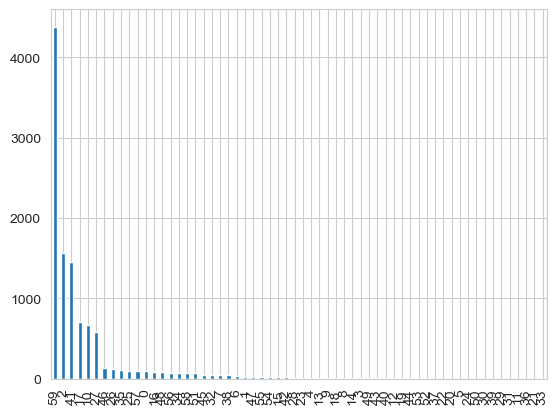

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 59), mean=37.38360029122679, variance=494.36790068012016, skewness=-0.45465317293272084, kurtosis=-1.3786321297233015)
Central Tendency and Dispersion:  {'Mean': 37.38360029122679, 'Median': 41.0, 'Mode': 59, 'Variance': 494.32290906192935, 'Standard Deviation': 22.233373766973138, 'Kurtosis': -1.3786321297233015, 'Screw': -0.45465317293272084}
Plotting the count plot


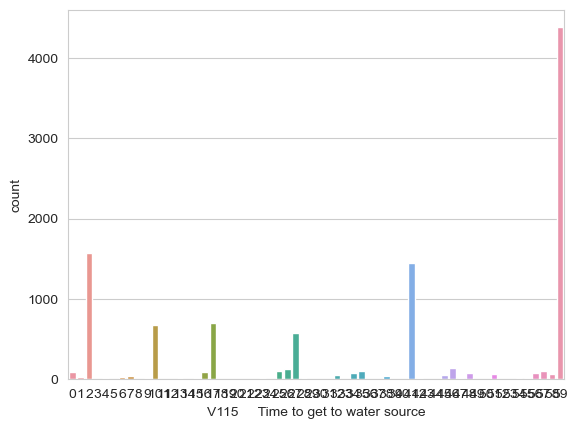

Feature Name:  V116     Type of toilet facility
Number of Unique Values:  14
Unique Values:  [ 4  2 11  3 12  8  6  9  1 13  5  0 10  7]
Value Counts:  8     2602
11    2385
4     1913
12    1851
3      811
2      725
13     407
7      103
9       72
0       35
5       31
1       30
10      17
6        6
Name: V116     Type of toilet facility, dtype: int64


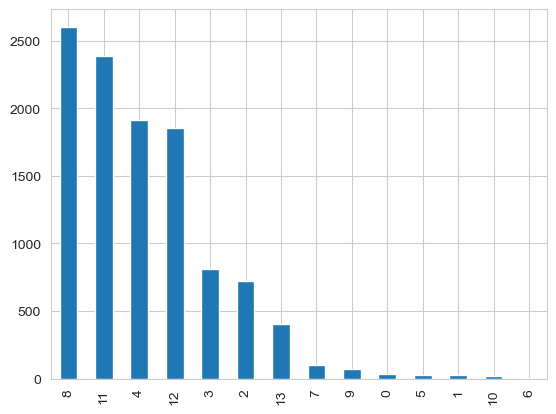

Data set description
DescribeResult(nobs=10988, minmax=(0, 13), mean=7.994994539497633, variance=12.969393346652625, skewness=-0.33815732730924486, kurtosis=-1.337267119020708)
Central Tendency and Dispersion:  {'Mean': 7.994994539497633, 'Median': 8.0, 'Mode': 8, 'Variance': 12.968213023268326, 'Standard Deviation': 3.6011405170123987, 'Kurtosis': -1.337267119020708, 'Screw': -0.33815732730924486}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


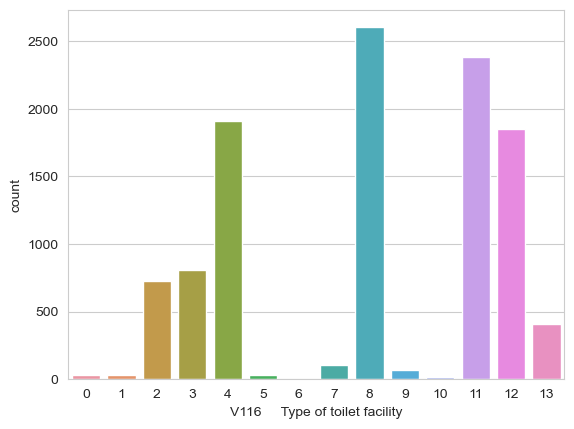

Feature Name:  V119     Household has: electricity
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  0    6491
2    4425
1      72
Name: V119     Household has: electricity, dtype: int64


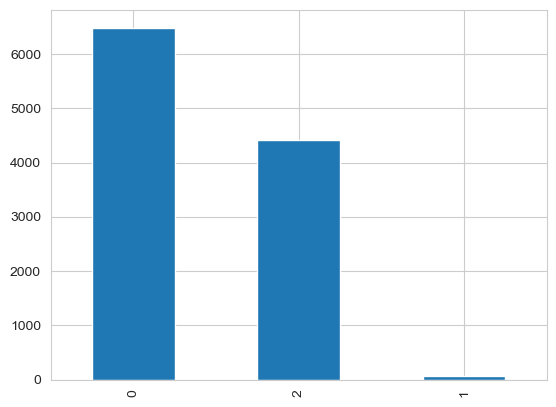

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.8119767018565708, variance=0.9581818390857993, skewness=0.3828686427202787, kurtosis=-1.8463217663648719)
Central Tendency and Dispersion:  {'Mean': 0.8119767018565708, 'Median': 0.0, 'Mode': 0, 'Variance': 0.958094636515806, 'Standard Deviation': 0.9788230874452267, 'Kurtosis': -1.8463217663648719, 'Screw': 0.3828686427202787}
Plotting the count plot


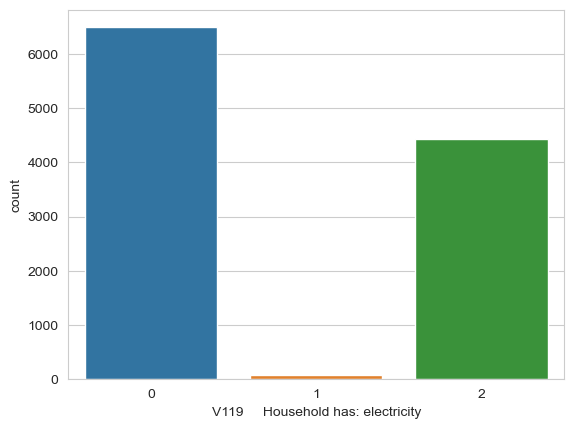

Feature Name:  V120     Household has: radio
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    6545
2    4371
1      72
Name: V120     Household has: radio, dtype: int64


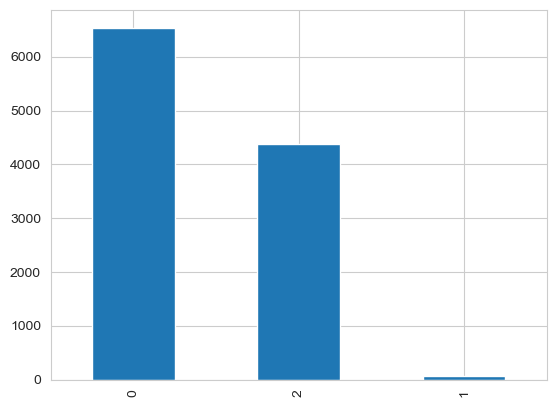

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.802147797597379, variance=0.9543887605330574, skewness=0.40367737409771676, kurtosis=-1.8298984688582767)
Central Tendency and Dispersion:  {'Mean': 0.802147797597379, 'Median': 0.0, 'Mode': 0, 'Variance': 0.954301903164971, 'Standard Deviation': 0.9768837715741678, 'Kurtosis': -1.8298984688582767, 'Screw': 0.40367737409771676}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


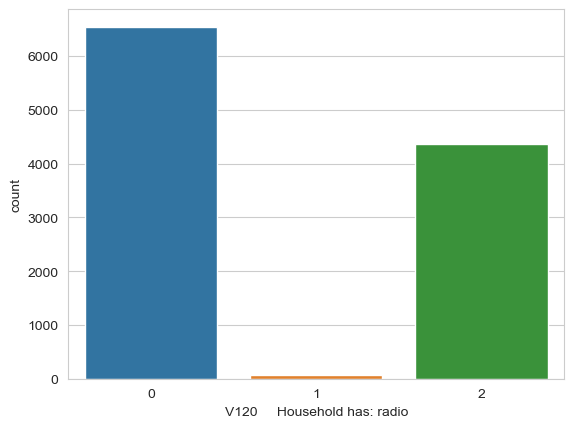

Feature Name:  V121     Household has: television
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    6893
2    4023
1      72
Name: V121     Household has: television, dtype: int64


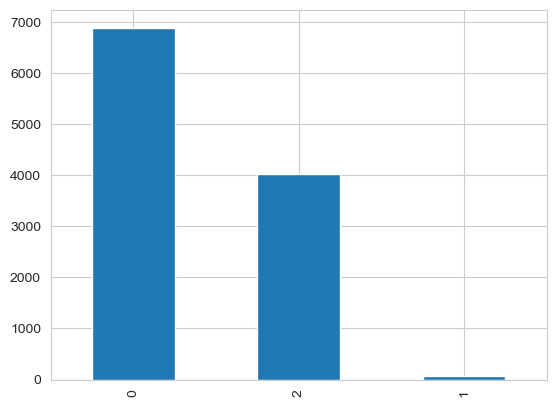

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.7388059701492538, variance=0.9253092868233693, skewness=0.5411640532411538, kurtosis=-1.6995407837359082)
Central Tendency and Dispersion:  {'Mean': 0.7388059701492538, 'Median': 0.0, 'Mode': 0, 'Variance': 0.9252250759308662, 'Standard Deviation': 0.9618862073711558, 'Kurtosis': -1.6995407837359082, 'Screw': 0.5411640532411538}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


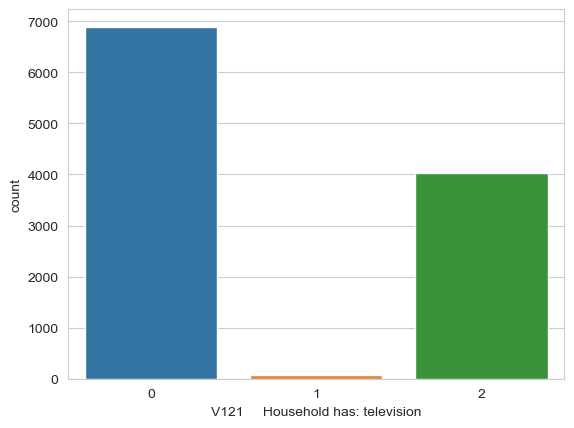

Feature Name:  V122     Household has: refrigerator
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    8734
2    2182
1      72
Name: V122     Household has: refrigerator, dtype: int64


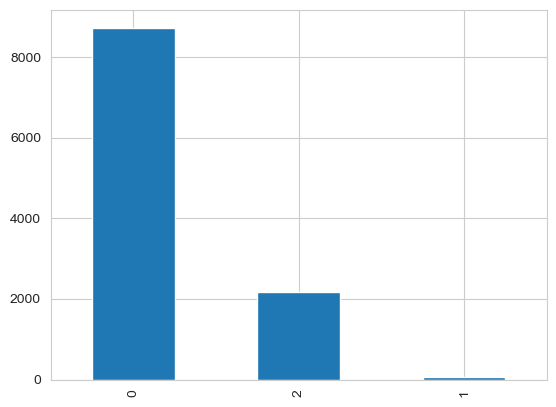

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.40371314160902805, variance=0.63794743822903, skewness=1.4855121019931858, kurtosis=0.22268547250053627)
Central Tendency and Dispersion:  {'Mean': 0.40371314160902805, 'Median': 0.0, 'Mode': 0, 'Variance': 0.6378893796707638, 'Standard Deviation': 0.7986797729195123, 'Kurtosis': 0.22268547250053627, 'Screw': 1.4855121019931858}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


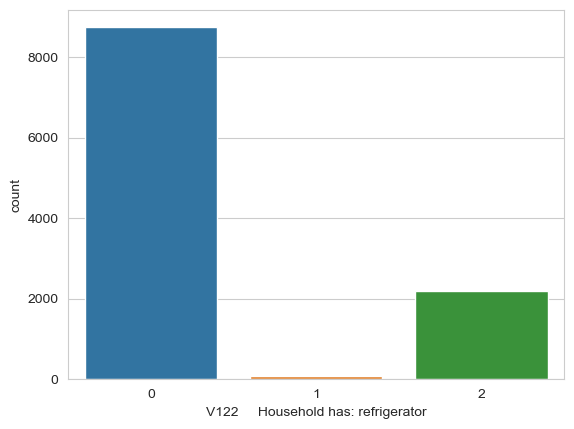

Feature Name:  V123     Household has: bicycle
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    9312
2    1604
1      72
Name: V123     Household has: bicycle, dtype: int64


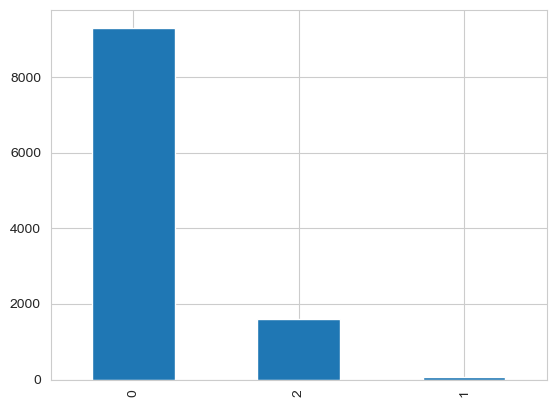

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.29850746268656714, variance=0.5014012489658742, skewness=1.9684878107099253, kurtosis=1.9006746415667983)
Central Tendency and Dispersion:  {'Mean': 0.29850746268656714, 'Median': 0.0, 'Mode': 0, 'Variance': 0.5013556172541008, 'Standard Deviation': 0.7080646984944955, 'Kurtosis': 1.9006746415667983, 'Screw': 1.9684878107099253}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


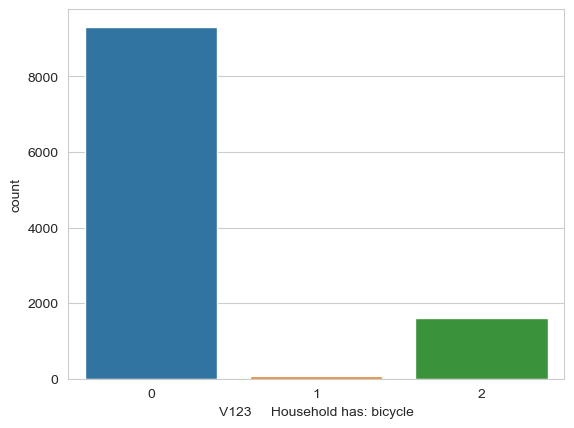

Feature Name:  V124     Household has: motorcyclescooter
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    7083
2    3833
1      72
Name: V124     Household has: motorcyclescooter, dtype: int64


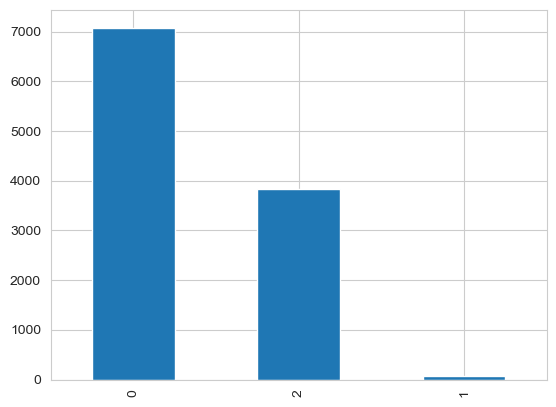

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.7042227884965416, variance=0.9060456960602313, skewness=0.6192499787666337, kurtosis=-1.6086033396551256)
Central Tendency and Dispersion:  {'Mean': 0.7042227884965416, 'Median': 0.0, 'Mode': 0, 'Variance': 0.9059632383157773, 'Standard Deviation': 0.9518210117011376, 'Kurtosis': -1.6086033396551256, 'Screw': 0.6192499787666337}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


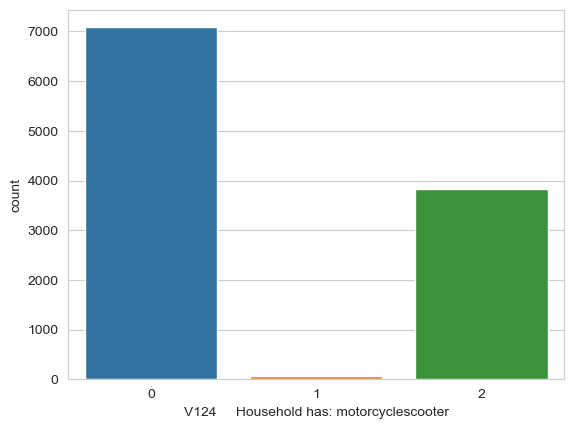

Feature Name:  V125     Household has: cartruck
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    9858
2    1058
1      72
Name: V125     Household has: cartruck, dtype: int64


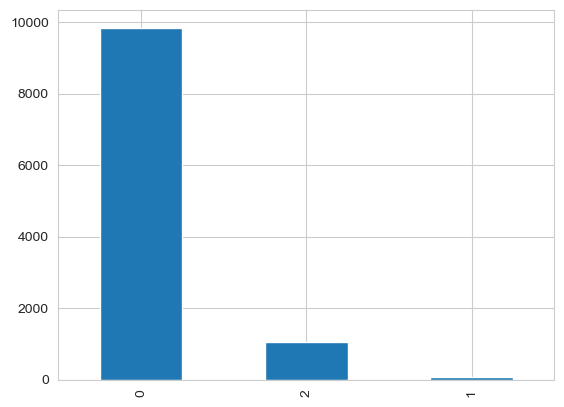

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.19912631962140517, variance=0.3520807875369405, skewness=2.674434588447906, kurtosis=5.204492631394668)
Central Tendency and Dispersion:  {'Mean': 0.19912631962140517, 'Median': 0.0, 'Mode': 0, 'Variance': 0.35204874523738305, 'Standard Deviation': 0.5933369575859766, 'Kurtosis': 5.204492631394668, 'Screw': 2.674434588447906}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


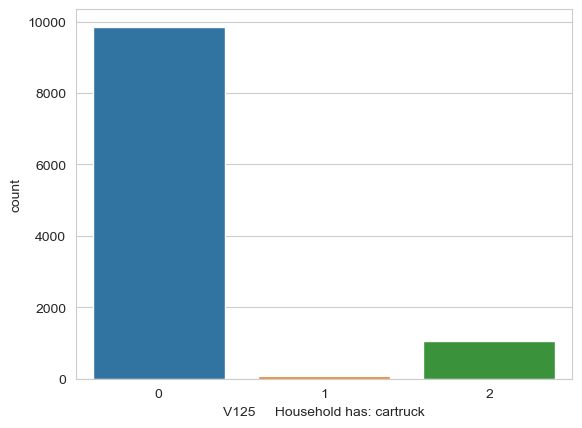

Feature Name:  V127     Main floor material
Number of Unique Values:  11
Unique Values:  [ 1  4  2  9  8  5  0  6  7  3 10]
Value Counts:  4     4667
1     4635
2     1193
0      243
5       72
10      59
8       40
7       35
3       16
6       15
9       13
Name: V127     Main floor material, dtype: int64


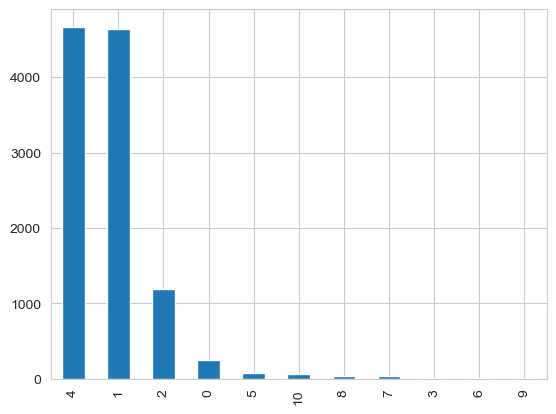

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 10), mean=2.498998907899527, variance=2.6550458713012564, skewness=0.7642519002377475, kurtosis=1.167025133520184)
Central Tendency and Dispersion:  {'Mean': 2.498998907899527, 'Median': 2.0, 'Mode': 4, 'Variance': 2.6548042398968783, 'Standard Deviation': 1.6293570019786574, 'Kurtosis': 1.167025133520184, 'Screw': 0.7642519002377475}
Plotting the count plot


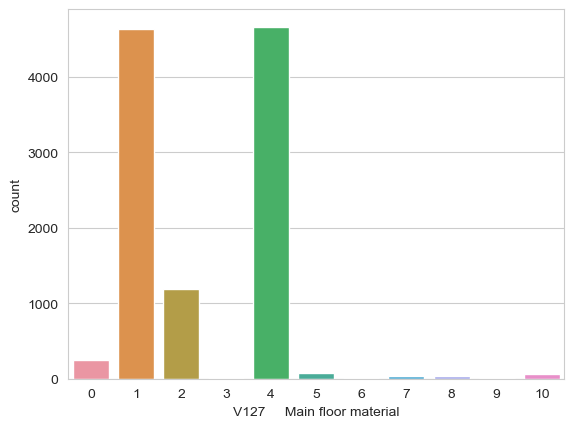

Feature Name:  V128     Main wall material
Number of Unique Values:  17
Unique Values:  [ 1  4 14  0 15  9  5 11 16 13  6  8 10  7  2 12  3]
Value Counts:  4     4295
14    2543
5     1725
0      689
7      338
8      318
2      296
1      200
10     165
13     142
9       72
15      64
16      51
11      35
6       26
12      23
3        6
Name: V128     Main wall material, dtype: int64


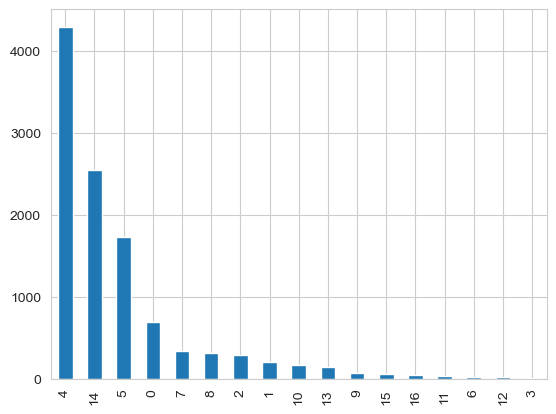

Data set description
DescribeResult(nobs=10988, minmax=(0, 16), mean=6.72224244630506, variance=21.330871388561306, skewness=0.6764406126162982, kurtosis=-0.9784451698578338)
Central Tendency and Dispersion:  {'Mean': 6.72224244630506, 'Median': 5.0, 'Mode': 4, 'Variance': 21.328930100666458, 'Standard Deviation': 4.618325464999891, 'Kurtosis': -0.9784451698578338, 'Screw': 0.6764406126162982}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


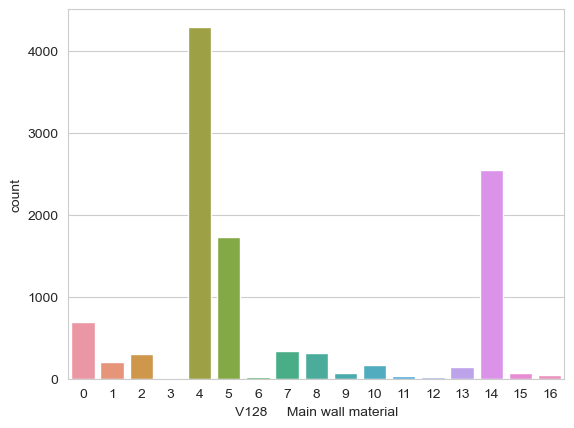

Feature Name:  V129     Main roof material
Number of Unique Values:  16
Unique Values:  [13  6  3  1  5  4  8 10  9  2 15  0 14 12 11  7]
Value Counts:  6     8694
13     588
5      462
10     407
0      156
3       99
12      95
9       94
15      90
11      83
8       72
14      53
4       35
7       24
1       23
2       13
Name: V129     Main roof material, dtype: int64


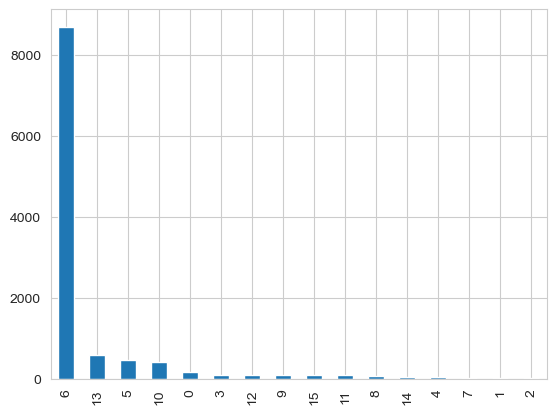

Data set description
DescribeResult(nobs=10988, minmax=(0, 15), mean=6.589825263924281, variance=5.163224034268383, skewness=1.6374301976381036, kurtosis=4.23370988981944)
Central Tendency and Dispersion:  {'Mean': 6.589825263924281, 'Median': 6.0, 'Mode': 6, 'Variance': 5.162754137650776, 'Standard Deviation': 2.272169478197165, 'Kurtosis': 4.23370988981944, 'Screw': 1.6374301976381036}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


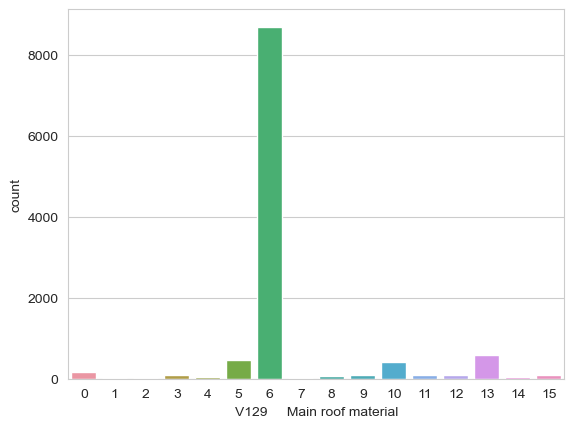

Feature Name:  V190     Wealth index combined
Number of Unique Values:  5
Unique Values:  [3 0 1 4 2]
Value Counts:  0    2265
2    2237
1    2212
3    2187
4    2087
Name: V190     Wealth index combined, dtype: int64


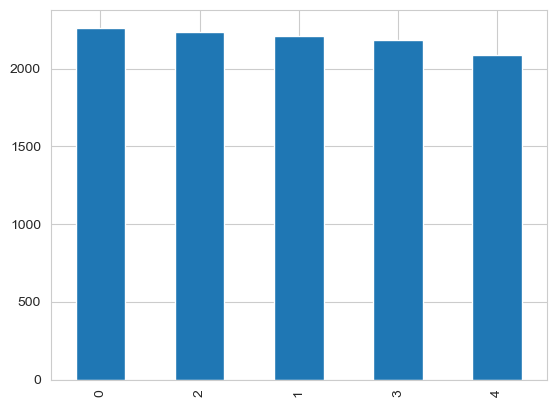

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.9653258099745177, variance=1.983597809556775, skewness=0.02666742193556239, kurtosis=-1.288368408057435)
Central Tendency and Dispersion:  {'Mean': 1.9653258099745177, 'Median': 2.0, 'Mode': 0, 'Variance': 1.9834172855478964, 'Standard Deviation': 1.4083384840115307, 'Kurtosis': -1.288368408057435, 'Screw': 0.02666742193556239}
Plotting the count plot


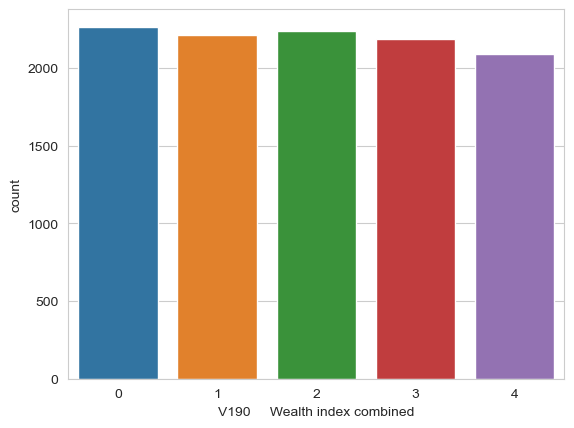

Feature Name:  V190A    Wealth index for urbanrural
Number of Unique Values:  5
Unique Values:  [1 0 2 4 3]
Value Counts:  3    2328
0    2232
1    2228
2    2173
4    2027
Name: V190A    Wealth index for urbanrural, dtype: int64


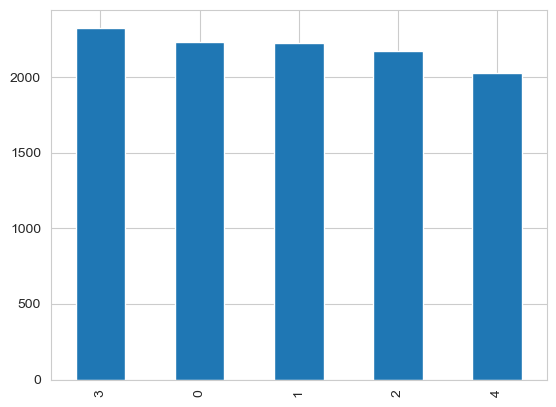

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.9717874044412087, variance=1.9644356143967214, skewness=0.009487992036361631, kurtosis=-1.2868448312342498)
Central Tendency and Dispersion:  {'Mean': 1.9717874044412087, 'Median': 2.0, 'Mode': 3, 'Variance': 1.9642568343080429, 'Standard Deviation': 1.4015194733959435, 'Kurtosis': -1.2868448312342498, 'Screw': 0.009487992036361631}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


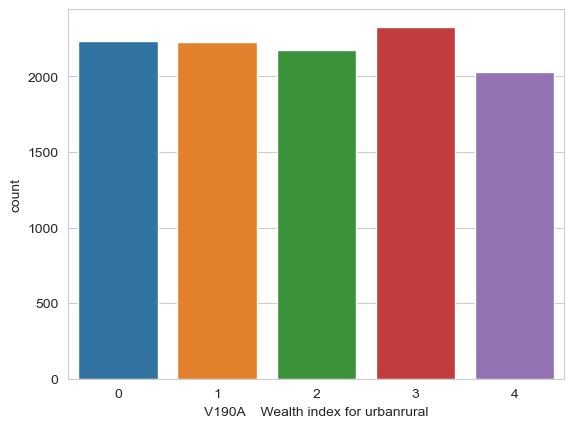

Feature Name:  V191     Wealth index factor score combined (5 decimals)
Number of Unique Values:  6350
Unique Values:  [  13446.   30325.  -29099. ... -104719.  -76330. -131377.]
Value Counts:  -96734.0     12
 65481.0     11
-92615.0     10
 129223.0     8
-64222.0      8
             ..
-137955.0     1
-119805.0     1
-108693.0     1
-109932.0     1
-131377.0     1
Name: V191     Wealth index factor score combined (5 decimals), Length: 6350, dtype: int64


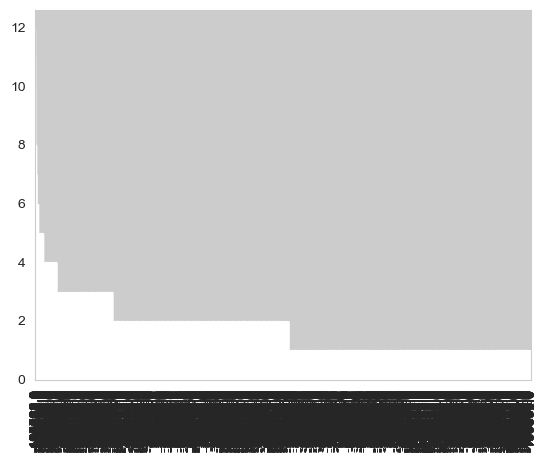

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(-194845.0, 207282.0), mean=-23340.289042591918, variance=9173682143.829618, skewness=0.5323416656094283, kurtosis=-0.8677055168509491)
Central Tendency and Dispersion:  {'Mean': -23340.289042591918, 'Median': -48056.5, 'Mode': -96734.0, 'Variance': 9172847261.945396, 'Standard Deviation': 95774.98244293964, 'Kurtosis': -0.8677055168509491, 'Screw': 0.5323416656094283}
Plotting the count plot


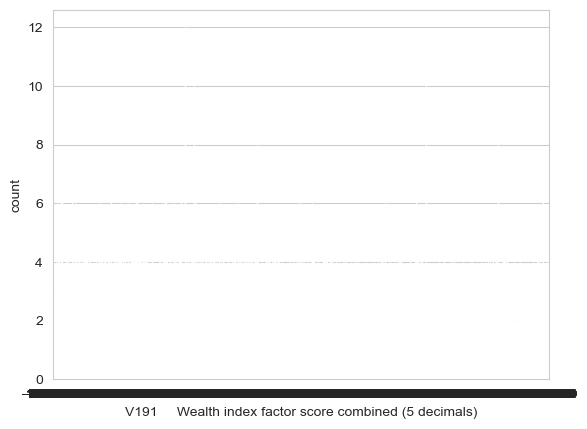

Feature Name:  V191A    Wealth index factor score for urbanrural (5 decimals)
Number of Unique Values:  6369
Unique Values:  [ -42343.  -24343.  -87713. ...  -84877.  -53639. -114211.]
Value Counts:   13149.0     11
-71559.0     10
-84484.0      9
-76091.0      8
-40315.0      8
             ..
-140052.0     1
-77004.0      1
-132963.0     1
-102471.0     1
-114211.0     1
Name: V191A    Wealth index factor score for urbanrural (5 decimals), Length: 6369, dtype: int64


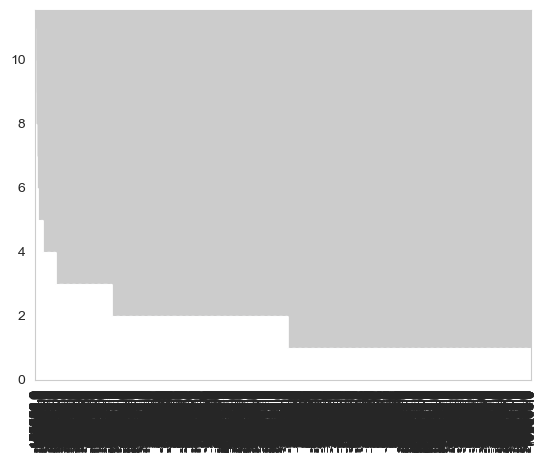

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(-254841.0, 256831.0), mean=-21590.19548598471, variance=8951031104.932566, skewness=0.4643973155688746, kurtosis=-0.36865911626344205)
Central Tendency and Dispersion:  {'Mean': -21590.19548598471, 'Median': -40654.0, 'Mode': 13149.0, 'Variance': 8950216486.15709, 'Standard Deviation': 94605.58380009655, 'Kurtosis': -0.36865911626344205, 'Screw': 0.4643973155688746}
Plotting the count plot


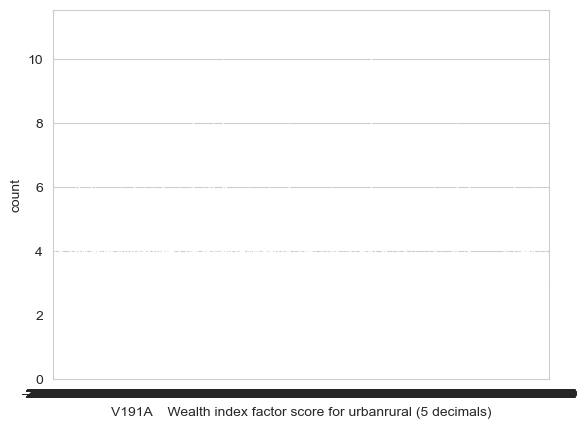

Feature Name:  V202     Sons at home
Number of Unique Values:  12
Unique Values:  [ 1.  0.  2.  4.  3.  5. 11.  6.  7.  8.  9. 12.]
Value Counts:  1.0     3614
2.0     2887
0.0     1867
3.0     1566
4.0      693
5.0      237
6.0       87
7.0       26
8.0        8
11.0       1
9.0        1
12.0       1
Name: V202     Sons at home, dtype: int64


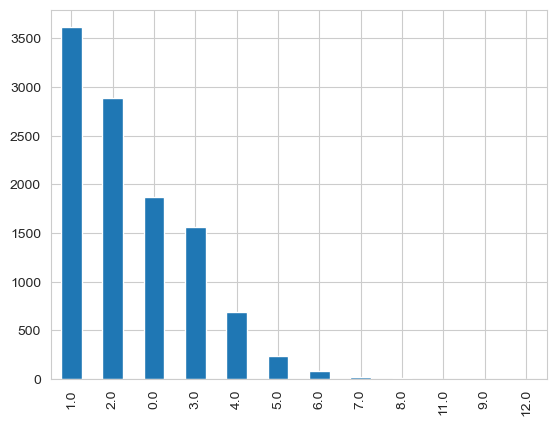

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 12.0), mean=1.714870768110666, variance=1.7493119246828723, skewness=0.9548721596994604, kurtosis=1.5042240295873723)
Central Tendency and Dispersion:  {'Mean': 1.714870768110666, 'Median': 2.0, 'Mode': 1.0, 'Variance': 1.7491527226511392, 'Standard Deviation': 1.3225553760244366, 'Kurtosis': 1.5042240295873723, 'Screw': 0.9548721596994604}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


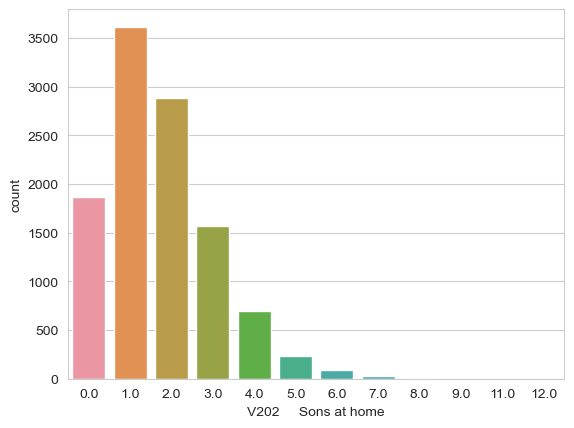

Feature Name:  V203     Daughters at home
Number of Unique Values:  10
Unique Values:  [ 1.  2.  0.  4.  3.  5.  6.  7.  8. 11.]
Value Counts:  1.0     3696
2.0     2720
0.0     2053
3.0     1549
4.0      641
5.0      240
6.0       70
7.0       12
8.0        6
11.0       1
Name: V203     Daughters at home, dtype: int64


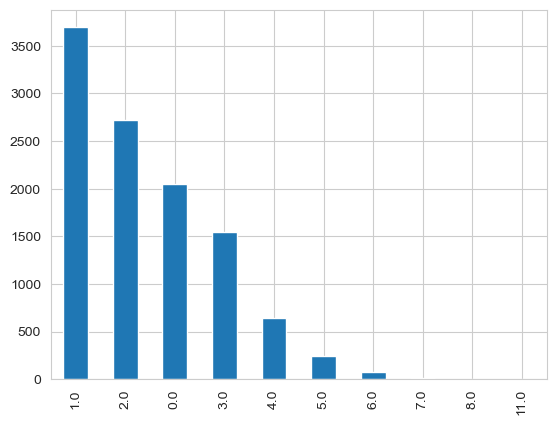

Data set description
DescribeResult(nobs=10988, minmax=(0.0, 11.0), mean=1.64816163087004, variance=1.6872479170786912, skewness=0.8757844888029318, kurtosis=0.9420101388247502)
Central Tendency and Dispersion:  {'Mean': 1.64816163087004, 'Median': 1.0, 'Mode': 1.0, 'Variance': 1.6870943633912976, 'Standard Deviation': 1.298881966689544, 'Kurtosis': 0.9420101388247502, 'Screw': 0.8757844888029318}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


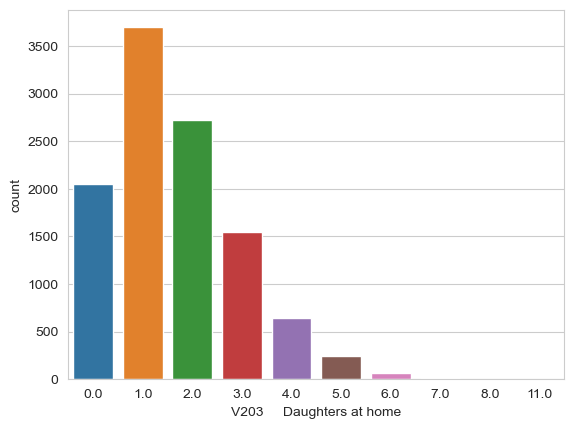

Feature Name:  V205     Daughters elsewhere
Number of Unique Values:  7
Unique Values:  [0. 1. 3. 2. 4. 5. 6.]
Value Counts:  0.0    9723
1.0     843
2.0     289
3.0      95
4.0      28
5.0       9
6.0       1
Name: V205     Daughters elsewhere, dtype: int64


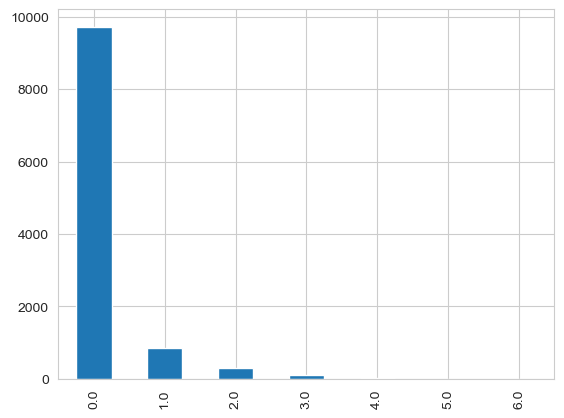

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 6.0), mean=0.1700946487076811, variance=0.29535752266909476, skewness=4.050416174214186, kurtosis=19.766158970381742)
Central Tendency and Dispersion:  {'Mean': 0.1700946487076811, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.29533064266157116, 'Standard Deviation': 0.5434433205602689, 'Kurtosis': 19.766158970381742, 'Screw': 4.050416174214186}
Plotting the count plot


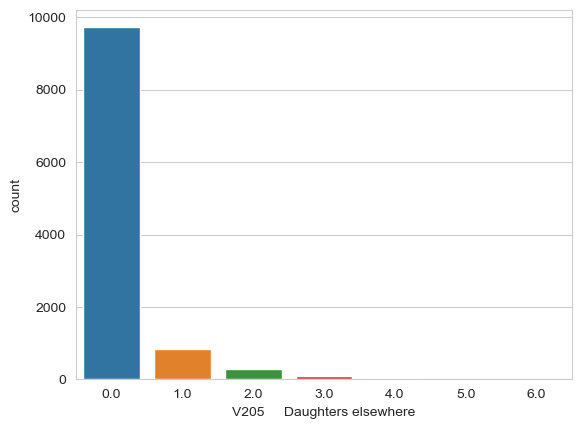

Feature Name:  V206     Sons who have died
Number of Unique Values:  9
Unique Values:  [0. 3. 1. 2. 4. 5. 6. 8. 7.]
Value Counts:  0.0    9141
1.0    1264
2.0     406
3.0     124
4.0      35
5.0       7
6.0       5
8.0       5
7.0       1
Name: V206     Sons who have died, dtype: int64


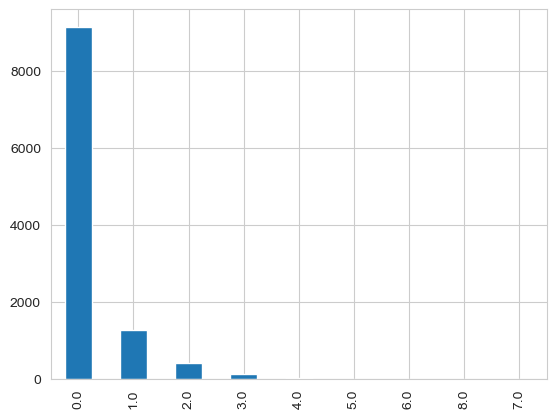

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 8.0), mean=0.24572260647979613, variance=0.4209109822976746, skewness=3.7950968378465055, kurtosis=21.45272575463949)
Central Tendency and Dispersion:  {'Mean': 0.24572260647979613, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.4208726758740945, 'Standard Deviation': 0.648747004520325, 'Kurtosis': 21.45272575463949, 'Screw': 3.7950968378465055}
Plotting the count plot


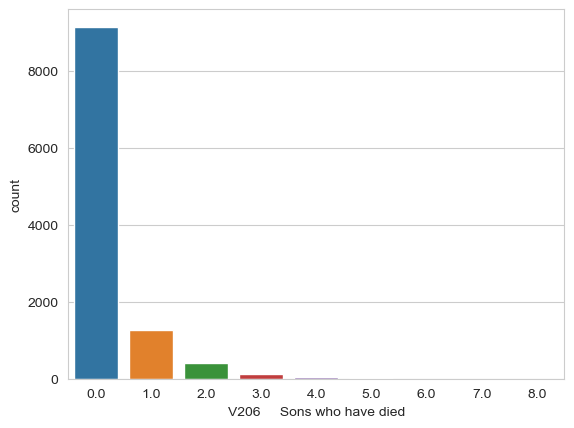

Feature Name:  V207     Daughters who have died
Number of Unique Values:  7
Unique Values:  [0. 2. 1. 3. 4. 5. 6.]
Value Counts:  0.0    9443
1.0    1107
2.0     304
3.0      98
4.0      34
5.0       1
6.0       1
Name: V207     Daughters who have died, dtype: int64


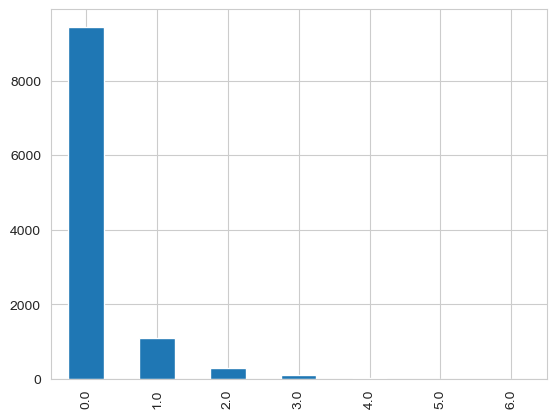

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 6.0), mean=0.19621405169275574, variance=0.3082700013243305, skewness=3.5232894205767993, kurtosis=14.754176222577232)
Central Tendency and Dispersion:  {'Mean': 0.19621405169275574, 'Median': 0.0, 'Mode': 0.0, 'Variance': 0.30824194617313605, 'Standard Deviation': 0.5551954126009473, 'Kurtosis': 14.754176222577232, 'Screw': 3.5232894205767993}
Plotting the count plot


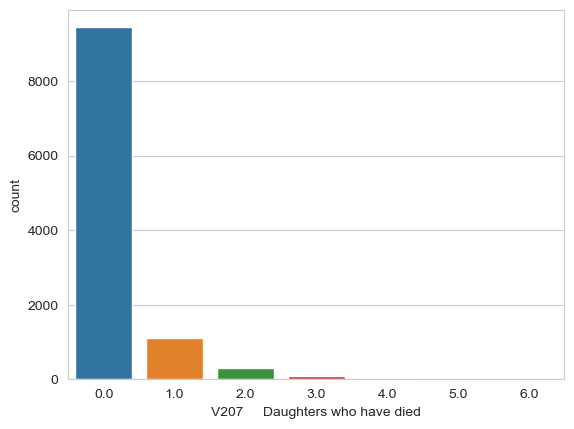

Feature Name:  V222     Last birth to interview (months)
Number of Unique Values:  60
Unique Values:  [44. 18.  5. 43. 19. 28. 49. 23.  2.  6. 10. 16.  4. 13. 40. 11.  8. 50.
 20. 39. 41. 36.  7. 54.  9. 42. 24. 48. 34. 15. 12. 37. 25. 27. 21. 17.
 46. 51. 22. 55. 38. 59. 31.  0. 32. 45. 14.  1. 35. 26. 33. 29. 53.  3.
 52. 30. 56. 47. 58. 57.]
Value Counts:  7.0     363
13.0    359
18.0    345
12.0    340
9.0     333
6.0     324
3.0     323
16.0    320
4.0     304
0.0     302
8.0     298
19.0    293
2.0     292
17.0    291
1.0     280
24.0    267
15.0    261
14.0    259
10.0    256
26.0    254
21.0    242
25.0    239
29.0    230
31.0    226
27.0    225
20.0    224
5.0     213
28.0    205
32.0    195
30.0    190
11.0    187
22.0    161
40.0    155
23.0    145
36.0    131
33.0    130
37.0    117
39.0    115
41.0    111
42.0    106
38.0    103
43.0    102
34.0    102
44.0     94
53.0     89
55.0     78
35.0     78
48.0     78
52.0     75
45.0     69
54.0     60
51.0     58
59.0     55
49

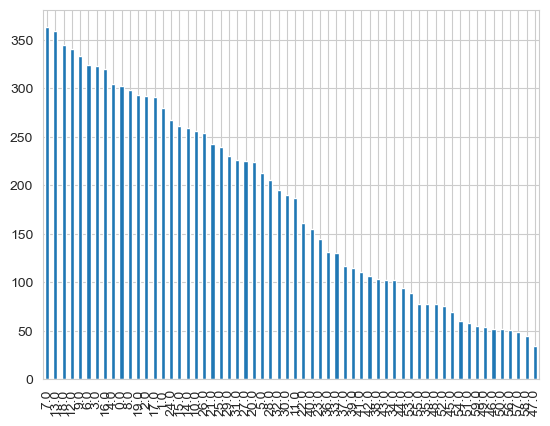

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 59.0), mean=20.738896978522025, variance=217.07963005655594, skewness=0.6526926295693563, kurtosis=-0.36148573602763534)
Central Tendency and Dispersion:  {'Mean': 20.738896978522025, 'Median': 18.0, 'Mode': 7.0, 'Variance': 217.0598739926629, 'Standard Deviation': 14.732951978224285, 'Kurtosis': -0.36148573602763534, 'Screw': 0.6526926295693563}
Plotting the count plot


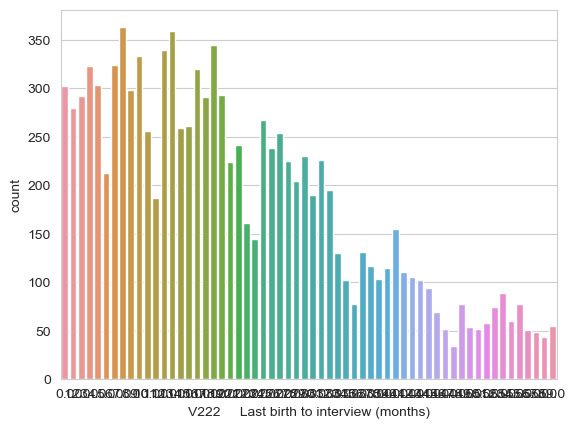

In [213]:
for cols in data_cluster[1].columns:
    feature_uni_varaite_analysis(cols, data_cluster[1])

## 2.1.3. Univariate Analysis of maternal child Variables

Feature Name:  M13      Timing of 1st antenatal check (months)
Number of Unique Values:  11
Unique Values:  [10  3  0  5  2  4  1  7  8  6  9]
Value Counts:  10    6781
3     1020
2      930
4      791
5      487
1      368
6      277
0      163
7       78
9       74
8       19
Name: M13      Timing of 1st antenatal check (months), dtype: int64


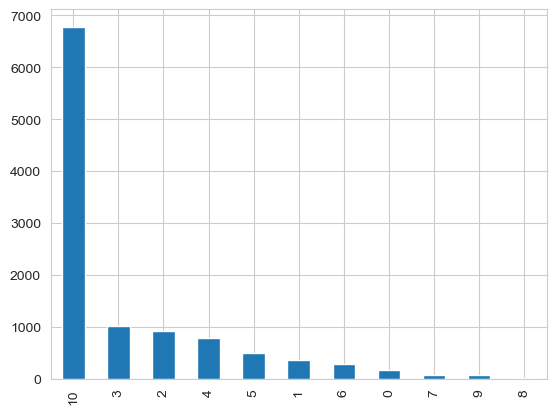

Data set description
DescribeResult(nobs=10988, minmax=(0, 10), mean=7.437477247906807, variance=11.776649391946117, skewness=-0.7420895572640733, kurtosis=-1.1879823609117972)
Central Tendency and Dispersion:  {'Mean': 7.437477247906807, 'Median': 10.0, 'Mode': 10, 'Variance': 11.775577618248269, 'Standard Deviation': 3.431556151113991, 'Kurtosis': -1.1879823609117972, 'Screw': -0.7420895572640733}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


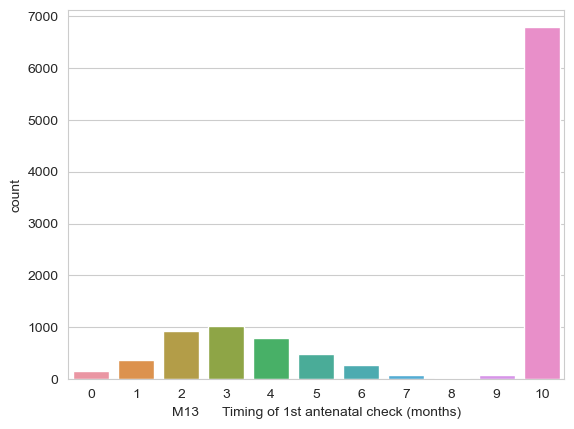

Feature Name:  M57A     Antenatal care: respondent's home
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4097
1     110
Name: M57A     Antenatal care: respondent's home, dtype: int64


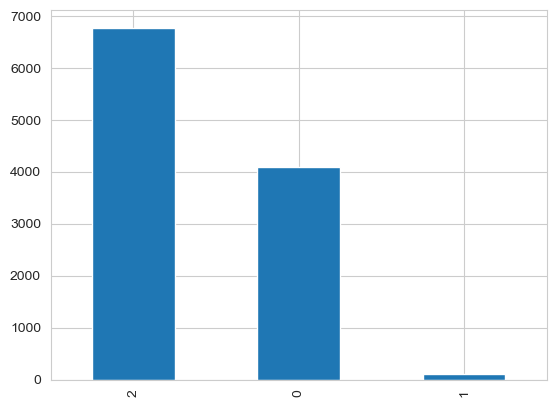

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2442664725154715, variance=0.9304076442858357, skewness=-0.5037719946829851, kurtosis=-1.7347703741406078)
Central Tendency and Dispersion:  {'Mean': 1.2442664725154715, 'Median': 2.0, 'Mode': 2, 'Variance': 0.930322969400116, 'Standard Deviation': 0.9645325133970943, 'Kurtosis': -1.7347703741406078, 'Screw': -0.5037719946829851}
Plotting the count plot


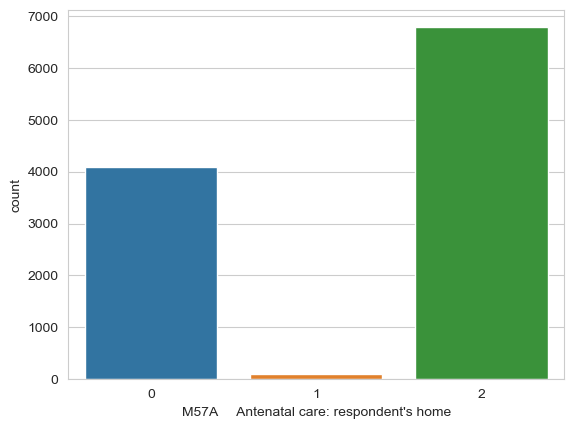

Feature Name:  M57B     Antenatal care: other home
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4160
1      47
Name: M57B     Antenatal care: other home, dtype: int64


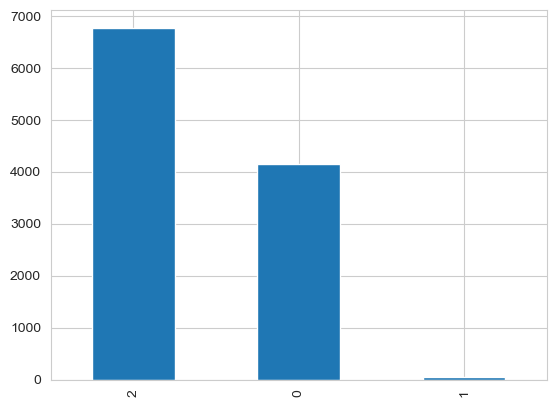

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2385329450309428, variance=0.9389100892940657, skewness=-0.49124217945803567, kurtosis=-1.7538501378568265)
Central Tendency and Dispersion:  {'Mean': 1.2385329450309428, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9388246406146613, 'Standard Deviation': 0.96892963656535, 'Kurtosis': -1.7538501378568265, 'Screw': -0.49124217945803567}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


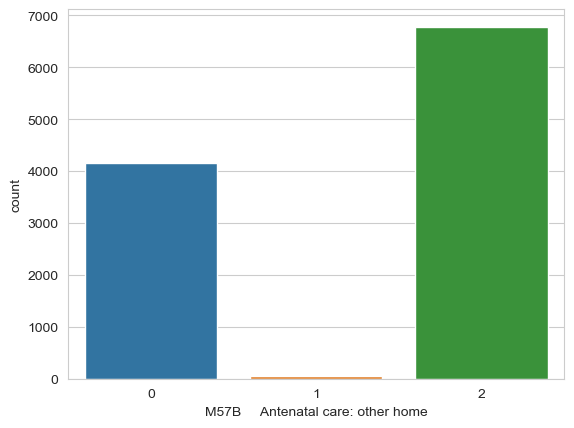

Feature Name:  M57D     NA - Antenatal care: CS home
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M57D     NA - Antenatal care: CS home, dtype: int64)
Error in feature:  M57D     NA - Antenatal care: CS home
Feature Name:  M57E     Antenatal care: government hospital
Number of Unique Values:  3
Unique Values:  [2 1 0]
Value Counts:  2    6781
0    2693
1    1514
Name: M57E     Antenatal care: government hospital, dtype: int64


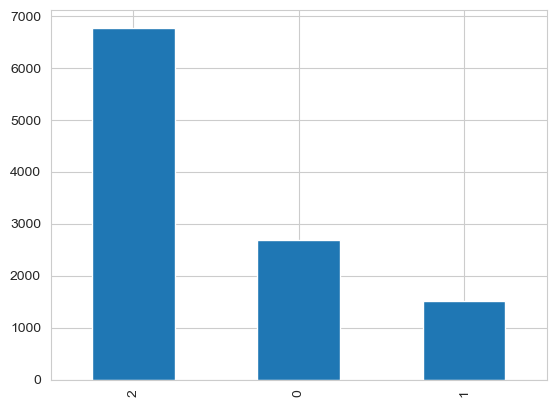

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.3720422278849653, variance=0.7238637819610688, skewness=-0.7913603167268001, kurtosis=-1.153908174477083)
Central Tendency and Dispersion:  {'Mean': 1.3720422278849653, 'Median': 2.0, 'Mode': 2, 'Variance': 0.7237979042961651, 'Standard Deviation': 0.8507631305458442, 'Kurtosis': -1.153908174477083, 'Screw': -0.7913603167268001}
Plotting the count plot


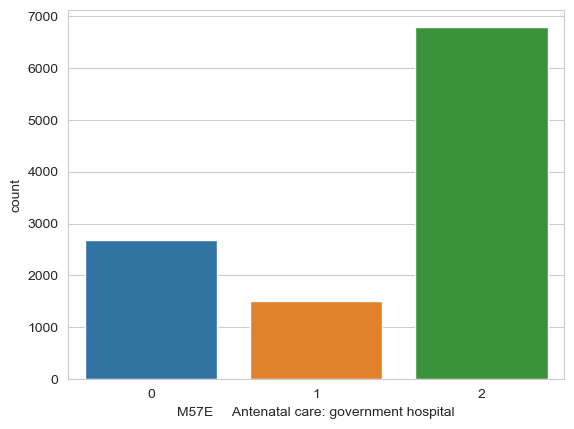

Feature Name:  M57F     Antenatal care: government health center
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    2739
1    1468
Name: M57F     Antenatal care: government health center, dtype: int64


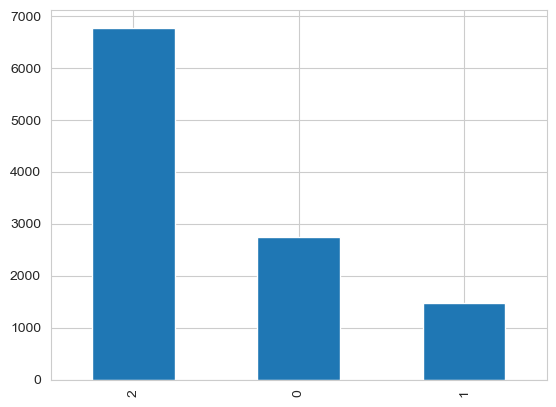

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.3678558427375318, variance=0.731148328356685, skewness=-0.7818275264609673, kurtosis=-1.1783591669958025)
Central Tendency and Dispersion:  {'Mean': 1.3678558427375318, 'Median': 2.0, 'Mode': 2, 'Variance': 0.7310817877370674, 'Standard Deviation': 0.8550332085580463, 'Kurtosis': -1.1783591669958025, 'Screw': -0.7818275264609673}
Plotting the count plot


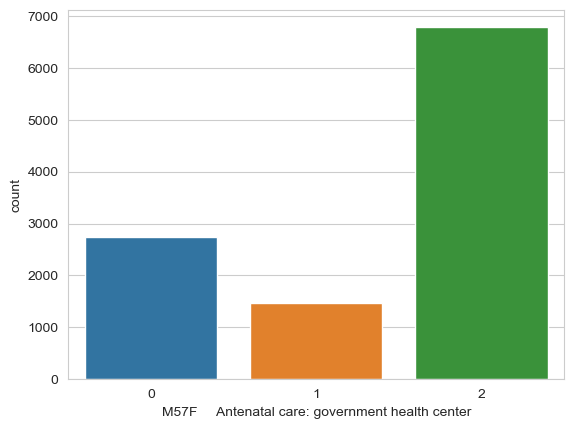

Feature Name:  M57G     Antenatal care: government health post
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    3798
1     409
Name: M57G     Antenatal care: government health post, dtype: int64


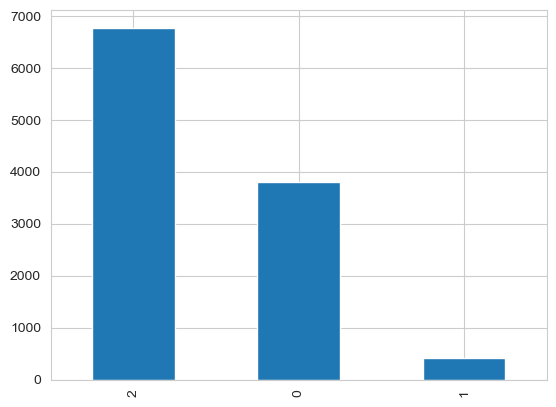

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2714779759737895, variance=0.8891582049394907, skewness=-0.5637767676495955, kurtosis=-1.636964177941274)
Central Tendency and Dispersion:  {'Mean': 1.2714779759737895, 'Median': 2.0, 'Mode': 2, 'Variance': 0.8890772840981237, 'Standard Deviation': 0.9429089479361853, 'Kurtosis': -1.636964177941274, 'Screw': -0.5637767676495955}
Plotting the count plot


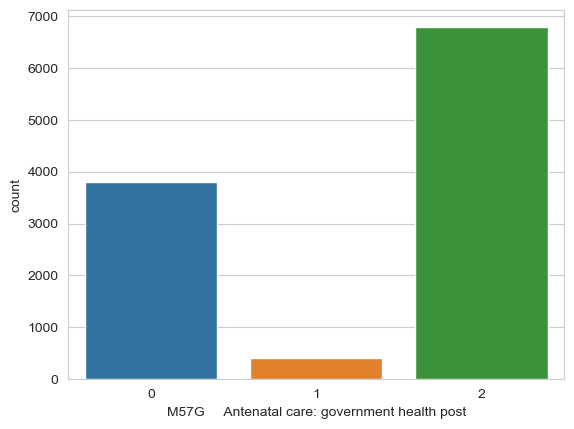

Feature Name:  M57H     Antenatal care: other public sector
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4202
1       5
Name: M57H     Antenatal care: other public sector, dtype: int64


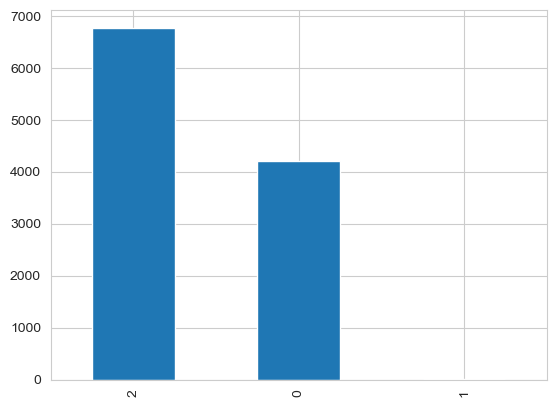

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2347105933745905, variance=0.9445418567112887, skewness=-0.482911125829524, kurtosis=-1.7662869518549797)
Central Tendency and Dispersion:  {'Mean': 1.2347105933745905, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9444558954938959, 'Standard Deviation': 0.97183120730603, 'Kurtosis': -1.7662869518549797, 'Screw': -0.482911125829524}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


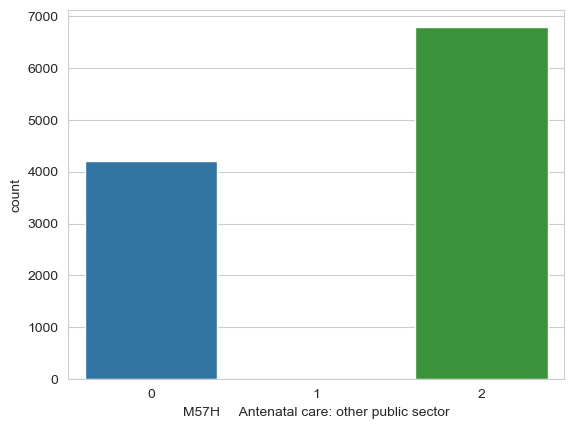

Feature Name:  M57J     NA - Antenatal care: CS public health
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M57J     NA - Antenatal care: CS public health, dtype: int64)
Error in feature:  M57J     NA - Antenatal care: CS public health
Feature Name:  M57L     NA - Antenatal care: CS public health
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M57L     NA - Antenatal care: CS public health, dtype: int64)
Error in feature:  M57L     NA - Antenatal care: CS public health
Feature Name:  M57M     Antenatal care: private hospital
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    3644
1     563
Name: M57M     Antenatal care: private hospital, dtype: int64


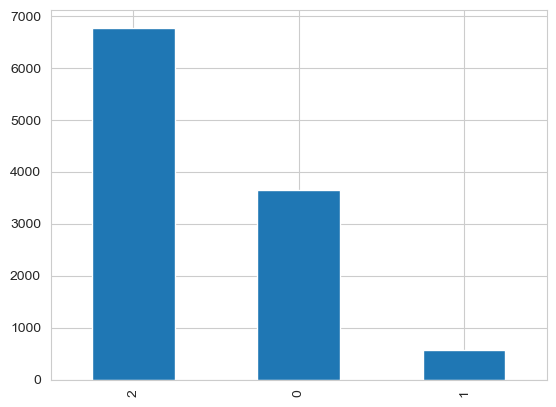

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.285493265380415, variance=0.8673348162830289, skewness=-0.5950176045877222, kurtosis=-1.5816493400603404)
Central Tendency and Dispersion:  {'Mean': 1.285493265380415, 'Median': 2.0, 'Mode': 2, 'Variance': 0.8672558815527519, 'Standard Deviation': 0.931265741640243, 'Kurtosis': -1.5816493400603404, 'Screw': -0.5950176045877222}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


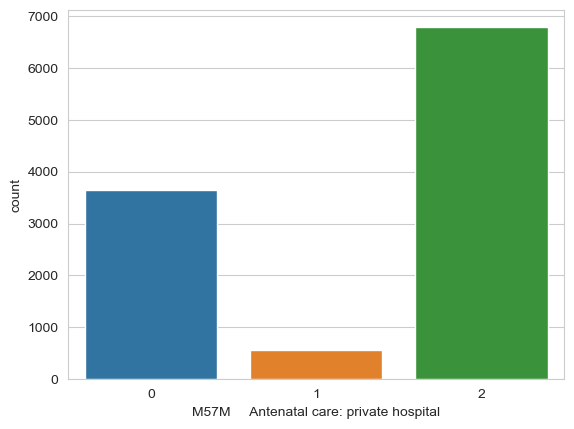

Feature Name:  M57N     Antenatal care: private clinic
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    3992
1     215
Name: M57N     Antenatal care: private clinic, dtype: int64


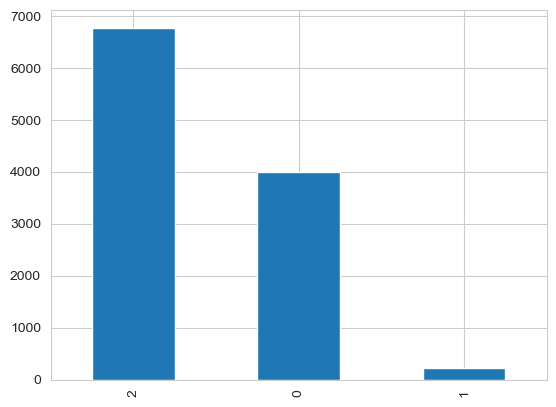

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2538223516563525, variance=0.9160907855857319, skewness=-0.5247433486303505, kurtosis=-1.7018131617294763)
Central Tendency and Dispersion:  {'Mean': 1.2538223516563525, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9160074136540257, 'Standard Deviation': 0.9570827621757826, 'Kurtosis': -1.7018131617294763, 'Screw': -0.5247433486303505}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


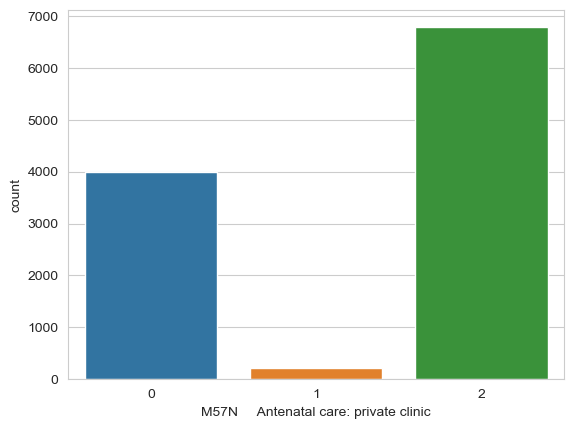

Feature Name:  M57NA    Antenatal care: NGO hospital
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4191
1      16
Name: M57NA    Antenatal care: NGO hospital, dtype: int64


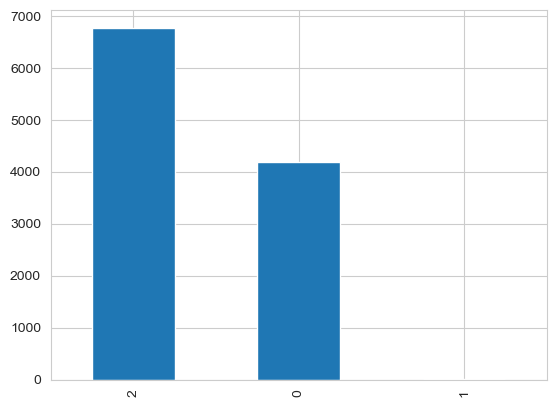

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2357116854750636, variance=0.943069694604495, skewness=-0.4850913542416913, kurtosis=-1.763051359662831)
Central Tendency and Dispersion:  {'Mean': 1.2357116854750636, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9429838673661799, 'Standard Deviation': 0.971073564343186, 'Kurtosis': -1.763051359662831, 'Screw': -0.4850913542416913}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


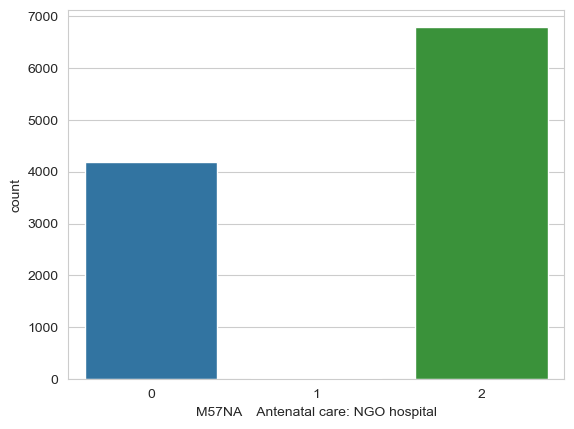

Feature Name:  M57NB    Antenatal care: NGO clinic
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4184
1      23
Name: M57NB    Antenatal care: NGO clinic, dtype: int64


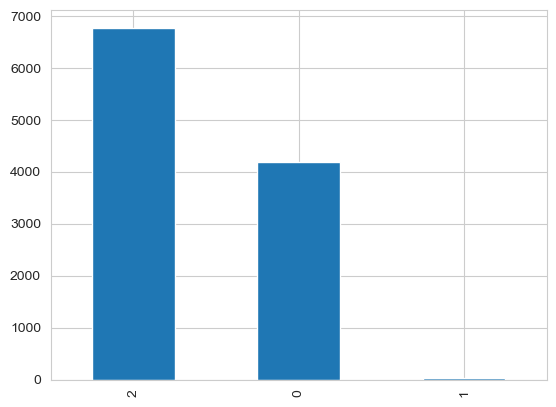

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2363487440844558, variance=0.942131820479901, skewness=-0.4864794057523335, kurtosis=-1.760984360099293)
Central Tendency and Dispersion:  {'Mean': 1.2363487440844558, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9420460785959839, 'Standard Deviation': 0.9705905823754853, 'Kurtosis': -1.760984360099293, 'Screw': -0.4864794057523335}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


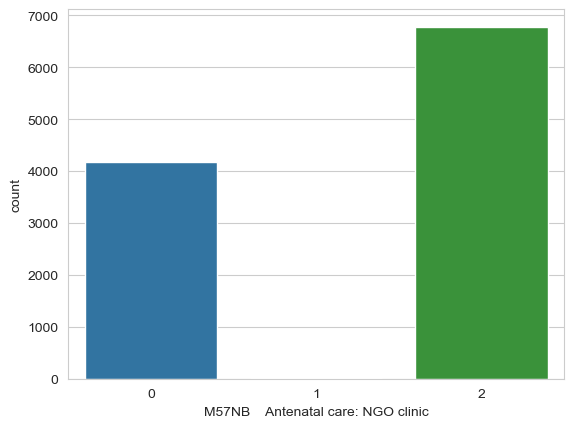

Feature Name:  M57NC    Antenatal care: other NGO medical sector
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  1    6781
0    4207
Name: M57NC    Antenatal care: other NGO medical sector, dtype: int64


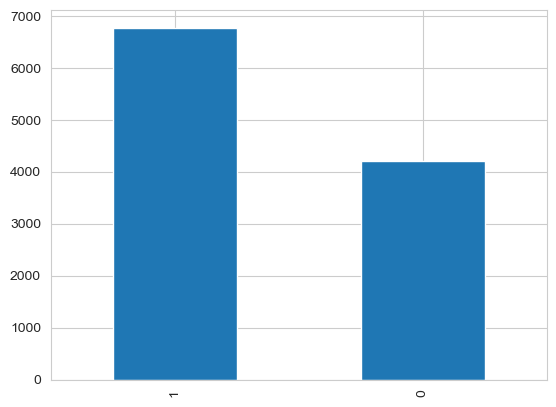

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.6171277757553695, variance=0.23630258966076637, skewness=-0.48192051509061345, kurtosis=-1.7677526171347975)
Central Tendency and Dispersion:  {'Mean': 0.6171277757553695, 'Median': 1.0, 'Mode': 1, 'Variance': 0.2362810841465999, 'Standard Deviation': 0.48608752724853976, 'Kurtosis': -1.7677526171347975, 'Screw': -0.48192051509061345}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


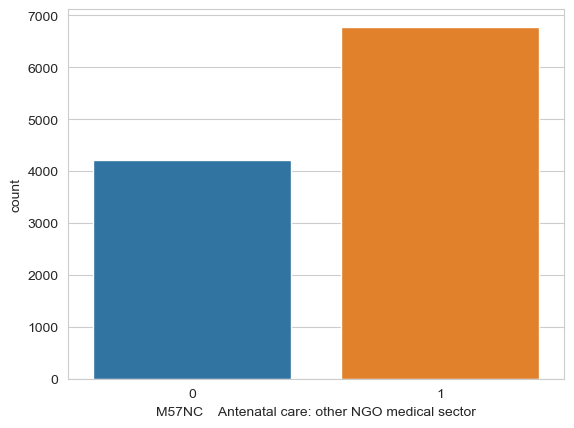

Feature Name:  M57NE    NA - Antenatal care: NGO medical
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M57NE    NA - Antenatal care: NGO medical, dtype: int64)
Error in feature:  M57NE    NA - Antenatal care: NGO medical
Feature Name:  M57O     Antenatal care: other private medical sector
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    6781
0    4202
1       5
Name: M57O     Antenatal care: other private medical sector, dtype: int64


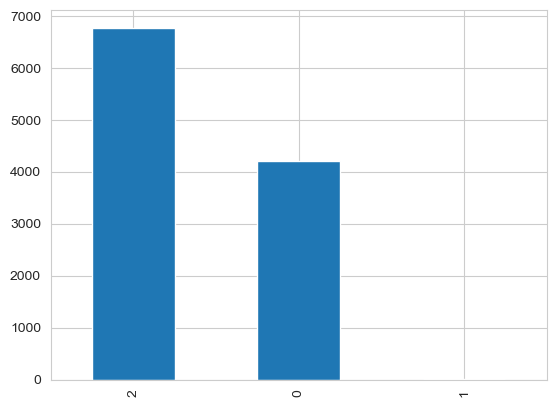

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2347105933745905, variance=0.9445418567112887, skewness=-0.482911125829524, kurtosis=-1.7662869518549797)
Central Tendency and Dispersion:  {'Mean': 1.2347105933745905, 'Median': 2.0, 'Mode': 2, 'Variance': 0.9444558954938959, 'Standard Deviation': 0.97183120730603, 'Kurtosis': -1.7662869518549797, 'Screw': -0.482911125829524}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


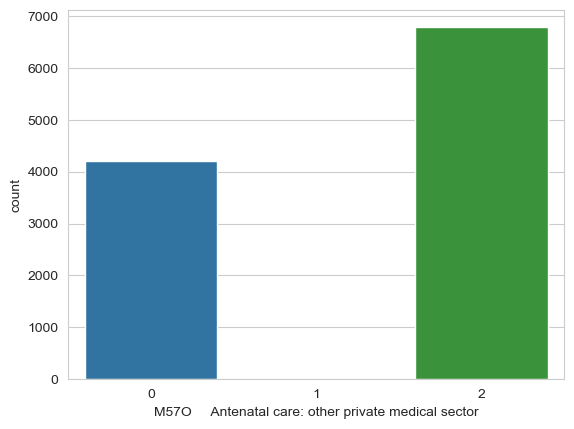

Feature Name:  M57Q     NA - Antenatal care: CS private medical
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M57Q     NA - Antenatal care: CS private medical, dtype: int64)
Error in feature:  M57Q     NA - Antenatal care: CS private medical
Feature Name:  V224     Entries in birth history
Number of Unique Values:  5
Unique Values:  [1. 2. 3. 4. 5.]
Value Counts:  2.0    5352
1.0    3559
3.0    1869
4.0     200
5.0       8
Name: V224     Entries in birth history, dtype: int64


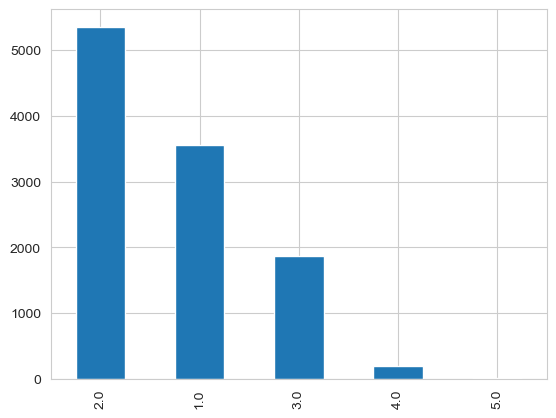

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 5.0), mean=1.8847834000728068, variance=0.5601288599701624, skewness=0.49286852593791974, kurtosis=-0.14806099824660368)
Central Tendency and Dispersion:  {'Mean': 1.8847834000728068, 'Median': 2.0, 'Mode': 2.0, 'Variance': 0.5600778835540747, 'Standard Deviation': 0.7483835136840433, 'Kurtosis': -0.14806099824660368, 'Screw': 0.49286852593791974}
Plotting the count plot


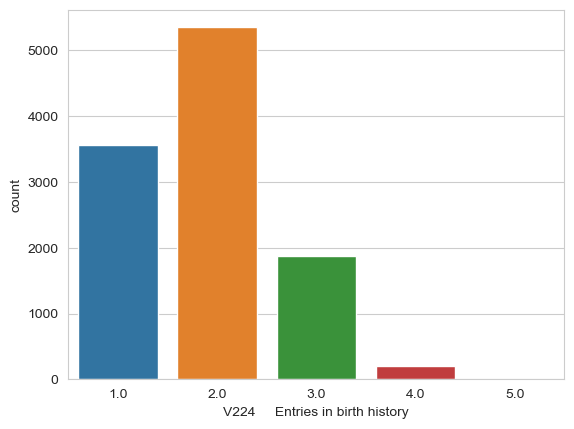

Feature Name:  V417     Entries in pregnancy and postnatal care roster
Number of Unique Values:  2
Unique Values:  [0. 1.]
Value Counts:  1.0    9056
0.0    1932
Name: V417     Entries in pregnancy and postnatal care roster, dtype: int64


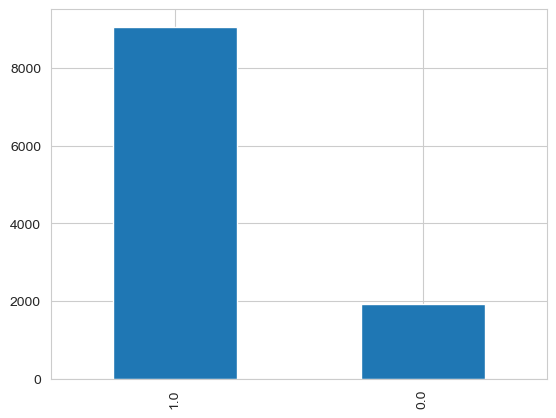

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0.0, 1.0), mean=0.8241718238077903, variance=0.1449258181120097, skewness=-1.7031470350586062, kurtosis=0.9007098230289214)
Central Tendency and Dispersion:  {'Mean': 0.8241718238077903, 'Median': 1.0, 'Mode': 1.0, 'Variance': 0.1449126286491309, 'Standard Deviation': 0.38067391380173515, 'Kurtosis': 0.9007098230289214, 'Screw': -1.7031470350586062}
Plotting the count plot


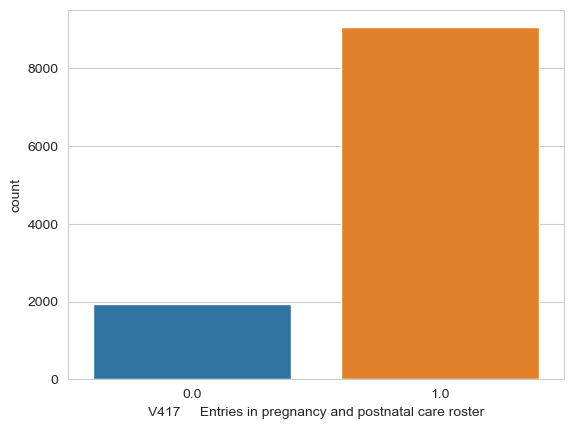

Feature Name:  V418A    Entries in child health roster
Number of Unique Values:  5
Unique Values:  [1. 2. 3. 4. 5.]
Value Counts:  2.0    5338
1.0    4018
3.0    1527
4.0     100
5.0       5
Name: V418A    Entries in child health roster, dtype: int64


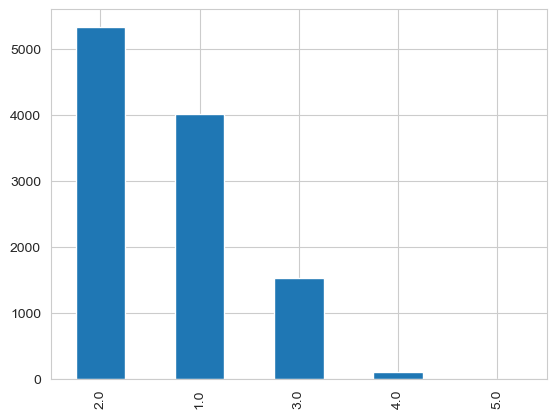

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(1.0, 5.0), mean=1.792864943574809, variance=0.502280933064191, skewness=0.5039508844987804, kurtosis=-0.2066423360280627)
Central Tendency and Dispersion:  {'Mean': 1.792864943574809, 'Median': 2.0, 'Mode': 2.0, 'Variance': 0.5022352212937992, 'Standard Deviation': 0.7086855588297247, 'Kurtosis': -0.2066423360280627, 'Screw': 0.5039508844987804}
Plotting the count plot


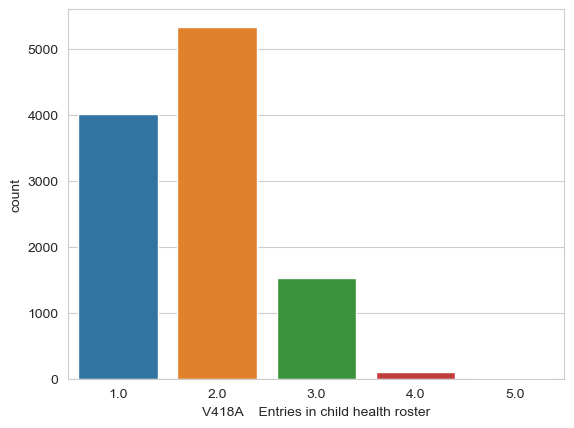

In [214]:
for cols in data_cluster[2].columns:
    feature_uni_varaite_analysis(cols, data_cluster[2])

## 2.1.4. Univariate Analysis of Health reated  Variables

Feature Name:  H22      Had fever in last two weeks
Number of Unique Values:  4
Unique Values:  [1 2 0 3]
Value Counts:  1    6863
2    3732
3     343
0      50
Name: H22      Had fever in last two weeks, dtype: int64


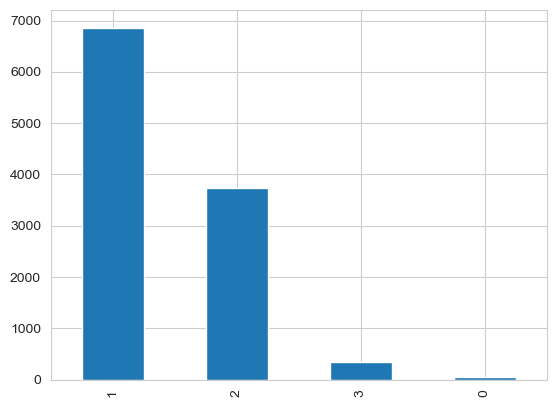

Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=1.397524572260648, variance=0.3110596767421034, skewness=0.8709236780673009, kurtosis=-0.06897404448615907)
Central Tendency and Dispersion:  {'Mean': 1.397524572260648, 'Median': 1.0, 'Mode': 1, 'Variance': 0.3110313677070886, 'Standard Deviation': 0.5577018627430687, 'Kurtosis': -0.06897404448615907, 'Screw': 0.8709236780673009}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


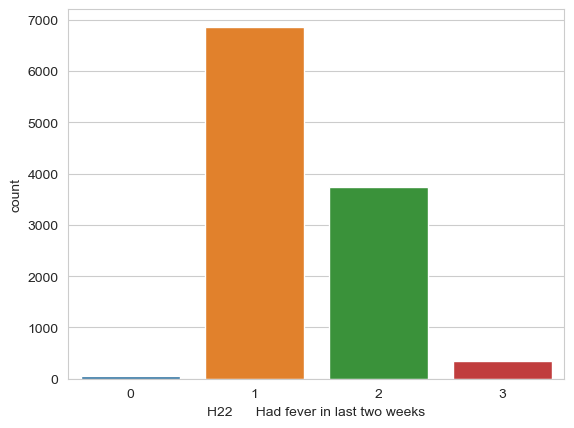

Feature Name:  HW53     Hemoglobin level (gdl - 1 decimal)
Number of Unique Values:  122
Unique Values:  [108   2 121   4  95  13  10  19 116 107 111  12  27   8 117 110   0  11
 100   5  14   9   7   6 115   1  32  92  89  98 101 114 105  18  17  21
  15 113   3 102 109  23 120  20  81 118  22  25  37  82  88 104 112  93
  16 106  34  97  29  99  28  87  31  24  76  30  91 103  96  94  26  90
  85  68  65  86  36  46  35  38  33  78  39  79  83 119  41  48  64  77
  69  42  84  70  73  40  75  66  47  51  80  74  57  43  60  71  56  52
  63  45  49  67  44  54  72  61  58  50  62  53  59  55]
Value Counts:  121    1556
2       261
116     245
7       243
8       243
       ... 
52        1
56        1
47        1
60        1
55        1
Name: HW53     Hemoglobin level (gdl - 1 decimal), Length: 122, dtype: int64


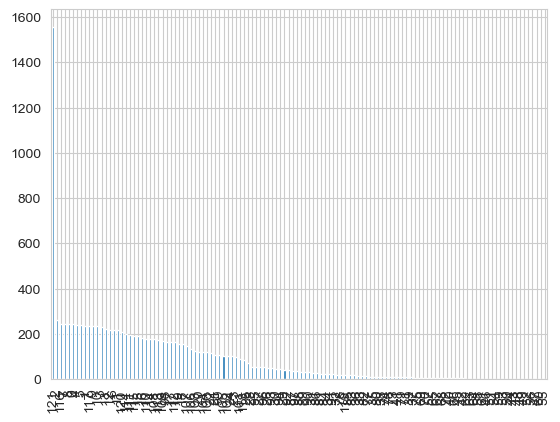

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 121), mean=62.66927557335275, variance=2507.2030715785536, skewness=-0.03510862088038045, kurtosis=-1.8726211970092204)
Central Tendency and Dispersion:  {'Mean': 62.66927557335275, 'Median': 83.0, 'Mode': 121, 'Variance': 2506.974895106804, 'Standard Deviation': 50.06970036965274, 'Kurtosis': -1.8726211970092204, 'Screw': -0.03510862088038045}
Plotting the count plot


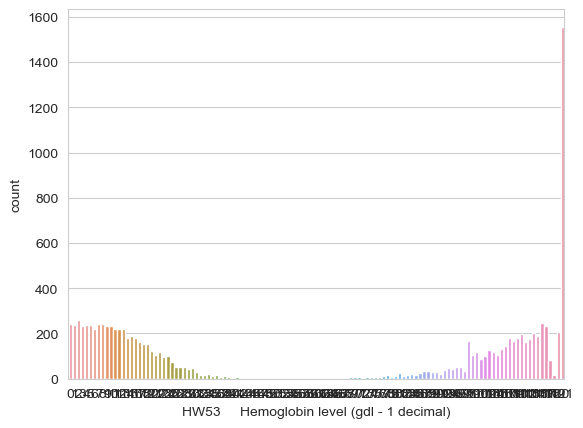

Feature Name:  HW55     Result of measurement - hemoglobin
Number of Unique Values:  7
Unique Values:  [1 6 2 5 3 0 4]
Value Counts:  1    9124
6     985
0     343
2     228
5     207
3      95
4       6
Name: HW55     Result of measurement - hemoglobin, dtype: int64


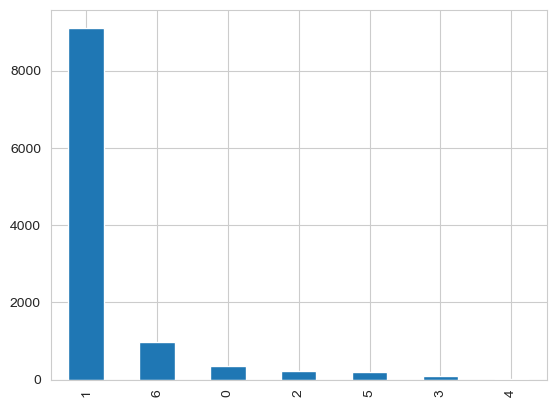

Data set description
DescribeResult(nobs=10988, minmax=(0, 6), mean=1.5320349472151438, variance=2.351117111002118, skewness=2.3807747170045097, kurtosis=4.011091557289578)
Central Tendency and Dispersion:  {'Mean': 1.5320349472151438, 'Median': 1.0, 'Mode': 1, 'Variance': 2.350903139659653, 'Standard Deviation': 1.533265515055906, 'Kurtosis': 4.011091557289578, 'Screw': 2.3807747170045097}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


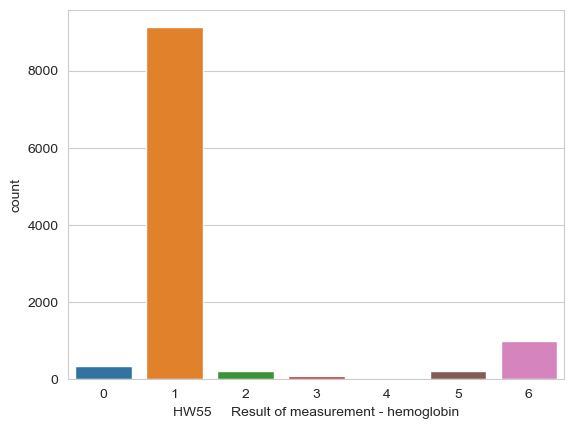

Feature Name:  HW56     Hemoglobin level adjusted for altitude (gdl - 1 decimal)
Number of Unique Values:  117
Unique Values:  [ 90. 102.  nan 104.  77. 113. 110. 119.  98.  89.  93. 112. 127. 108.
  99.  92. 100. 111.  82. 105. 114. 109. 107. 106.  97. 101. 132.  74.
  71.  80.  83.  96.  87. 118. 117. 121. 115.  95. 103.  84.  91. 123.
 120.  63. 122. 125. 137.  64.  70.  86.  94.  75. 116.  88. 134.  79.
 129.  81. 128.  69. 131. 124.  58. 130.  73.  85.  78.  76. 126.  72.
  67.  50.  47.  68. 136. 147. 135. 138. 133.  60. 139.  61.  65. 153.
  46. 141.  59.  51. 140.  66.  52.  55.  57.  48. 150. 161.  62.  56.
  35. 142.  49.  39.  53.  34.  20.  44. 146. 155. 145.  30.  54.  40.
  37. 158.  42.  24.  38.  31.]
Value Counts:  102.0    257
107.0    246
98.0     245
100.0    244
104.0    243
        ... 
158.0      1
161.0      1
24.0       1
38.0       1
31.0       1
Name: HW56     Hemoglobin level adjusted for altitude (gdl - 1 decimal), Length: 117, dtype: int64


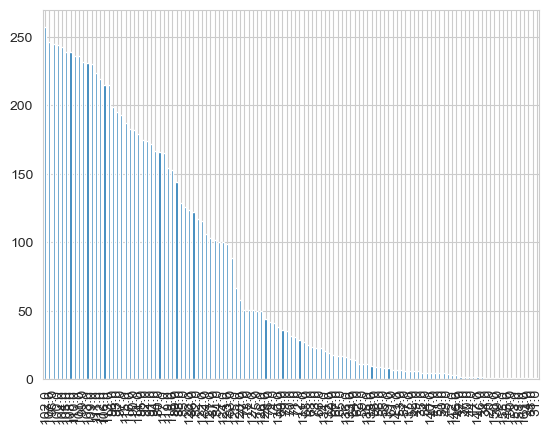

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
Central Tendency and Dispersion:  {'Mean': nan, 'Median': nan, 'Mode': nan, 'Variance': nan, 'Standard Deviation': nan, 'Kurtosis': nan, 'Screw': nan}
Plotting the count plot


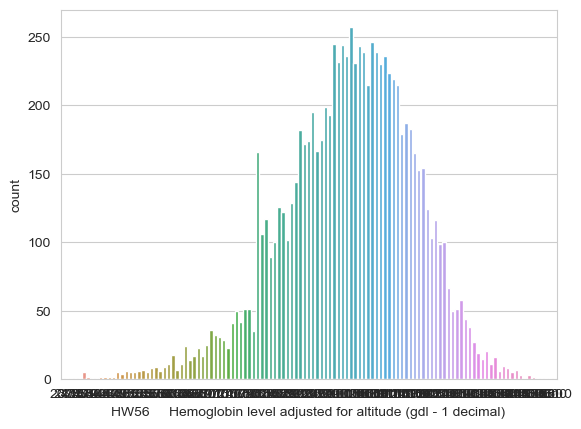

Feature Name:  HW57     Anemia level
Number of Unique Values:  5
Unique Values:  [1 0 4 2 3]
Value Counts:  1    3520
2    2924
0    2380
4    1864
3     300
Name: HW57     Anemia level, dtype: int64


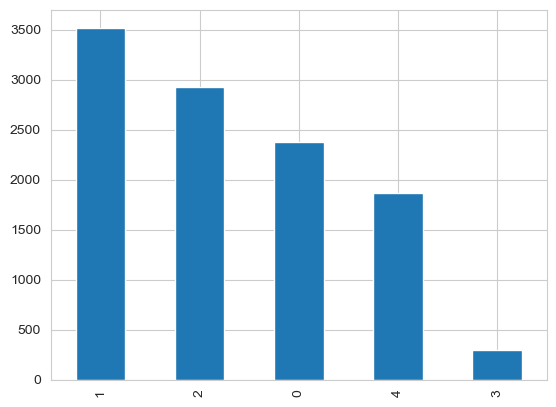

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.6130323989807063, variance=1.7430248257455143, skewness=0.6138990054781926, kurtosis=-0.6542039001720918)
Central Tendency and Dispersion:  {'Mean': 1.6130323989807063, 'Median': 1.0, 'Mode': 1, 'Variance': 1.7428661958924248, 'Standard Deviation': 1.3201765775427259, 'Kurtosis': -0.6542039001720918, 'Screw': 0.6138990054781926}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


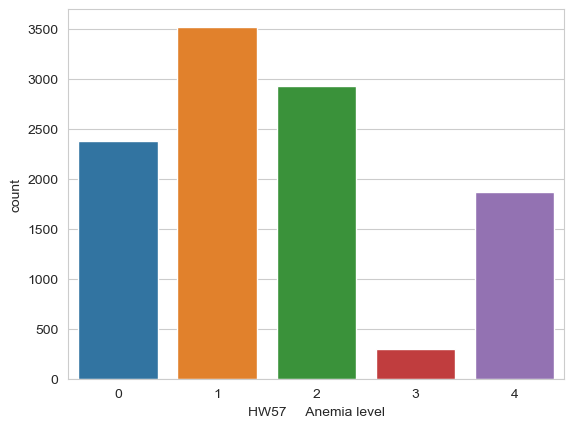

Feature Name:  M13      Timing of 1st antenatal check (months)
Number of Unique Values:  11
Unique Values:  [10  3  0  5  2  4  1  7  8  6  9]
Value Counts:  10    6781
3     1020
2      930
4      791
5      487
1      368
6      277
0      163
7       78
9       74
8       19
Name: M13      Timing of 1st antenatal check (months), dtype: int64


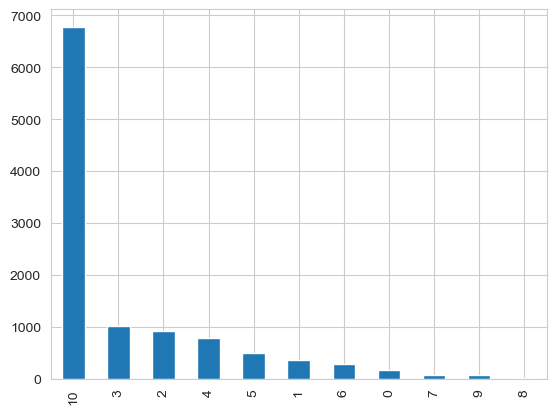

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 10), mean=7.437477247906807, variance=11.776649391946117, skewness=-0.7420895572640733, kurtosis=-1.1879823609117972)
Central Tendency and Dispersion:  {'Mean': 7.437477247906807, 'Median': 10.0, 'Mode': 10, 'Variance': 11.775577618248269, 'Standard Deviation': 3.431556151113991, 'Kurtosis': -1.1879823609117972, 'Screw': -0.7420895572640733}
Plotting the count plot


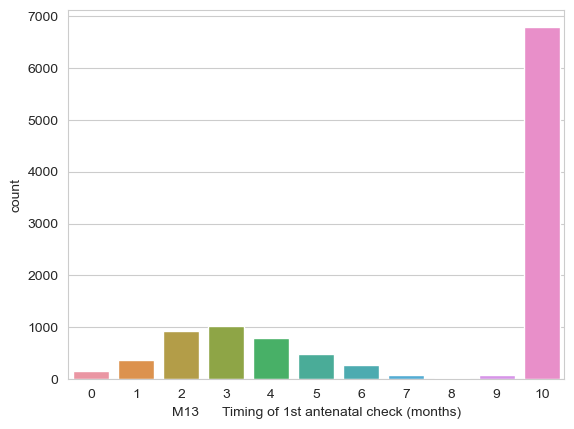

Feature Name:  M14      Number of antenatal visits during pregnancy
Number of Unique Values:  23
Unique Values:  [22 16 21 15 13 14 17  1  0 18 11 20  8 12  3  5 19  4  6  2  7  9 10]
Value Counts:  22    5491
21    1290
14     813
15     609
13     576
16     519
11     284
20     277
18     213
17     206
0      192
1      176
12      82
19      58
3       54
6       47
5       27
7       24
2       22
9       13
8        7
4        4
10       4
Name: M14      Number of antenatal visits during pregnancy, dtype: int64


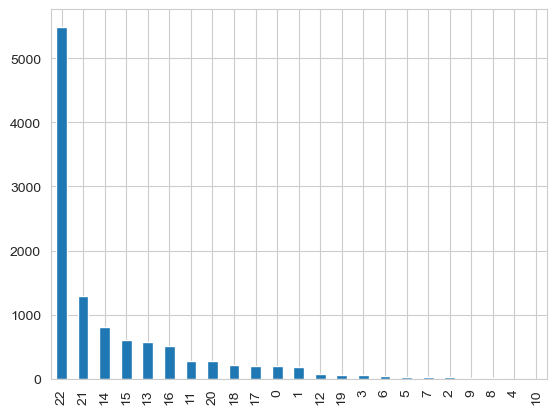

Data set description
DescribeResult(nobs=10988, minmax=(0, 22), mean=18.51865671641791, variance=27.086299751809808, skewness=-1.804533907791218, kurtosis=3.166062317694844)
Central Tendency and Dispersion:  {'Mean': 18.51865671641791, 'Median': 21.0, 'Mode': 22, 'Variance': 27.083834671745024, 'Standard Deviation': 5.204213165479007, 'Kurtosis': 3.166062317694844, 'Screw': -1.804533907791218}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


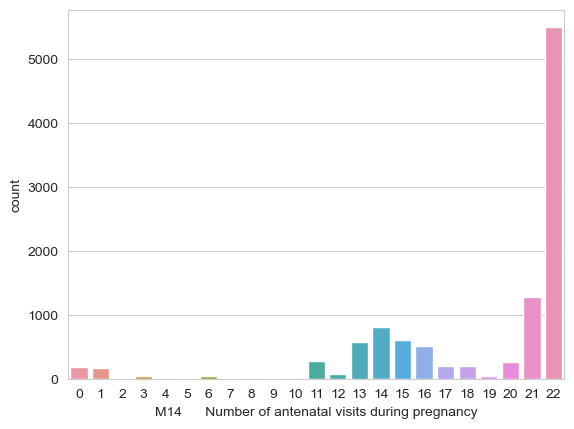

Feature Name:  M2A      Prenatal: doctor
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    3792
1    1705
Name: M2A      Prenatal: doctor, dtype: int64


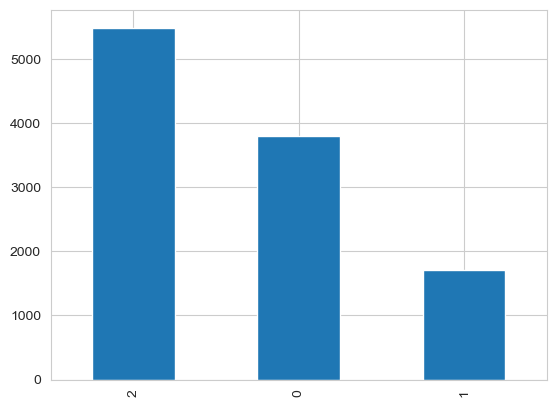

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.154623225336731, variance=0.8209971002232545, skewness=-0.30905641610159074, kurtosis=-1.7110015364938274)
Central Tendency and Dispersion:  {'Mean': 1.154623225336731, 'Median': 1.0, 'Mode': 2, 'Variance': 0.8209223826131139, 'Standard Deviation': 0.9060476712696269, 'Kurtosis': -1.7110015364938274, 'Screw': -0.30905641610159074}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


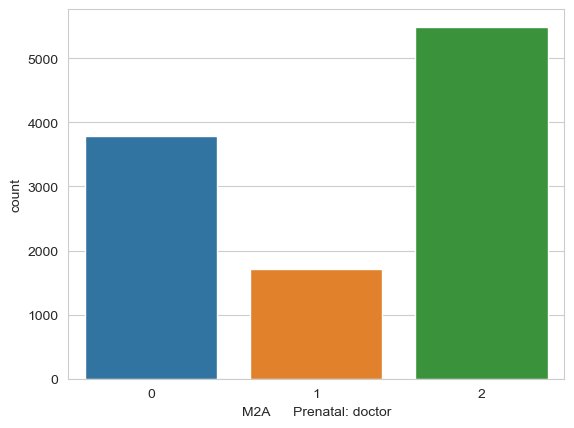

Feature Name:  M2B      Prenatal: nursemidwife
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    2798
1    2699
Name: M2B      Prenatal: nursemidwife, dtype: int64


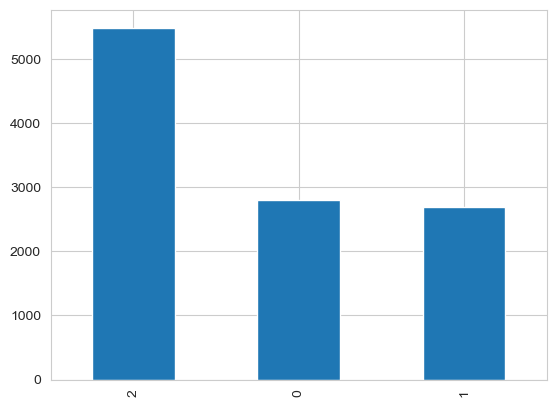

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.2450855478704042, variance=0.6943646691166835, skewness=-0.4842068351744373, kurtosis=-1.391982497838443)
Central Tendency and Dispersion:  {'Mean': 1.2450855478704042, 'Median': 1.0, 'Mode': 2, 'Variance': 0.6943014761180379, 'Standard Deviation': 0.8332475479220074, 'Kurtosis': -1.391982497838443, 'Screw': -0.4842068351744373}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


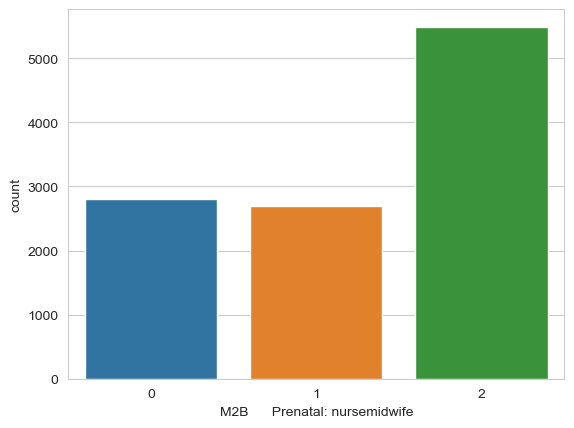

Feature Name:  M2C      Prenatal: auxiliary midwife
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    5367
1     130
Name: M2C      Prenatal: auxiliary midwife, dtype: int64


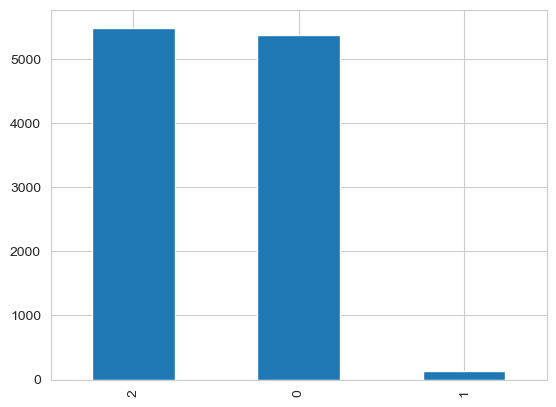

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.0112850382235166, variance=0.9881314876909335, skewness=-0.02257030492635882, kurtosis=-1.9875147742081907)
Central Tendency and Dispersion:  {'Mean': 1.0112850382235166, 'Median': 1.0, 'Mode': 2, 'Variance': 0.9880415594521555, 'Standard Deviation': 0.9940027965011746, 'Kurtosis': -1.9875147742081907, 'Screw': -0.02257030492635882}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


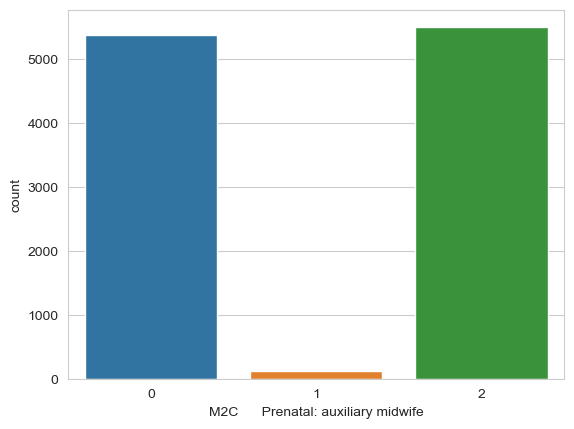

Feature Name:  M2D      Prenatal: government health community extension health worker
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    4895
1     602
Name: M2D      Prenatal: government health community extension health worker, dtype: int64


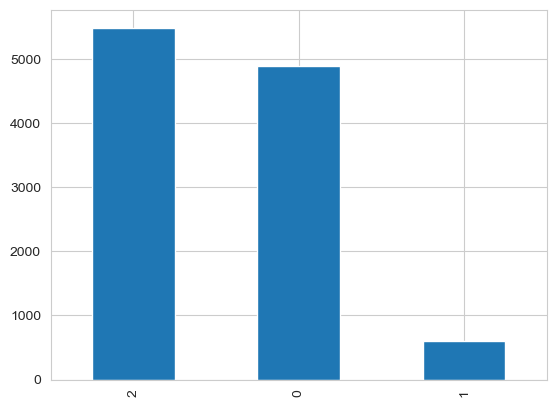

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.0542409901710958, variance=0.942356636921637, skewness=-0.1085067689241545, kurtosis=-1.9299116720868053)
Central Tendency and Dispersion:  {'Mean': 1.0542409901710958, 'Median': 1.0, 'Mode': 2, 'Variance': 0.9422708745775413, 'Standard Deviation': 0.9707063791783493, 'Kurtosis': -1.9299116720868053, 'Screw': -0.1085067689241545}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


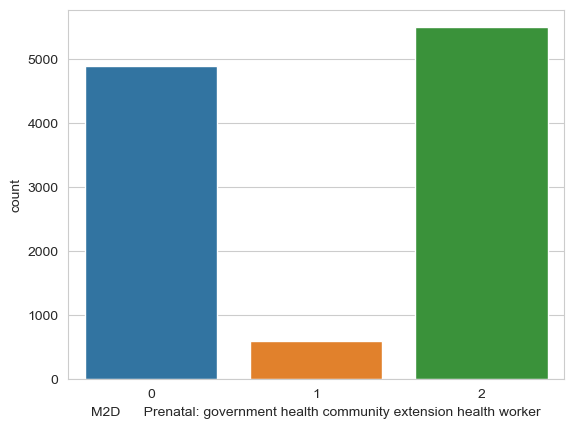

Feature Name:  M2F      NA - Prenatal: CS health professional
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M2F      NA - Prenatal: CS health professional, dtype: int64)
Error in feature:  M2F      NA - Prenatal: CS health professional
Feature Name:  M2G      Prenatal: traditional birth attendant
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    5420
1      77
Name: M2G      Prenatal: traditional birth attendant, dtype: int64


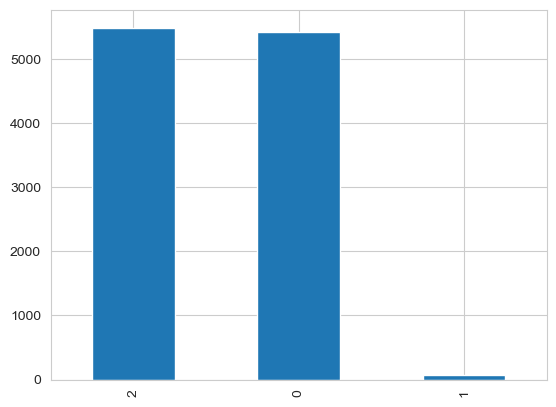

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.006461594466691, variance=0.99304097813715, skewness=-0.012923217914556678, kurtosis=-1.9927753006969404)
Central Tendency and Dispersion:  {'Mean': 1.006461594466691, 'Median': 1.0, 'Mode': 2, 'Variance': 0.9929506030936354, 'Standard Deviation': 0.9964690678057374, 'Kurtosis': -1.9927753006969404, 'Screw': -0.012923217914556678}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


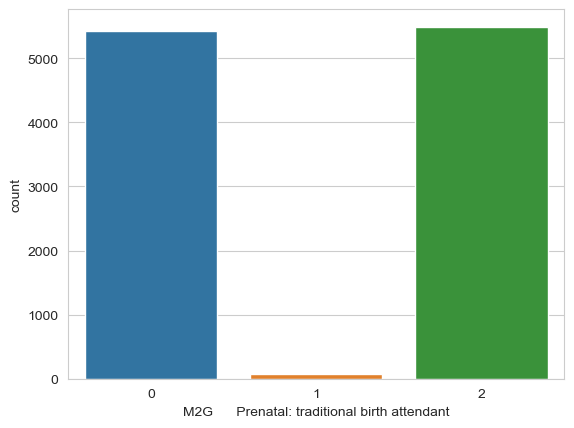

Feature Name:  M2H      Prenatal: Community health workerfield worker
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    5310
1     187
Name: M2H      Prenatal: Community health workerfield worker, dtype: int64


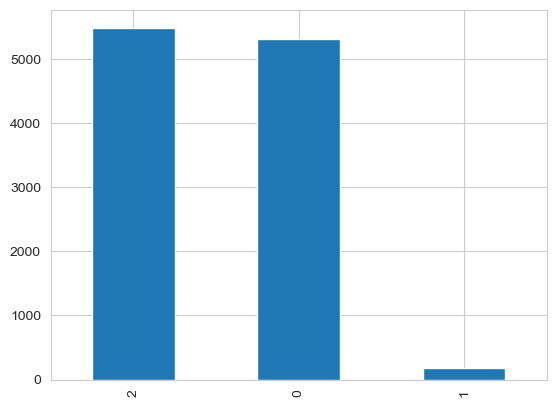

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.0164725154714234, variance=0.9827995335123031, skewness=-0.032945817010896244, kurtosis=-1.9815918819206393)
Central Tendency and Dispersion:  {'Mean': 1.0164725154714234, 'Median': 1.0, 'Mode': 2, 'Variance': 0.9827100905259987, 'Standard Deviation': 0.9913173510667503, 'Kurtosis': -1.9815918819206393, 'Screw': -0.032945817010896244}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


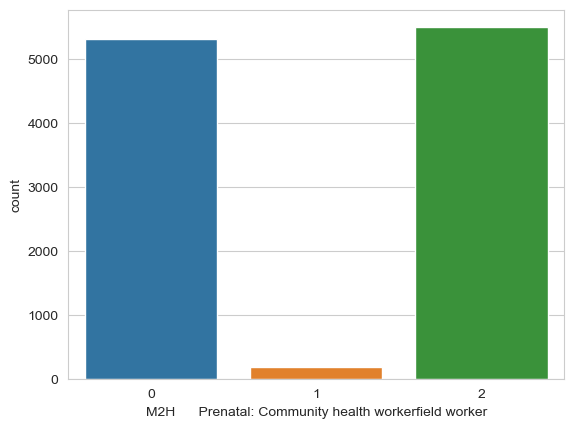

Feature Name:  M2J      NA - Prenatal: CS other person
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M2J      NA - Prenatal: CS other person, dtype: int64)
Error in feature:  M2J      NA - Prenatal: CS other person
Feature Name:  M2K      Prenatal: other
Number of Unique Values:  3
Unique Values:  [2 1 0]
Value Counts:  2    5491
0    5465
1      32
Name: M2K      Prenatal: other, dtype: int64


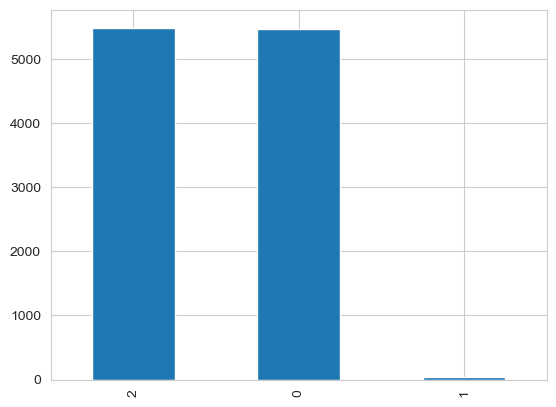

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.0023662176920276, variance=0.9971728841667434, skewness=-0.004732433507522498, kurtosis=-1.997056797313339)
Central Tendency and Dispersion:  {'Mean': 1.0023662176920276, 'Median': 1.0, 'Mode': 2, 'Variance': 0.9970821330851847, 'Standard Deviation': 0.9985400007436781, 'Kurtosis': -1.997056797313339, 'Screw': -0.004732433507522498}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


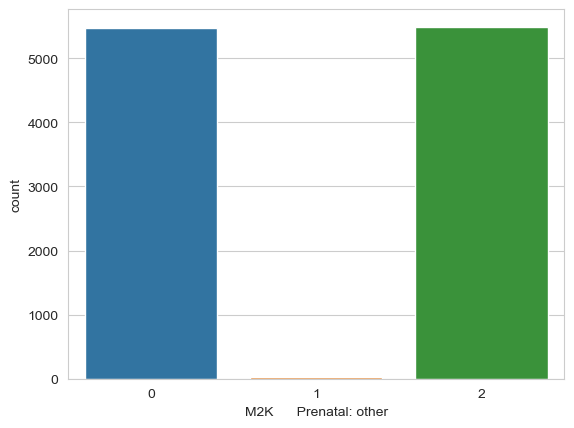

Feature Name:  M2M      NA - Prenatal: CS other
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M2M      NA - Prenatal: CS other, dtype: int64)
Error in feature:  M2M      NA - Prenatal: CS other
Feature Name:  M2N      Prenatal: no one
Number of Unique Values:  3
Unique Values:  [2 0 1]
Value Counts:  2    5491
0    4207
1    1290
Name: M2N      Prenatal: no one, dtype: int64


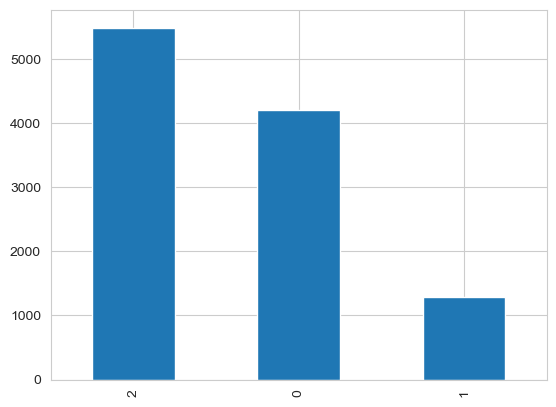

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.1168547506370585, variance=0.8690232547721868, skewness=-0.23377833379168325, kurtosis=-1.8084039806743684)
Central Tendency and Dispersion:  {'Mean': 1.1168547506370585, 'Median': 1.0, 'Mode': 2, 'Variance': 0.8689441663798704, 'Standard Deviation': 0.9321717472546946, 'Kurtosis': -1.8084039806743684, 'Screw': -0.23377833379168325}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


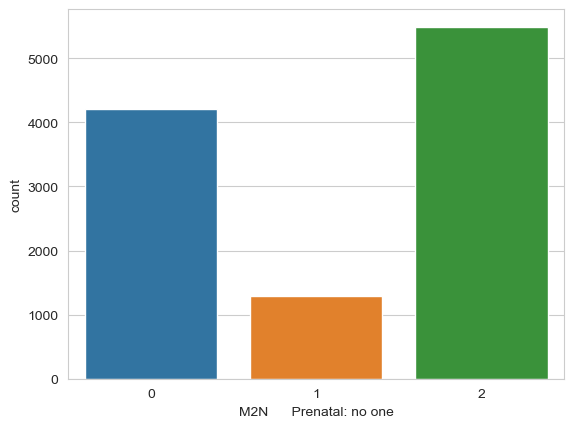

Feature Name:  M49A     During pregnancy took: SPfansidar for malaria
Number of Unique Values:  4
Unique Values:  [3 2 1 0]
Value Counts:  3    5491
2    3278
1    1955
0     264
Name: M49A     During pregnancy took: SPfansidar for malaria, dtype: int64


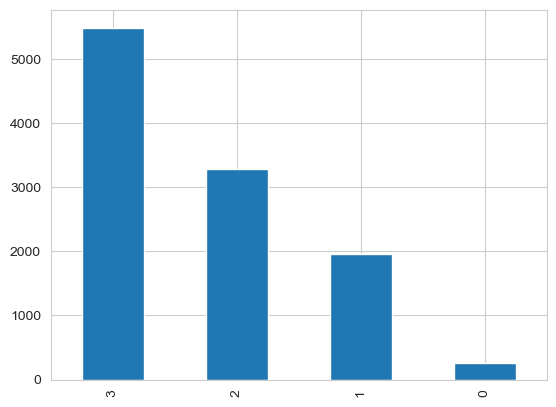

Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=2.273753185293047, variance=0.6988759824008843, skewness=-0.7956998073033366, kurtosis=-0.4377943591704456)
Central Tendency and Dispersion:  {'Mean': 2.273753185293047, 'Median': 2.0, 'Mode': 3, 'Variance': 0.6988123788349577, 'Standard Deviation': 0.8359499858454199, 'Kurtosis': -0.4377943591704456, 'Screw': -0.7956998073033366}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


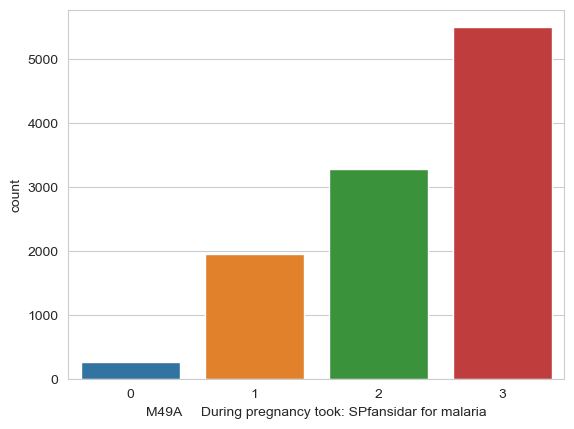

Feature Name:  M49C     NA - During pregnancy took: CS drug for malaria
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M49C     NA - During pregnancy took: CS drug for malaria, dtype: int64)
Error in feature:  M49C     NA - During pregnancy took: CS drug for malaria
Feature Name:  M49E     NA - During pregnancy took: CS drug for malaria
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M49E     NA - During pregnancy took: CS drug for malaria, dtype: int64)
Error in feature:  M49E     NA - During pregnancy took: CS drug for malaria
Feature Name:  M49G     NA - During pregnancy took: CS drug for malaria
Number of Unique Values:  0
Unique Values:  [nan]
Value Counts:  Series([], Name: M49G     NA - During pregnancy took: CS drug for malaria, dtype: int64)
Error in feature:  M49G     NA - During pregnancy took: CS drug for malaria
Feature Name:  M49Y     NA - During pregnancy took: no drug for malaria
Number of Unique Value

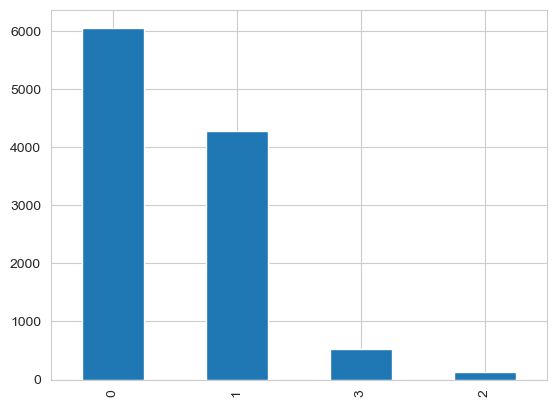

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=0.5547870404077175, variance=0.553929025364026, skewness=1.6161942981988, kurtosis=2.8912170744078196)
Central Tendency and Dispersion:  {'Mean': 0.5547870404077175, 'Median': 0.0, 'Mode': 0, 'Variance': 0.5538786131847974, 'Standard Deviation': 0.7442302151786081, 'Kurtosis': 2.8912170744078196, 'Screw': 1.6161942981988}
Plotting the count plot


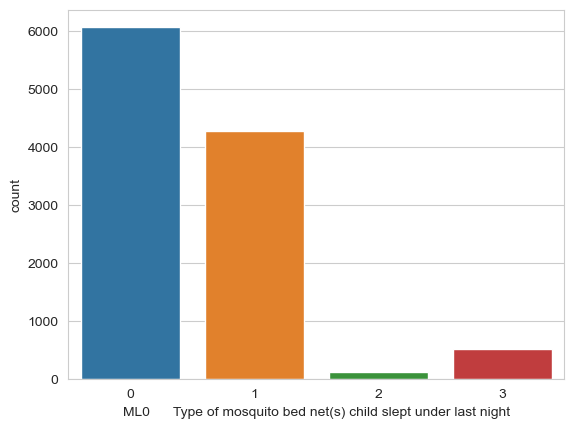

Feature Name:  ML101    Type of mosquito bed net(s) slept under last night
Number of Unique Values:  3
Unique Values:  [0 1 2]
Value Counts:  0    5987
1    4841
2     160
Name: ML101    Type of mosquito bed net(s) slept under last night, dtype: int64


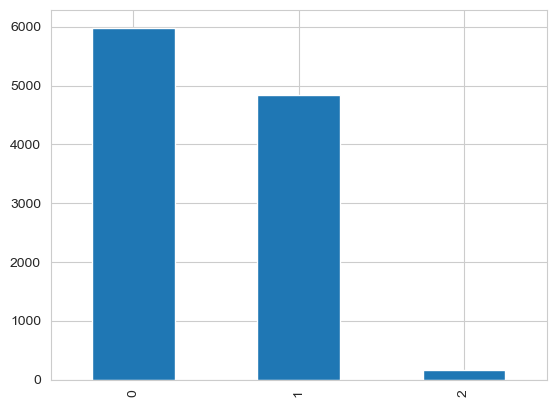

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.46969421186749183, variance=0.27822955971164787, skewness=0.41862758948062967, kurtosis=-1.1754034967829863)
Central Tendency and Dispersion:  {'Mean': 0.46969421186749183, 'Median': 0.0, 'Mode': 0, 'Variance': 0.27820423849216186, 'Standard Deviation': 0.5274506976885724, 'Kurtosis': -1.1754034967829863, 'Screw': 0.41862758948062967}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


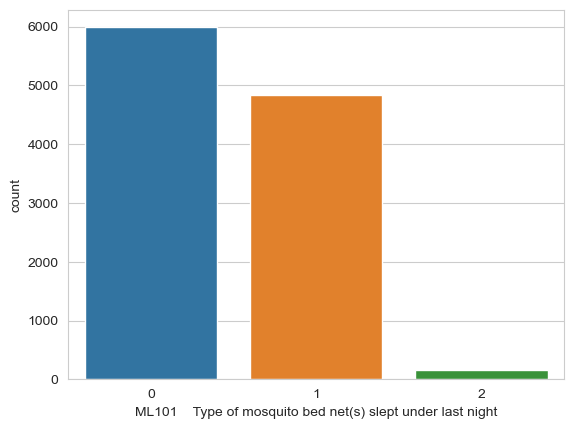

In [215]:
for cols in data_cluster[3].columns:
    feature_uni_varaite_analysis(cols, data_cluster[3])

## 2.1.5. Univariate Analysis of Communication Variables

Feature Name:  ML501    Last six months heardseen malaria messages
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  0    6210
1    4778
Name: ML501    Last six months heardseen malaria messages, dtype: int64


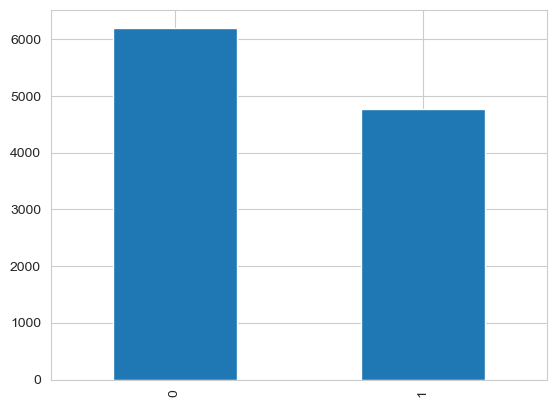

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.43483800509646886, variance=0.24577628211969338, skewness=0.26289004767779256, kurtosis=-1.9308888228319674)
Central Tendency and Dispersion:  {'Mean': 0.43483800509646886, 'Median': 0.0, 'Mode': 0, 'Variance': 0.24575391442019212, 'Standard Deviation': 0.49573573042518543, 'Kurtosis': -1.9308888228319674, 'Screw': 0.26289004767779256}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


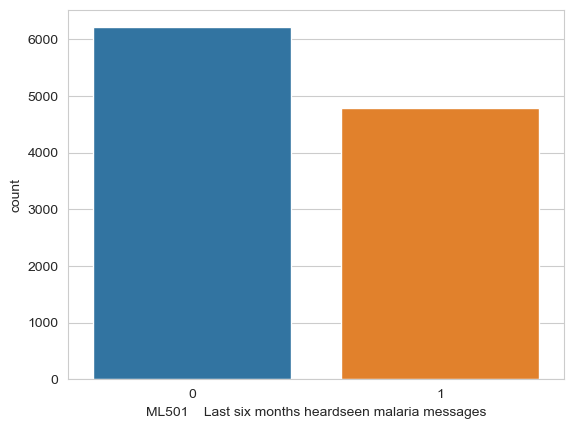

Feature Name:  ML501A   Malaria messages were heardseen: radio
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  0    9247
1    1741
Name: ML501A   Malaria messages were heardseen: radio, dtype: int64


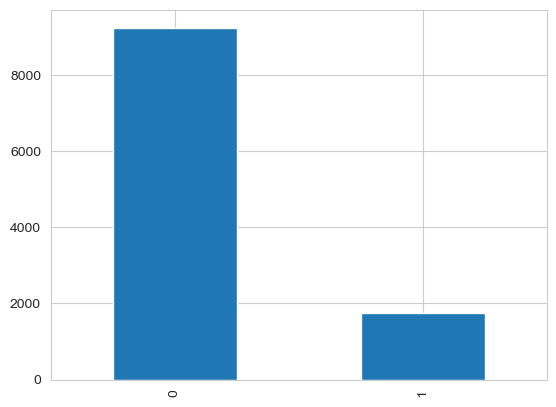

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.15844557699308337, variance=0.13335271233776663, skewness=1.8707198120326136, kurtosis=1.4995926151313368)
Central Tendency and Dispersion:  {'Mean': 0.15844557699308337, 'Median': 0.0, 'Mode': 0, 'Variance': 0.13334057612441225, 'Standard Deviation': 0.36515828913556414, 'Kurtosis': 1.4995926151313368, 'Screw': 1.8707198120326136}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


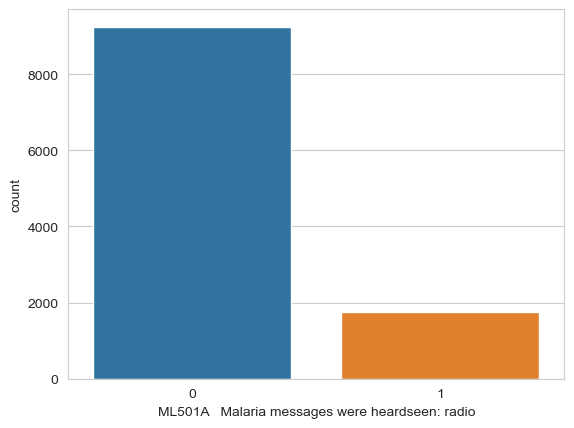

Feature Name:  ML501B   Malaria messages were heardseen: television
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10153
1      835
Name: ML501B   Malaria messages were heardseen: television, dtype: int64


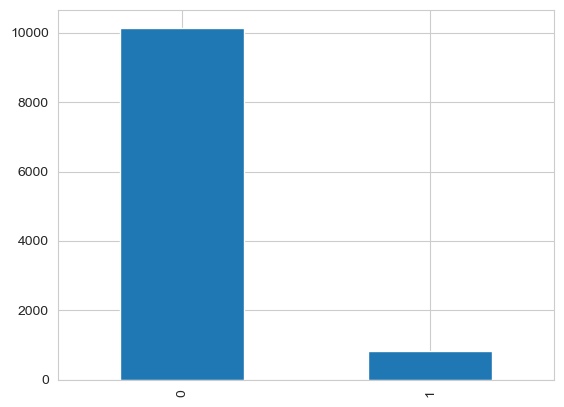

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.07599199126319621, variance=0.07022359946256772, skewness=3.2002379816328896, kurtosis=8.241523139085755)
Central Tendency and Dispersion:  {'Mean': 0.07599199126319621, 'Median': 0.0, 'Mode': 0, 'Variance': 0.07021720852705055, 'Standard Deviation': 0.26498529869985343, 'Kurtosis': 8.241523139085755, 'Screw': 3.2002379816328896}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


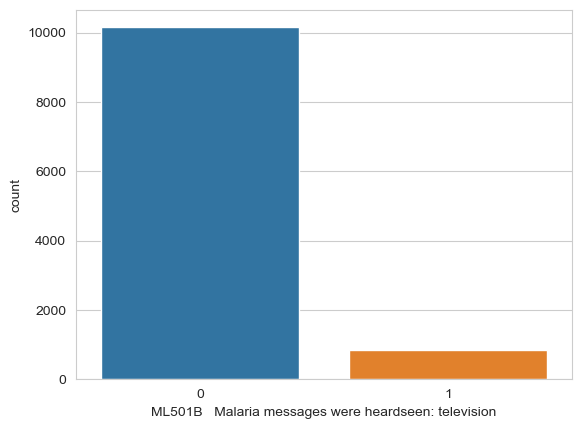

Feature Name:  ML501C   Malaria messages were heardseen: posterbillboard
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10844
1      144
Name: ML501C   Malaria messages were heardseen: posterbillboard, dtype: int64


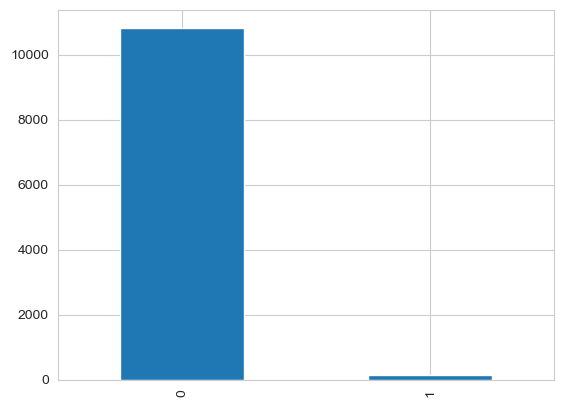

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.013105205678922462, variance=0.012934636423248859, skewness=8.56264181128178, kurtosis=71.318834788311)
Central Tendency and Dispersion:  {'Mean': 0.013105205678922462, 'Median': 0.0, 'Mode': 0, 'Variance': 0.012933459263035602, 'Standard Deviation': 0.11372536771994013, 'Kurtosis': 71.318834788311, 'Screw': 8.56264181128178}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


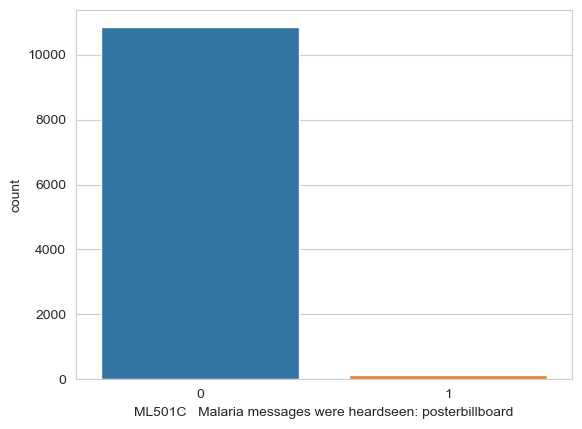

Feature Name:  ML501D   Malaria messages were heardseen: newspapermagazine
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10937
1       51
Name: ML501D   Malaria messages were heardseen: newspapermagazine, dtype: int64


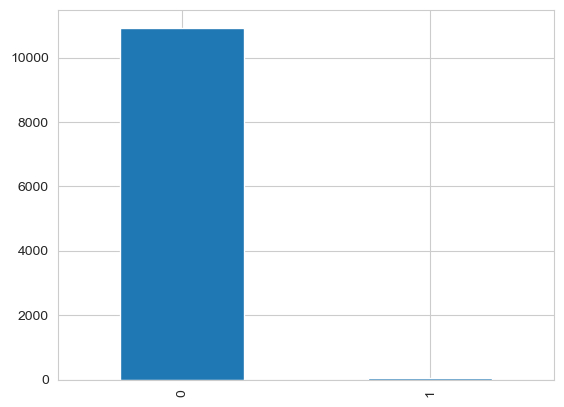

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.004641427011285038, variance=0.004620304652992126, skewness=14.575858241025413, kurtosis=210.45564346246857)
Central Tendency and Dispersion:  {'Mean': 0.004641427011285038, 'Median': 0.0, 'Mode': 0, 'Variance': 0.0046198841665839535, 'Standard Deviation': 0.0679697297816017, 'Kurtosis': 210.45564346246857, 'Screw': 14.575858241025413}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


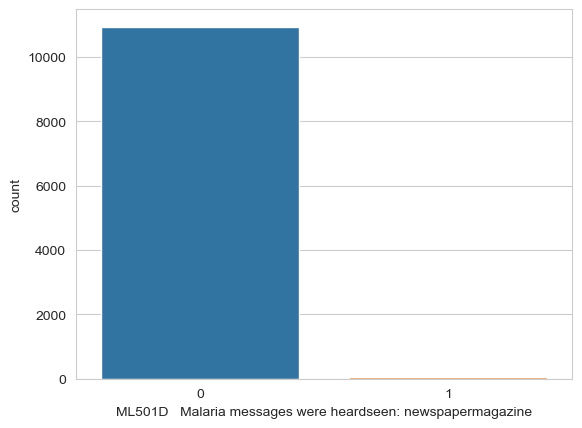

Feature Name:  ML501E   Malaria messages were heardseen: leafletbrochure
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10919
1       69
Name: ML501E   Malaria messages were heardseen: leafletbrochure, dtype: int64


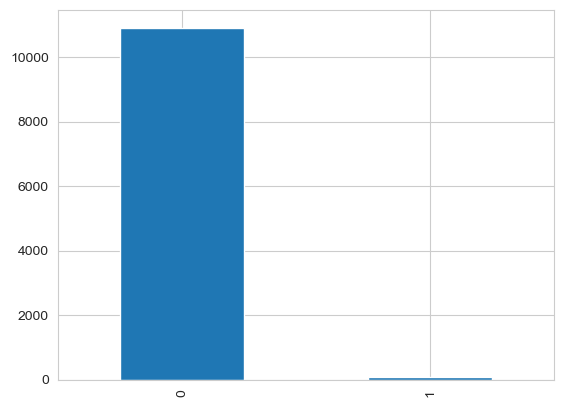

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.006279577721150346, variance=0.006240712581891385, skewness=12.50010784239878, kurtosis=154.2526960715996)
Central Tendency and Dispersion:  {'Mean': 0.006279577721150346, 'Median': 0.0, 'Mode': 0, 'Variance': 0.006240144624794379, 'Standard Deviation': 0.0789945860473639, 'Kurtosis': 154.2526960715996, 'Screw': 12.50010784239878}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


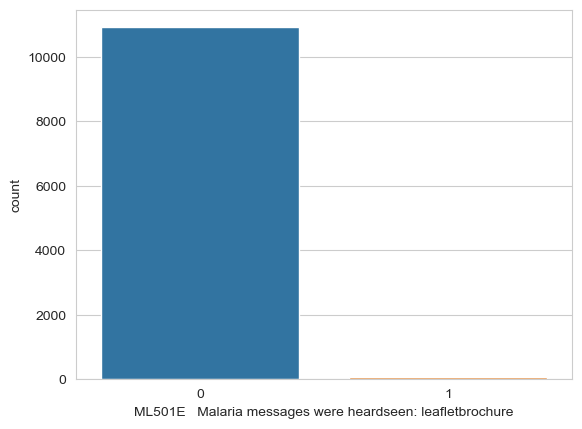

Feature Name:  ML501F   Malaria messages were heardseen: healthcare provider
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    9910
1    1078
Name: ML501F   Malaria messages were heardseen: healthcare provider, dtype: int64


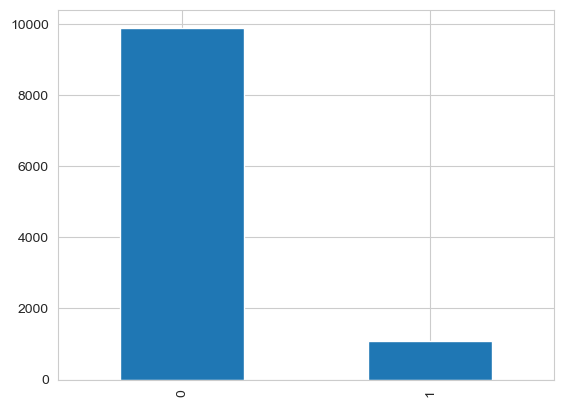

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.09810702584637787, variance=0.08849009066511374, skewness=2.7021711489717903, kurtosis=5.301728918335522)
Central Tendency and Dispersion:  {'Mean': 0.09810702584637787, 'Median': 0.0, 'Mode': 0, 'Variance': 0.088482037325956, 'Standard Deviation': 0.29745930364666023, 'Kurtosis': 5.301728918335522, 'Screw': 2.7021711489717903}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


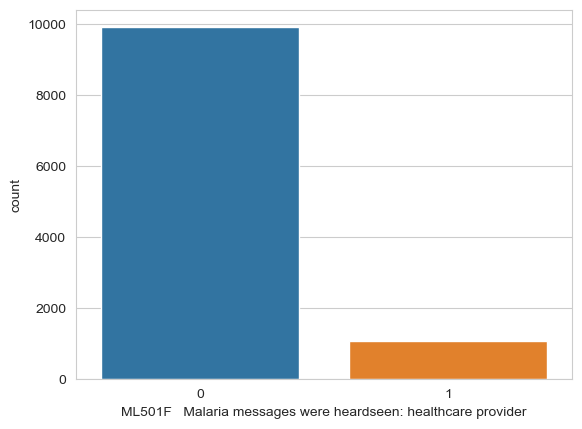

Feature Name:  ML501G   Malaria messages were heardseen: community health worker
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  0    9651
1    1337
Name: ML501G   Malaria messages were heardseen: community health worker, dtype: int64


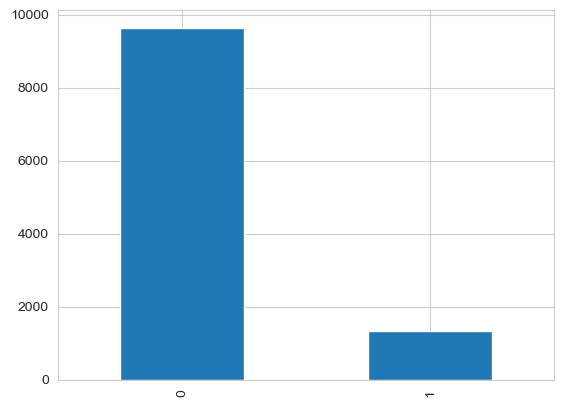

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.12167819439388423, variance=0.10688233859064138, skewness=2.314505188695556, kurtosis=3.3569342684986507)
Central Tendency and Dispersion:  {'Mean': 0.12167819439388423, 'Median': 0.0, 'Mode': 0, 'Variance': 0.10687261140292835, 'Standard Deviation': 0.32691376753347107, 'Kurtosis': 3.3569342684986507, 'Screw': 2.314505188695556}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


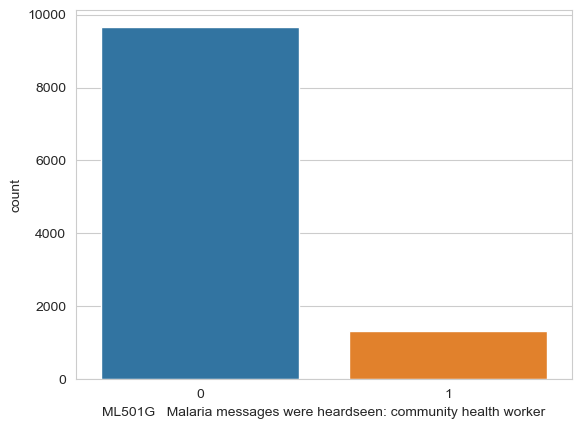

Feature Name:  ML501H   Malaria messages were heardseen: social media
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10671
1      317
Name: ML501H   Malaria messages were heardseen: social media, dtype: int64


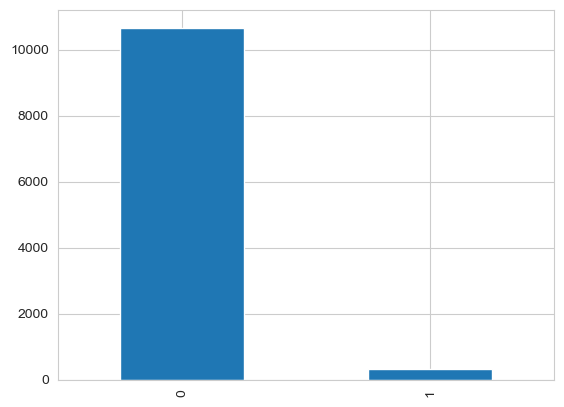

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.028849654168183473, variance=0.028019901668215698, skewness=5.629579668988077, kurtosis=29.692167249483916)
Central Tendency and Dispersion:  {'Mean': 0.028849654168183473, 'Median': 0.0, 'Mode': 0, 'Variance': 0.028017351622559687, 'Standard Deviation': 0.16738384516601262, 'Kurtosis': 29.692167249483916, 'Screw': 5.629579668988077}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


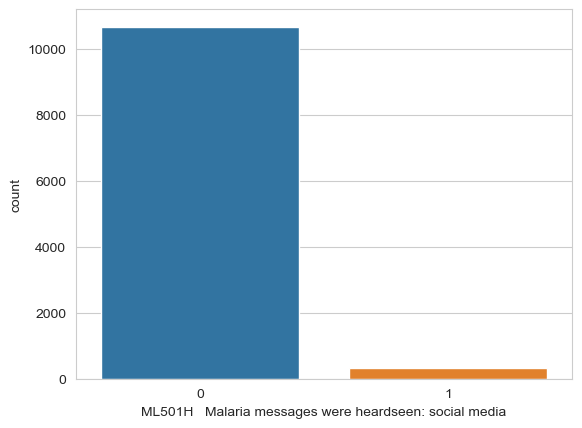

Feature Name:  ML501I   Malaria messages were heardseen: town announcer
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10712
1      276
Name: ML501I   Malaria messages were heardseen: town announcer, dtype: int64


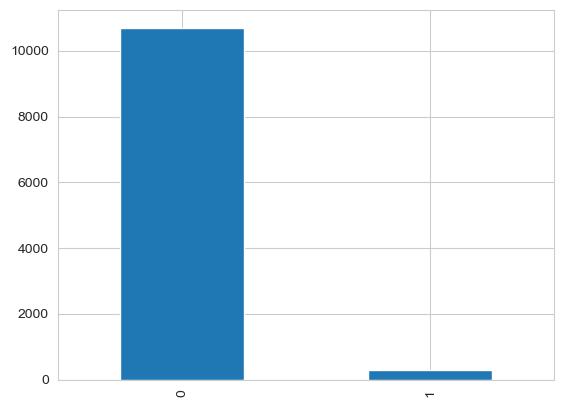

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.025118310884601383, variance=0.02448961010247111, skewness=6.069378856154706, kurtosis=34.837359699537835)
Central Tendency and Dispersion:  {'Mean': 0.025118310884601383, 'Median': 0.0, 'Mode': 0, 'Variance': 0.024487381342905904, 'Standard Deviation': 0.1564844444119156, 'Kurtosis': 34.837359699537835, 'Screw': 6.069378856154706}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


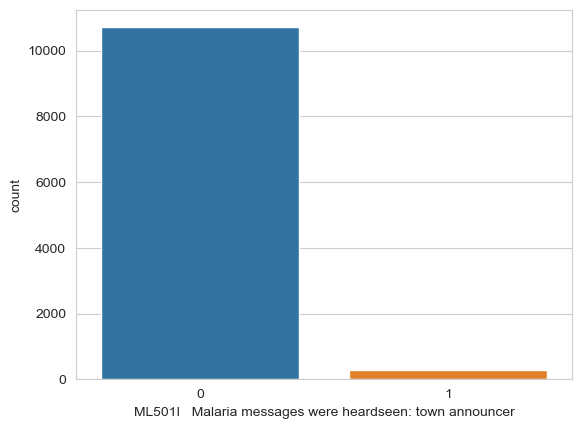

Feature Name:  ML501J   Malaria messages were heardseen: inter-personal communication agentcommunity volunteer
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10753
1      235
Name: ML501J   Malaria messages were heardseen: inter-personal communication agentcommunity volunteer, dtype: int64


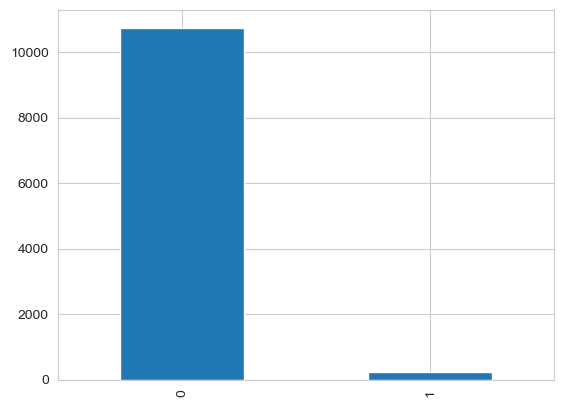

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.021386967601019293, variance=0.020931470156890914, skewness=6.616592867536436, kurtosis=41.779301174734016)
Central Tendency and Dispersion:  {'Mean': 0.021386967601019293, 'Median': 0.0, 'Mode': 0, 'Variance': 0.020929565217852244, 'Standard Deviation': 0.1446705402556175, 'Kurtosis': 41.779301174734016, 'Screw': 6.616592867536436}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


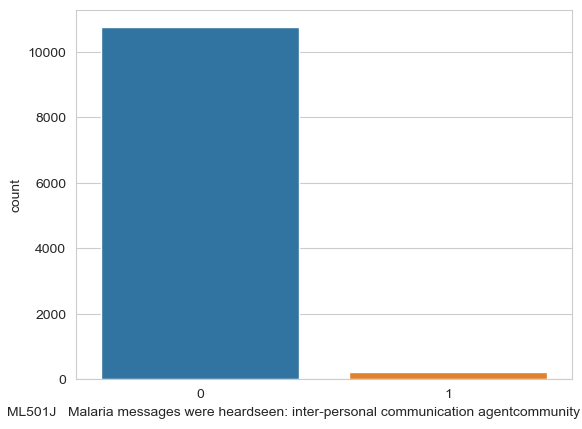

Feature Name:  ML501K   Malaria messages were heardseen: familyfriends
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10544
1      444
Name: ML501K   Malaria messages were heardseen: familyfriends, dtype: int64


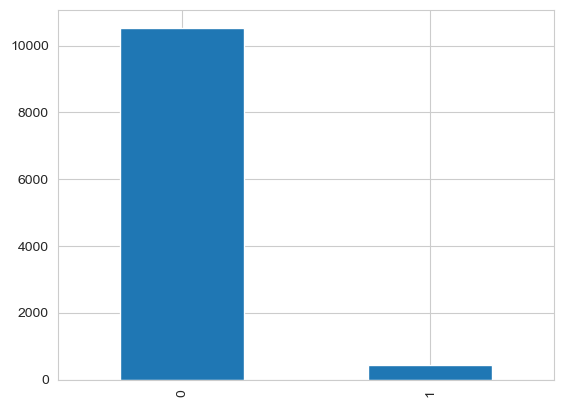

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.04040771751001092, variance=0.03877846304046191, skewness=4.66796069008694, kurtosis=19.789857004196918)
Central Tendency and Dispersion:  {'Mean': 0.04040771751001092, 'Median': 0.0, 'Mode': 0, 'Variance': 0.03877493387564206, 'Standard Deviation': 0.19691351877319663, 'Kurtosis': 19.789857004196918, 'Screw': 4.66796069008694}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


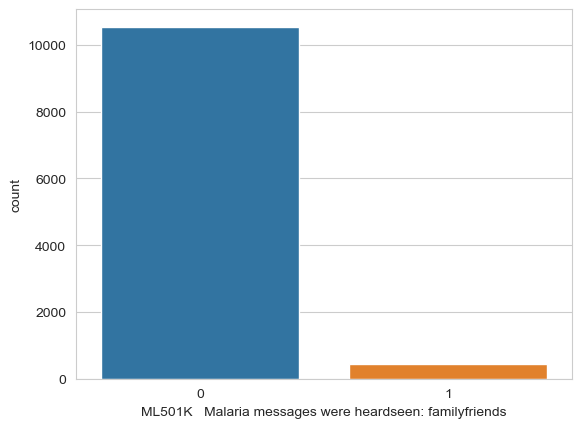

Feature Name:  ML501X   Malaria messages were heardseen: other
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10952
1       36
Name: ML501X   Malaria messages were heardseen: other, dtype: int64


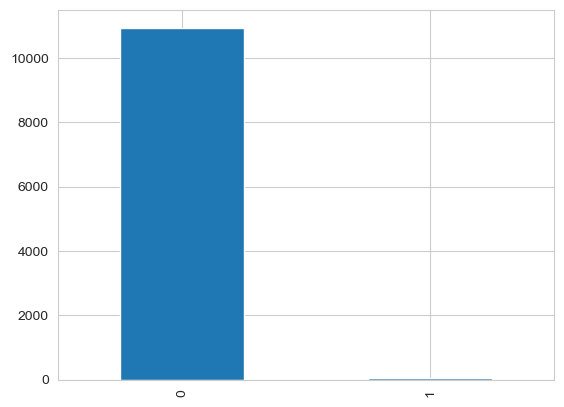

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.0032763014197306154, variance=0.0032658644897505884, skewness=17.384634287009803, kurtosis=300.2255092930767)
Central Tendency and Dispersion:  {'Mean': 0.0032763014197306154, 'Median': 0.0, 'Mode': 0, 'Variance': 0.0032655672687376875, 'Standard Deviation': 0.05714514212719825, 'Kurtosis': 300.2255092930767, 'Screw': 17.384634287009803}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


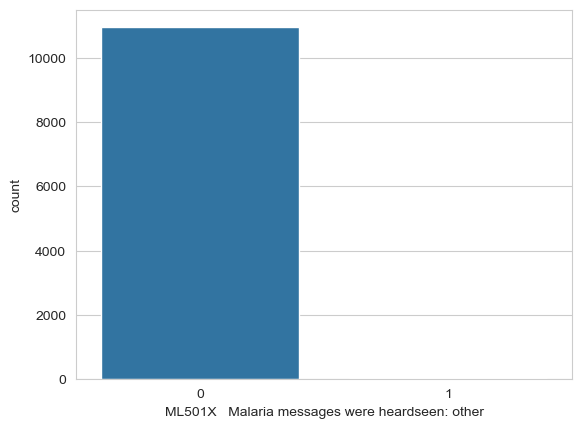

Feature Name:  ML501Z   Malaria messages were heardseen: don't remember
Number of Unique Values:  2
Unique Values:  [0 1]
Value Counts:  0    10961
1       27
Name: ML501Z   Malaria messages were heardseen: don't remember, dtype: int64


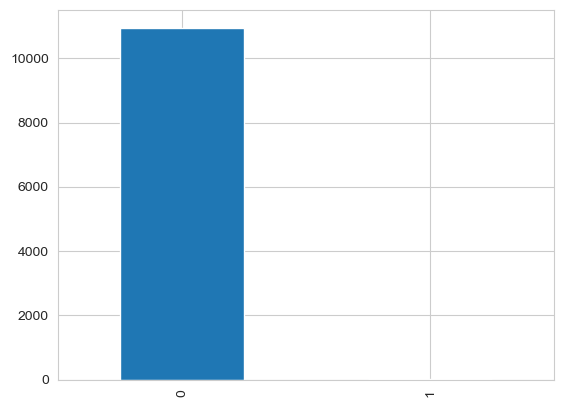

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.0024572260647979616, variance=0.002451411203809088, skewness=20.098891169461606, kurtosis=401.96542624186117)
Central Tendency and Dispersion:  {'Mean': 0.0024572260647979616, 'Median': 0.0, 'Mode': 0, 'Variance': 0.002451188104864438, 'Standard Deviation': 0.04950947489990616, 'Kurtosis': 401.96542624186117, 'Screw': 20.098891169461606}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


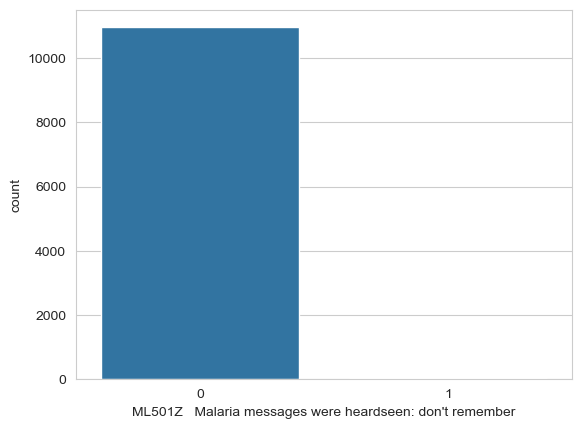

Feature Name:  V157     Frequency of reading newspaper or magazine
Number of Unique Values:  3
Unique Values:  [2 1 0]
Value Counts:  2    9266
1    1073
0     649
Name: V157     Frequency of reading newspaper or magazine, dtype: int64


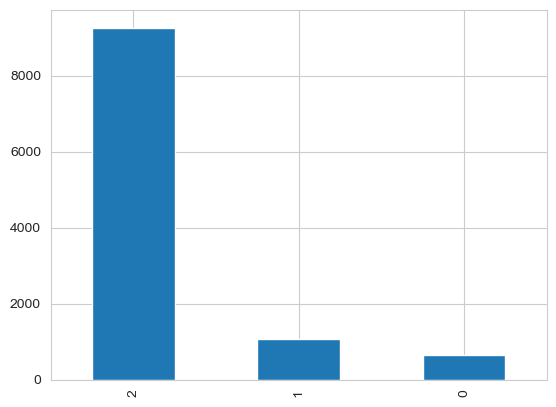

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.784219148161631, variance=0.2873744971594818, skewness=-2.4287536889260037, kurtosis=4.718846005088221)
Central Tendency and Dispersion:  {'Mean': 1.784219148161631, 'Median': 2.0, 'Mode': 2, 'Variance': 0.28734834367411966, 'Standard Deviation': 0.5360488258303712, 'Kurtosis': 4.718846005088221, 'Screw': -2.4287536889260037}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


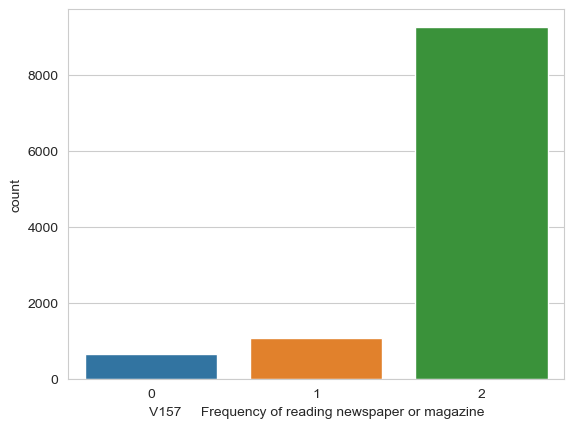

Feature Name:  V158     Frequency of listening to radio
Number of Unique Values:  3
Unique Values:  [0 1 2]
Value Counts:  2    6404
0    2359
1    2225
Name: V158     Frequency of listening to radio, dtype: int64


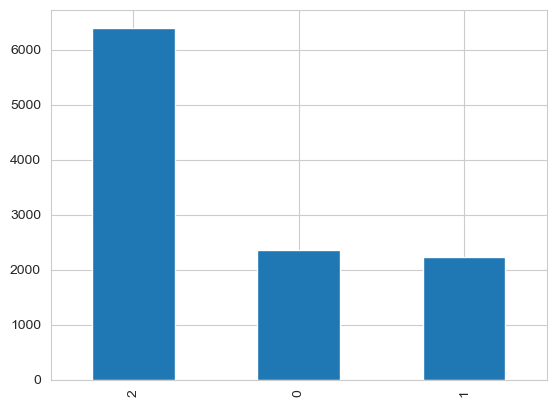

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.3681288678558428, variance=0.6620477591265238, skewness=-0.7665089920445824, kurtosis=-1.0631113991363808)
Central Tendency and Dispersion:  {'Mean': 1.3681288678558428, 'Median': 2.0, 'Mode': 2, 'Variance': 0.6619875072372694, 'Standard Deviation': 0.8136261470953778, 'Kurtosis': -1.0631113991363808, 'Screw': -0.7665089920445824}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


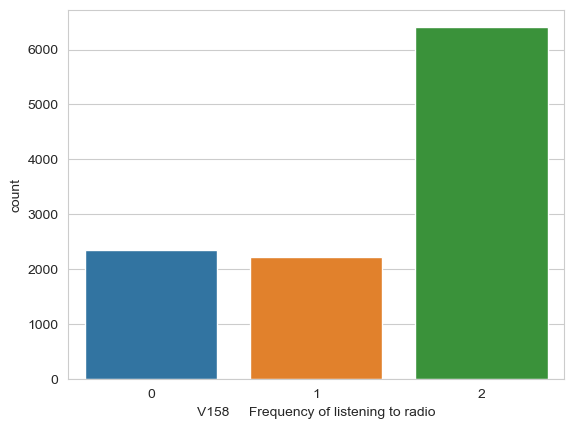

Feature Name:  V159     Frequency of watching television
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  2    6438
0    2811
1    1739
Name: V159     Frequency of watching television, dtype: int64


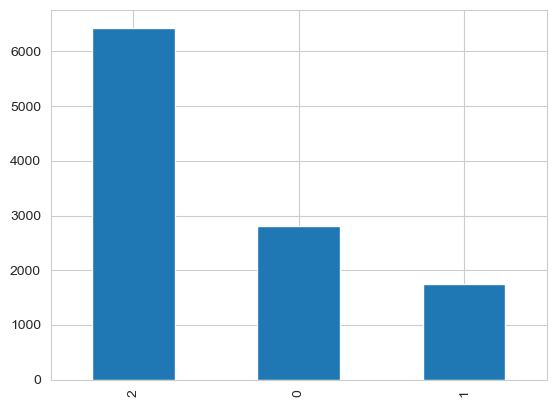

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.3300873680378595, variance=0.732845464287493, skewness=-0.687927781448344, kurtosis=-1.285600070928104)
Central Tendency and Dispersion:  {'Mean': 1.3300873680378595, 'Median': 2.0, 'Mode': 2, 'Variance': 0.732778769214296, 'Standard Deviation': 0.8560249816531618, 'Kurtosis': -1.285600070928104, 'Screw': -0.687927781448344}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


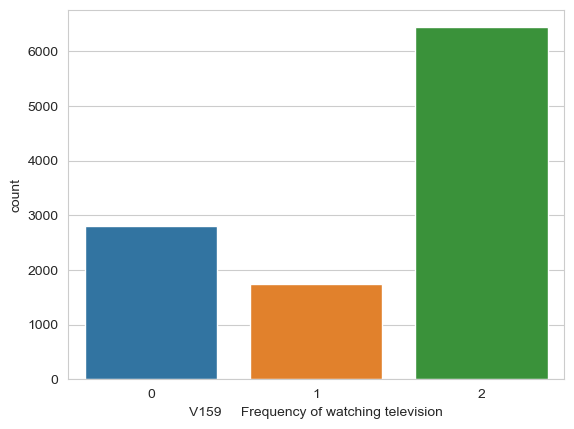

In [216]:
for cols in data_cluster[4].columns:
    feature_uni_varaite_analysis(cols, data_cluster[4])

## 2.1.6. Univariate Analysis of Internet Technology Variables

Feature Name:  V169A    Owns a mobile telephone
Number of Unique Values:  2
Unique Values:  [1 0]
Value Counts:  1    6200
0    4788
Name: V169A    Owns a mobile telephone, dtype: int64


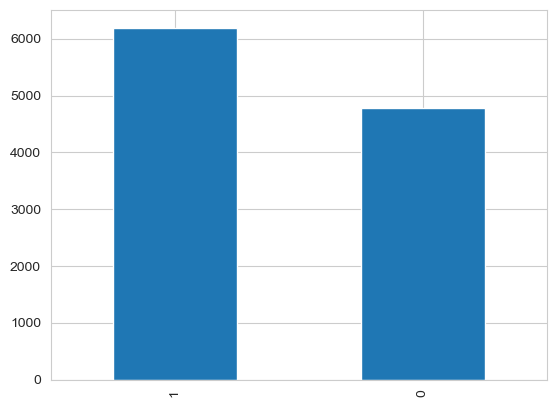

Data set description
DescribeResult(nobs=10988, minmax=(0, 1), mean=0.5642519111758282, variance=0.24589407032946814, skewness=-0.2591563061146744, kurtosis=-1.932838009000998)
Central Tendency and Dispersion:  {'Mean': 0.5642519111758282, 'Median': 1.0, 'Mode': 1, 'Variance': 0.24587169191025357, 'Standard Deviation': 0.49585450679635207, 'Kurtosis': -1.932838009000998, 'Screw': -0.2591563061146744}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


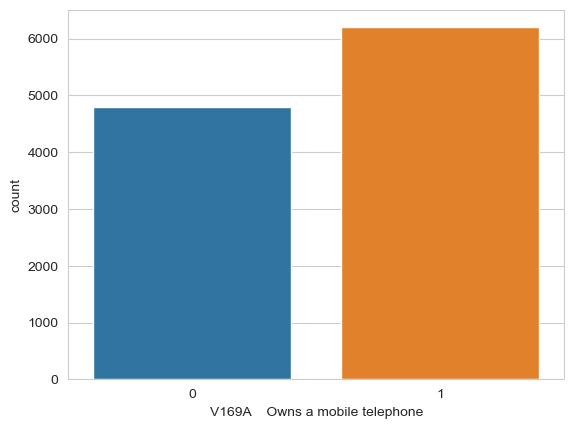

Feature Name:  V169C    Is respondent's mobile phone a smart phone
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  2    4788
0    4220
1    1980
Name: V169C    Is respondent's mobile phone a smart phone, dtype: int64


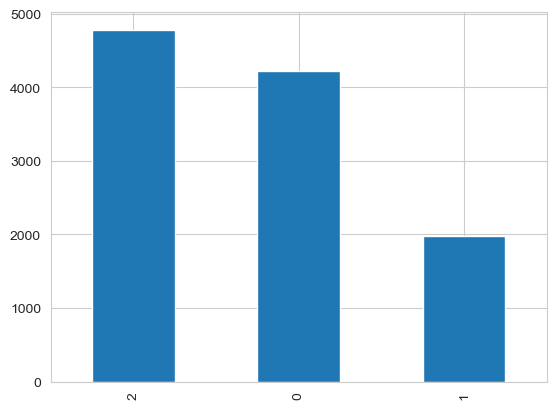

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=1.0516927557335274, variance=0.8172056534762315, skewness=-0.10175975328651869, kurtosis=-1.7685594254755215)
Central Tendency and Dispersion:  {'Mean': 1.0516927557335274, 'Median': 1.0, 'Mode': 2, 'Variance': 0.8171312809194899, 'Standard Deviation': 0.9039531408870096, 'Kurtosis': -1.7685594254755215, 'Screw': -0.10175975328651869}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


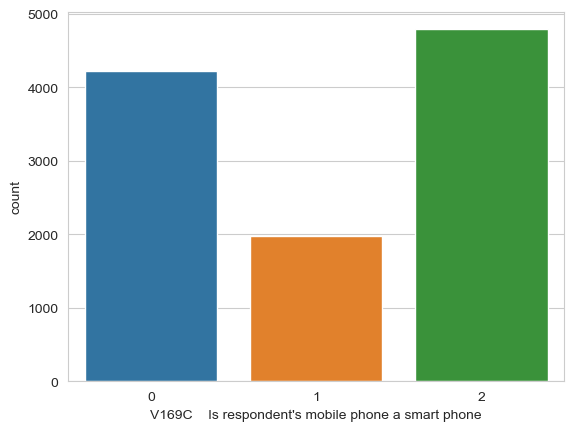

Feature Name:  V171A    Use of internet
Number of Unique Values:  3
Unique Values:  [0 2 1]
Value Counts:  0    8893
2    1883
1     212
Name: V171A    Use of internet, dtype: int64


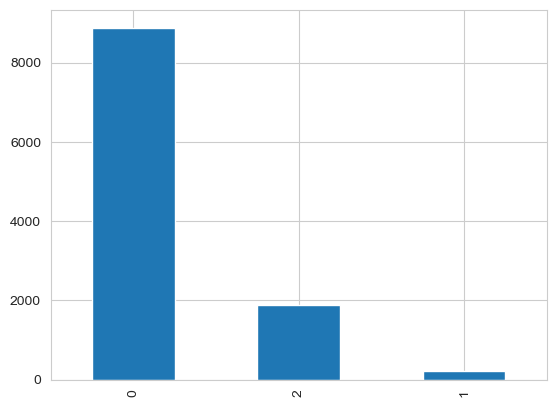

Data set description
DescribeResult(nobs=10988, minmax=(0, 2), mean=0.362031306880233, variance=0.5737543880249779, skewness=1.656232468650788, kurtosis=0.7997924103174965)
Central Tendency and Dispersion:  {'Mean': 0.362031306880233, 'Median': 0.0, 'Mode': 0, 'Variance': 0.5737021715717538, 'Standard Deviation': 0.7574312982520288, 'Kurtosis': 0.7997924103174965, 'Screw': 1.656232468650788}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


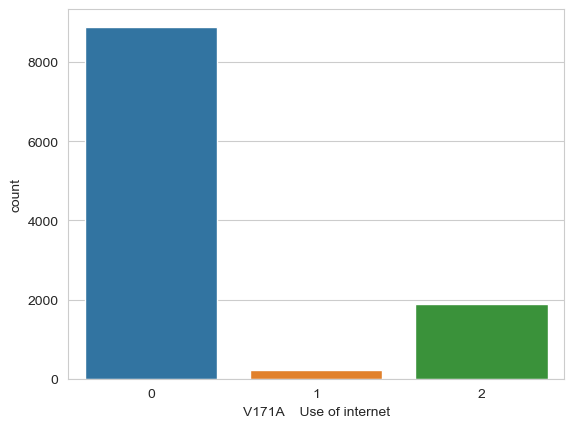

Feature Name:  V171B    Frequency of using internet last month
Number of Unique Values:  4
Unique Values:  [3 1 0 2]
Value Counts:  3    9166
0    1161
1     452
2     209
Name: V171B    Frequency of using internet last month, dtype: int64


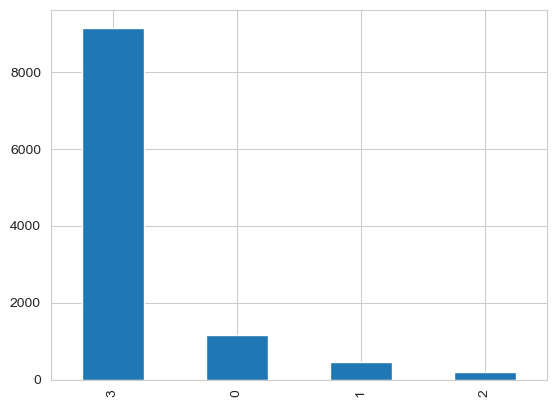

Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=2.581725518747725, variance=0.9596441689418899, skewness=-2.0465851480515895, kurtosis=2.4078869192685355)
Central Tendency and Dispersion:  {'Mean': 2.581725518747725, 'Median': 3.0, 'Mode': 3, 'Variance': 0.9595568332876359, 'Standard Deviation': 0.979569718441539, 'Kurtosis': 2.4078869192685355, 'Screw': -2.0465851480515895}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


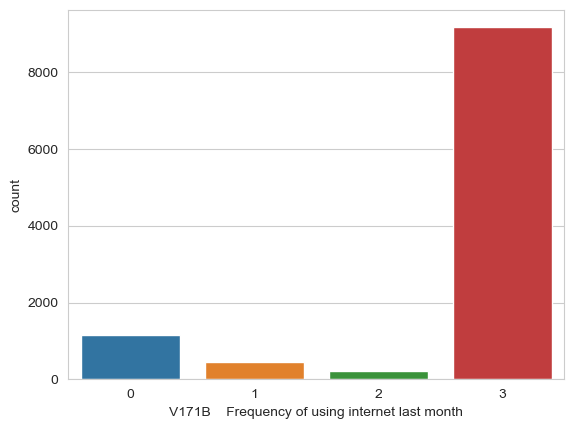

In [217]:
for cols in data_cluster[5].columns:
    feature_uni_varaite_analysis(cols, data_cluster[5])

## 2.1.7. Univariate Analysis of Sanitation Variables

Feature Name:  V116     Type of toilet facility
Number of Unique Values:  14
Unique Values:  [ 4  2 11  3 12  8  6  9  1 13  5  0 10  7]
Value Counts:  8     2602
11    2385
4     1913
12    1851
3      811
2      725
13     407
7      103
9       72
0       35
5       31
1       30
10      17
6        6
Name: V116     Type of toilet facility, dtype: int64


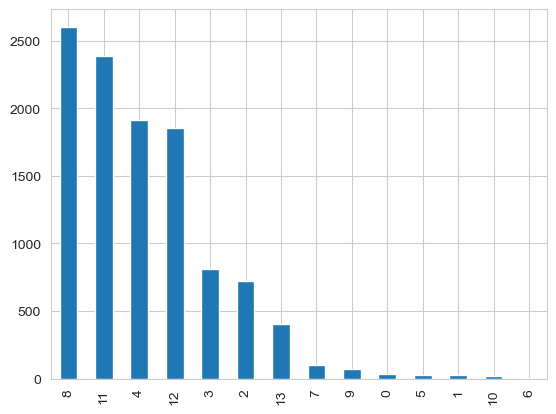

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 13), mean=7.994994539497633, variance=12.969393346652625, skewness=-0.33815732730924486, kurtosis=-1.337267119020708)
Central Tendency and Dispersion:  {'Mean': 7.994994539497633, 'Median': 8.0, 'Mode': 8, 'Variance': 12.968213023268326, 'Standard Deviation': 3.6011405170123987, 'Kurtosis': -1.337267119020708, 'Screw': -0.33815732730924486}
Plotting the count plot


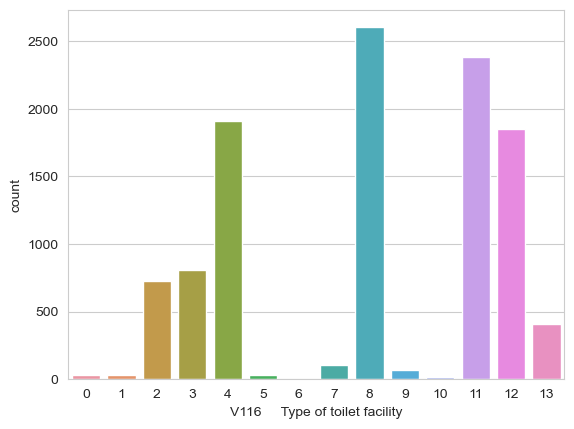

Feature Name:  V127     Main floor material
Number of Unique Values:  11
Unique Values:  [ 1  4  2  9  8  5  0  6  7  3 10]
Value Counts:  4     4667
1     4635
2     1193
0      243
5       72
10      59
8       40
7       35
3       16
6       15
9       13
Name: V127     Main floor material, dtype: int64


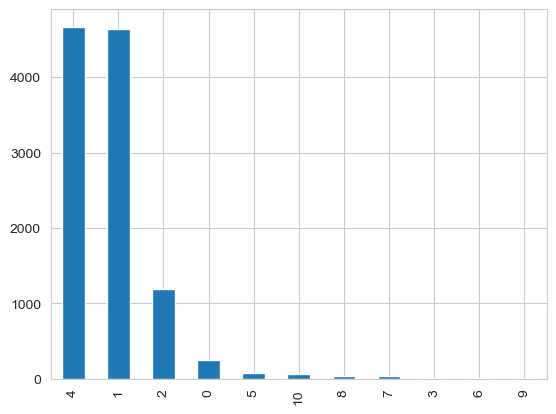

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 10), mean=2.498998907899527, variance=2.6550458713012564, skewness=0.7642519002377475, kurtosis=1.167025133520184)
Central Tendency and Dispersion:  {'Mean': 2.498998907899527, 'Median': 2.0, 'Mode': 4, 'Variance': 2.6548042398968783, 'Standard Deviation': 1.6293570019786574, 'Kurtosis': 1.167025133520184, 'Screw': 0.7642519002377475}
Plotting the count plot


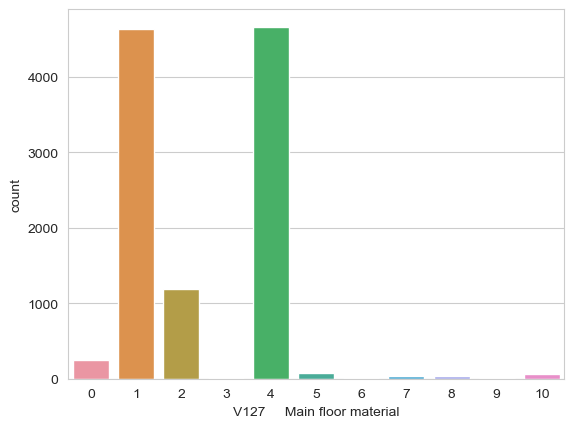

Feature Name:  V128     Main wall material
Number of Unique Values:  17
Unique Values:  [ 1  4 14  0 15  9  5 11 16 13  6  8 10  7  2 12  3]
Value Counts:  4     4295
14    2543
5     1725
0      689
7      338
8      318
2      296
1      200
10     165
13     142
9       72
15      64
16      51
11      35
6       26
12      23
3        6
Name: V128     Main wall material, dtype: int64


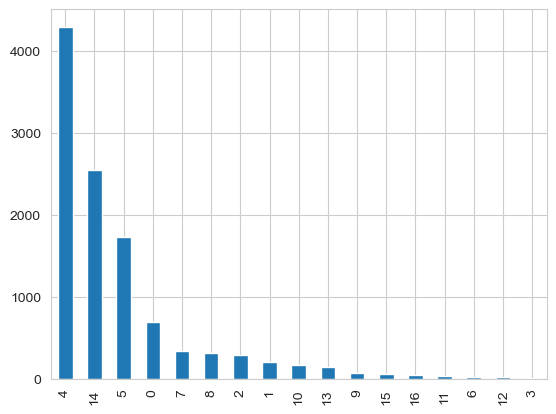

Data set description
DescribeResult(nobs=10988, minmax=(0, 16), mean=6.72224244630506, variance=21.330871388561306, skewness=0.6764406126162982, kurtosis=-0.9784451698578338)
Central Tendency and Dispersion:  {'Mean': 6.72224244630506, 'Median': 5.0, 'Mode': 4, 'Variance': 21.328930100666458, 'Standard Deviation': 4.618325464999891, 'Kurtosis': -0.9784451698578338, 'Screw': 0.6764406126162982}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


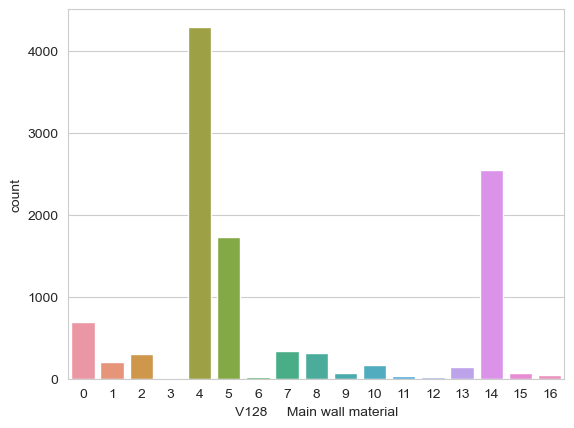

Feature Name:  V129     Main roof material
Number of Unique Values:  16
Unique Values:  [13  6  3  1  5  4  8 10  9  2 15  0 14 12 11  7]
Value Counts:  6     8694
13     588
5      462
10     407
0      156
3       99
12      95
9       94
15      90
11      83
8       72
14      53
4       35
7       24
1       23
2       13
Name: V129     Main roof material, dtype: int64


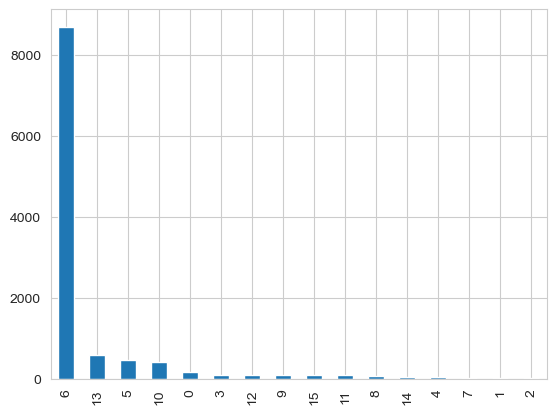

Data set description
DescribeResult(nobs=10988, minmax=(0, 15), mean=6.589825263924281, variance=5.163224034268383, skewness=1.6374301976381036, kurtosis=4.23370988981944)
Central Tendency and Dispersion:  {'Mean': 6.589825263924281, 'Median': 6.0, 'Mode': 6, 'Variance': 5.162754137650776, 'Standard Deviation': 2.272169478197165, 'Kurtosis': 4.23370988981944, 'Screw': 1.6374301976381036}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


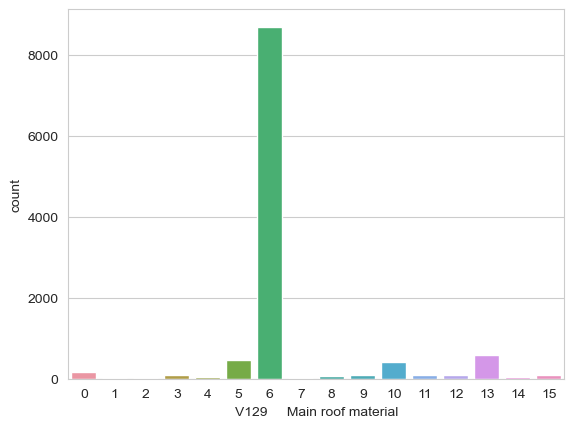

In [218]:
for cols in data_cluster[6].columns:
    feature_uni_varaite_analysis(cols, data_cluster[6])

## 2.1.8. Univariate Analysis of Education Literacy Variables

Feature Name:  V106     Highest educational level
Number of Unique Values:  4
Unique Values:  [3 2 0 1]
Value Counts:  1    4717
3    3479
2    1633
0    1159
Name: V106     Highest educational level, dtype: int64


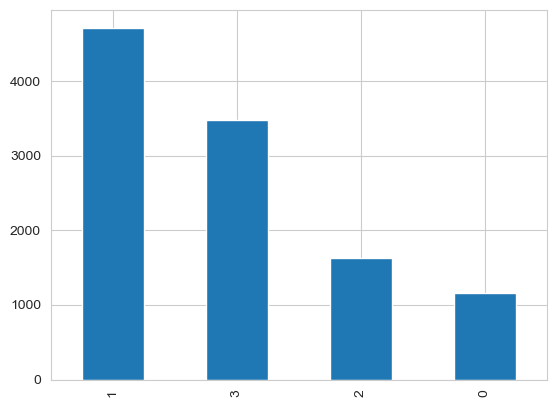

/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


Data set description
DescribeResult(nobs=10988, minmax=(0, 3), mean=1.6763742264288315, variance=1.0631825565833188, skewness=0.09991955110974005, kurtosis=-1.3220595635978505)
Central Tendency and Dispersion:  {'Mean': 1.6763742264288315, 'Median': 1.0, 'Mode': 1, 'Variance': 1.0630857980688864, 'Standard Deviation': 1.0310605210504795, 'Kurtosis': -1.3220595635978505, 'Screw': 0.09991955110974005}
Plotting the count plot


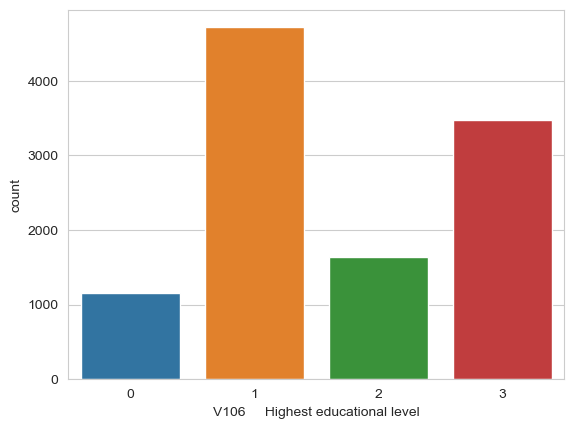

Feature Name:  V107     Highest year of education
Number of Unique Values:  13
Unique Values:  ['3.0' '6.0' '2.0' '1.0' '5.0' '4.0' nan
 'No years completed at level V106' 4.0 5.0 2.0 6.0 3.0 1.0]
Value Counts:  6.0                                 2168
6.0                                 1042
4.0                                  736
3.0                                  681
5.0                                  408
3.0                                  297
2.0                                  295
4.0                                  236
5.0                                  146
2.0                                  131
1.0                                   83
1.0                                   30
No years completed at level V106      18
Name: V107     Highest year of education, dtype: int64


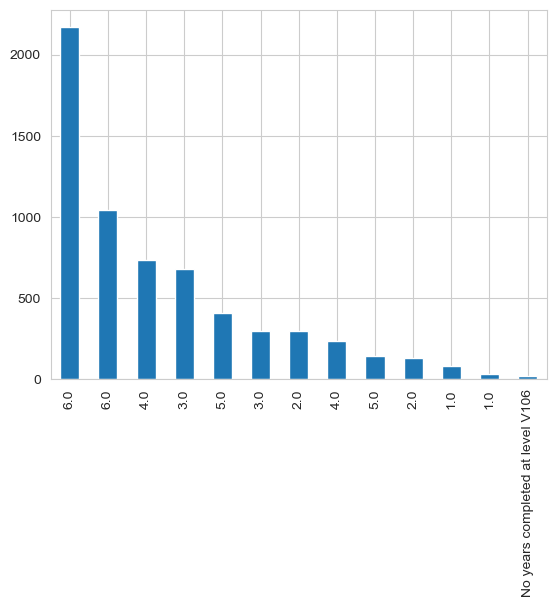

Error in feature:  V107     Highest year of education
Feature Name:  V155     Literacy
Number of Unique Values:  5
Unique Values:  [0 1 3 4 2]
Value Counts:  3    5568
1    3070
0    2325
4      19
2       6
Name: V155     Literacy, dtype: int64


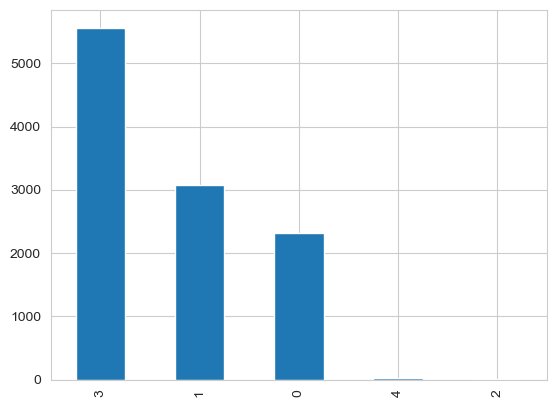

Data set description
DescribeResult(nobs=10988, minmax=(0, 4), mean=1.8076082999635967, variance=1.6025561068647538, skewness=-0.25615391639079327, kurtosis=-1.6594313209594054)
Central Tendency and Dispersion:  {'Mean': 1.8076082999635967, 'Median': 3.0, 'Mode': 3, 'Variance': 1.6024102608411948, 'Standard Deviation': 1.265863444784308, 'Kurtosis': -1.6594313209594054, 'Screw': -0.25615391639079327}
Plotting the count plot


/var/folders/xm/rq0m1_2936361j6vzf7xmlk40000gn/T/ipykernel_70208/1229490224.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(data)


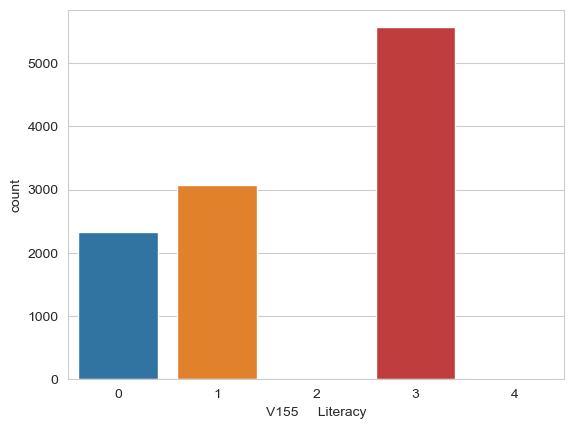

In [219]:
for cols in data_cluster[7].columns:
    feature_uni_varaite_analysis(cols, data_cluster[7])